# Setting it Up

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("california.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       141777 non-null  int64  
 1   Disease     141777 non-null  object 
 2   County      141777 non-null  object 
 3   Year        141777 non-null  int64  
 4   Sex         141777 non-null  object 
 5   Count       141777 non-null  int64  
 6   Population  141777 non-null  int64  
 7   Rate        141777 non-null  float64
 8   CI.lower    141777 non-null  float64
 9   CI.upper    141777 non-null  float64
 10  Unstable    141777 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 11.9+ MB


In [12]:
df.Disease.unique()

array(['Amebiasis', 'Anaplasmosis and Ehrlichiosis', 'Babesiosis',
       'Cholera', 'Botulism, Other', 'Botulism, Foodborne',
       'Botulism, Wound', 'Brucellosis', 'Campylobacteriosis',
       'Chlamydia', 'Ciguatera Fish Poisoning', 'Dengue',
       'Coccidioidomycosis',
       'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies',
       'Cryptosporidiosis', 'Cyclosporiasis',
       'Cysticercosis or Taeniasis', 'E. coli O157', 'Diphtheria', 'HIV',
       'Early Syphilis', 'Gonorrhea', 'E. coli Other STEC (non-O157)',
       'Giardiasis', 'Hantavirus Infection', 'Hepatitis B, Acute',
       'Hepatitis E, acute infection', 'Hemolytic Uremic Syndrome',
       'Hepatitis A', 'Scombroid Fish Poisoning', 'Hepatitis C, Acute',
       'Invasive Meningococcal Disease', 'Leprosy', 'Measles',
       'Leptospirosis', 'Influenza Death (<65 years of age)',
       'Legionellosis', 'Malaria', 'Lyme Disease', 'Listeriosis',
       'Pertussis', 'Paralytic Shellfish Poiso

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       141777 non-null  int64  
 1   Disease     141777 non-null  object 
 2   County      141777 non-null  object 
 3   Year        141777 non-null  int64  
 4   Sex         141777 non-null  object 
 5   Count       141777 non-null  int64  
 6   Population  141777 non-null  int64  
 7   Rate        141777 non-null  float64
 8   CI.lower    141777 non-null  float64
 9   CI.upper    141777 non-null  float64
 10  Unstable    141777 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 11.9+ MB


In [18]:
df.County.unique()

array(['California', 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Lassen', 'Los Angeles', 'Madera', 'Modoc', 'Marin', 'Mariposa',
       'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

# 1. Data Overview  

## createing the enteric variable

In [19]:
#creating the enteric disease variable

enteric_diseases = [
    'Botulism, Foodborne', 'Botulism, Wound', 'Campylobacteriosis', 
    'Cholera', 'E. coli O157', 'E. coli Other STEC (non-O157)', 
    'Listeriosis', 'Salmonellosis', 'Shigellosis', 'Vibrio Infection (non-Cholera)', 
    'Typhoid Fever, case']

ent = df[df['Disease'].isin(enteric_diseases)].reset_index(drop=True).drop(columns=['index'])

In [70]:
# if i want to create a new col. "enteric" 
# df['enteric'] = df['Disease'].isin(enteric_diseases)


In [90]:
ent.head(5)

Disease County  Year     Sex  Count  Population  Rate  CI.lower  CI.upper  \
0  Cholera   Inyo  2010    Male      0        9398   0.0       0.0    39.244   
1  Cholera   Inyo  2011   Total      0       18666   0.0       0.0    19.761   
2  Cholera   Inyo  2011  Female      0        9185   0.0       0.0    40.154   
3  Cholera   Inyo  2011    Male      0        9481   0.0       0.0    38.901   
4  Cholera   Inyo  2012   Total      0       18578   0.0       0.0    19.854   

  Unstable  
0        -  
1        -  
2        -  
3        -  
4        -

In [84]:
df.County.unique() # technically 58 counties, but 59 with diseases reported under "California" 

array(['California', 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Lassen', 'Los Angeles', 'Madera', 'Modoc', 'Marin', 'Mariposa',
       'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [80]:
ent.nunique()

Disease         11
County          59
Year            14
Sex              3
Count          570
Population    2459
Rate          6556
CI.lower      5074
CI.upper      9046
Unstable         3
dtype: int64

In [253]:
ent.County.unique()

array(['Inyo', 'California', 'Alameda', 'Alpine', 'Amador', 'Butte',
       'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado',
       'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Kern', 'Kings', 'Lake',
       'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa',
       'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

# 2. Exploratory Data Analysis 

## descriptive statistics, grouping by county

In [123]:
# Group by 'County', 'Disease', 'Year', and 'Sex' in alphabetical order
ent_summary = (
    ent.groupby(['County', 'Disease', 'Year', 'Sex'], as_index=False)
       .agg({
           'Count': 'sum',
           'Population': 'sum',
           'Rate': 'mean',        # Use mean for rate, as it might be calculated based on population
           'CI.lower': 'mean',     # Use mean to get an average confidence interval lower bound
           'CI.upper': 'mean'      # Use mean to get an average confidence interval upper bound
       })
       .sort_values(by='County', ascending=True)  # Ensure counties are in alphabetical order
)

# Display the resulting DataFrame to verify
print(ent_summary)

        County                         Disease  Year     Sex  Count  \
0      Alameda             Botulism, Foodborne  2001  Female      0   
305    Alameda                   Salmonellosis  2009   Total    284   
304    Alameda                   Salmonellosis  2009    Male    139   
303    Alameda                   Salmonellosis  2009  Female    142   
302    Alameda                   Salmonellosis  2008   Total    200   
...        ...                             ...   ...     ...    ...   
26068     Yuba                         Cholera  2006    Male      0   
26067     Yuba                         Cholera  2006  Female      0   
26066     Yuba                         Cholera  2005   Total      0   
26148     Yuba   E. coli Other STEC (non-O157)  2010  Female      0   
26372     Yuba  Vibrio Infection (non-Cholera)  2014   Total      0   

       Population    Rate  CI.lower  CI.upper  
0          746829   0.000     0.000     0.494  
305       1504325  18.879    16.747    21.207  
304

In [125]:
# Summary statistics by County, Disease, Year, and Sex, sorted alphabetically by County
ent_summary = (
    ent.groupby(['County', 'Disease', 'Year', 'Sex'], as_index=False)
       .agg({
           'Count': 'sum',
           'Population': 'sum',
           'Rate': 'mean',        # Use mean for rate to get an average across records
           'CI.lower': 'mean',     # Use mean for CI.lower
           'CI.upper': 'mean'      # Use mean for CI.upper
       })
       .sort_values(by='County', ascending=True)  # Sort by County alphabetically
)

# Filter for a specific county, for example 'Inyo'
county_name = 'Inyo'  # Replace with any desired county name
ent_summary_one_county = ent_summary[ent_summary['County'] == county_name]

# Display the resulting summary for the specified county
ent_summary_one_county

County        Disease  Year     Sex  Count  Population    Rate  CI.lower  \
6554   Inyo  Salmonellosis  2006   Total      1       18421   5.429     0.137   
6563   Inyo  Salmonellosis  2009   Total      0       18448   0.000     0.000   
6562   Inyo  Salmonellosis  2009    Male      0        9243   0.000     0.000   
6561   Inyo  Salmonellosis  2009  Female      0        9205   0.000     0.000   
6560   Inyo  Salmonellosis  2008   Total      3       18383  16.319     3.366   
...     ...            ...   ...     ...    ...         ...     ...       ...   
6405   Inyo        Cholera  2008  Female      0        9209   0.000     0.000   
6406   Inyo        Cholera  2008    Male      0        9174   0.000     0.000   
6407   Inyo        Cholera  2008   Total      0       18383   0.000     0.000   
6408   Inyo        Cholera  2009  Female      0        9205   0.000     0.000   
6403   Inyo        Cholera  2007    Male      0        9186   0.000     0.000   

      CI.upper  
6554    30.242  
6563    19.994  
6562    39.902  
6561    40.067  
6560    47.685  
...        ...  
6405    40.049  
6406    40.202  
6407    20.065  
6408    40.067  
6403    40.150  

[447 rows x 9 columns]

In [161]:
# Group the data by County, Year, and Disease, and calculate the mean Rate, CI.lower, and CI.upper
rate_by_county_year_disease = ent.groupby(['County', 'Year', 'Disease'], as_index=False).agg({
    'Rate': 'mean',  # Calculate mean for Rate
    'CI.lower': 'mean',  # Calculate mean for CI lower bound
    'CI.upper': 'mean'  # Calculate mean for CI upper bound
})

# Display the resulting table
rate_by_county_year_disease.sort_values(by=['County', 'Year', 'Disease'], ascending=True, inplace=True)

# Show the table
print(rate_by_county_year_disease)

       County  Year                         Disease       Rate   CI.lower  \
0     Alameda  2001             Botulism, Foodborne   0.000000   0.000000   
1     Alameda  2001                 Botulism, Wound   0.000000   0.000000   
2     Alameda  2001              Campylobacteriosis  17.439000  14.832333   
3     Alameda  2001                         Cholera   0.000000   0.000000   
4     Alameda  2001                    E. coli O157   0.931333   0.418667   
...       ...   ...                             ...        ...        ...   
8786     Yuba  2014                     Listeriosis   0.000000   0.000000   
8787     Yuba  2014                   Salmonellosis   9.549667   2.979000   
8788     Yuba  2014                     Shigellosis   1.367333   0.034333   
8789     Yuba  2014             Typhoid Fever, case   0.000000   0.000000   
8790     Yuba  2014  Vibrio Infection (non-Cholera)   0.000000   0.000000   

       CI.upper  
0      0.419667  
1      0.419667  
2     20.383667  
3  

## disease rates in california, all counties, all years

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_2961/694844234.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


<Figure size 1400x800 with 0 Axes>

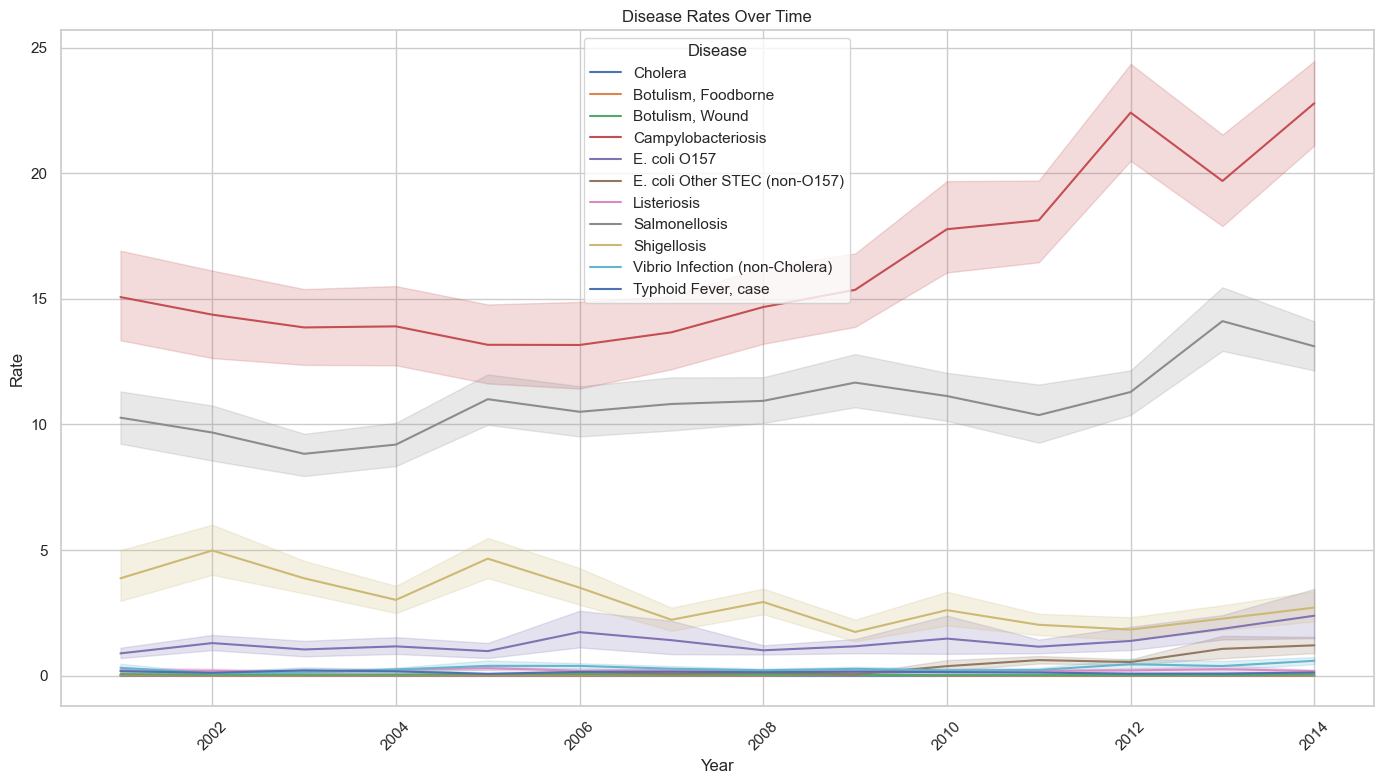

In [135]:
# Set up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Loop over each unique disease
for disease in ent['Disease'].unique():
    # Filter data for the current disease
    disease_data = ent[ent['Disease'] == disease]
    
    # Create the line plot for each disease
    sns.lineplot(data=disease_data, x='Year', y='Rate', ax=ax, label=disease)

# Add labels and title
ax.set_title("Disease Rates Over Time")
ax.set_xlabel('Year')
ax.set_ylabel('Rate')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add a legend
ax.legend(title='Disease')

# Show the plot
plt.tight_layout()
plt.show()

In [144]:
ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26373 entries, 0 to 26372
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     26373 non-null  object 
 1   County      26373 non-null  object 
 2   Year        26373 non-null  int64  
 3   Sex         26373 non-null  object 
 4   Count       26373 non-null  int64  
 5   Population  26373 non-null  int64  
 6   Rate        26373 non-null  float64
 7   CI.lower    26373 non-null  float64
 8   CI.upper    26373 non-null  float64
 9   Unstable    26373 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.0+ MB


## disease rates, by county, all years

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_2961/3638150338.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


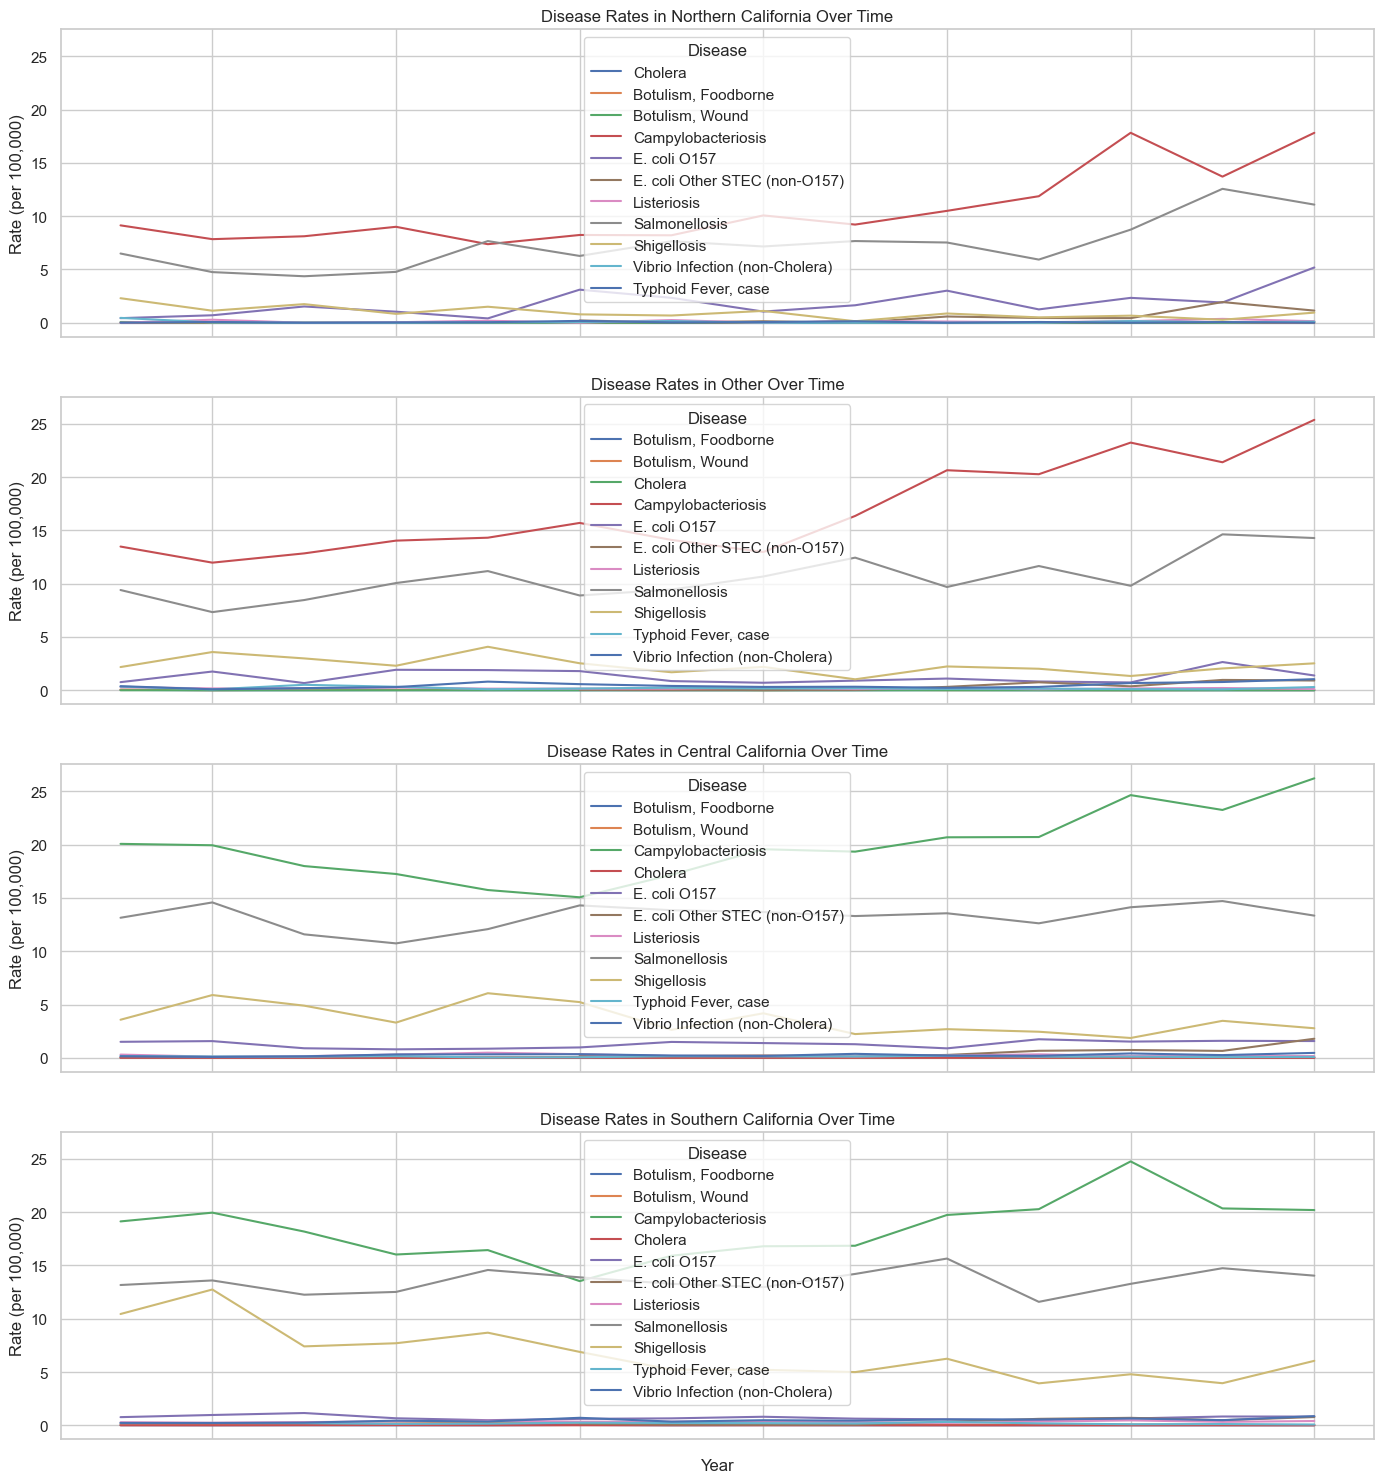

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define county regions
region_mapping = {
    'Northern California': ['Humboldt', 'Mendocino', 'Siskiyou', 'Del Norte', 'Trinity', 'Shasta', 'Butte', 'Tehama', 'Glenn', 'Modoc', 'Lassen', 'Alpine', 'Nevada', 'Plumas', 'Sierra', 'Inyo'],
    'Central California': ['Fresno', 'Monterey', 'San Benito', 'Madera', 'Mariposa', 'Kings', 'Tulare', 'San Luis Obispo', 'Stanislaus', 'Merced', 'Riverside', 'Santa Barbara', 'San Joaquin', 'Yuba', 'Sonoma', 'Santa Clara', 'Placer'],
    'Southern California': ['Los Angeles', 'San Diego', 'Orange', 'Imperial', 'Ventura', 'San Bernardino', 'Riverside', 'San Luis Obispo', 'Santa Barbara', 'San Mateo', 'San Francisco', 'San Bernardino', 'Sacramento'],
    'Other': ['California']  # Including the 'California' entry in the "Other" category.
}

# Add a new column in the DataFrame for regions
def assign_region(county):
    for region, counties in region_mapping.items():
        if county in counties:
            return region
    return 'Other'  # Default return if the county isn't found

# Assign region to each row
ent['Region'] = ent['County'].apply(assign_region)

# Set up the plotting environment
sns.set(style="whitegrid")

# Create a figure with subplots for each region (3 regions: North, Central, South)
regions = ent['Region'].unique()
fig, axes = plt.subplots(len(regions), 1, figsize=(14, 15), sharex=True, sharey=True)

# Loop through each region and create a subplot for that region
for i, region in enumerate(regions):
    ax = axes[i]  # Get the current axis for the region
    
    # Filter data for the current region
    region_data = ent[ent['Region'] == region]
    
    # Loop through each disease in the current region
    for disease in region_data['Disease'].unique():
        disease_data = region_data[region_data['Disease'] == disease]
        
        # Aggregate the data: calculate the mean rate for each year
        disease_rate_by_year = disease_data.groupby('Year').agg({
            'Rate': 'mean'
        }).reset_index()
        
        # Plot the disease rate over time
        sns.lineplot(data=disease_rate_by_year, x='Year', y='Rate', ax=ax, label=disease)
    
    # Set titles and labels for each subplot
    ax.set_title(f'Disease Rates in {region} Over Time')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rate (per 100,000)')
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Add a legend for diseases
    ax.legend(title='Disease')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## avg. disease rate, all counties, by year

In [183]:
df

index      Disease      County  Year     Sex  Count  Population  \
0            0    Amebiasis  California  2001   Total    571    34514777   
1            1    Amebiasis  California  2001  Female    176    17340743   
2            2    Amebiasis  California  2001    Male    365    17174034   
3            3    Amebiasis  California  2002   Total    442    34940334   
4            4    Amebiasis  California  2002  Female    145    17555714   
...        ...          ...         ...   ...     ...    ...         ...   
141772  141772  Yersiniosis        Yuba  2013  Female      0       36296   
141773  141773  Yersiniosis        Yuba  2013    Male      0       36698   
141774  141774  Yersiniosis        Yuba  2014   Total      0       73425   
141775  141775  Yersiniosis        Yuba  2014  Female      0       36503   
141776  141776  Yersiniosis        Yuba  2014    Male      0       36922   

         Rate  CI.lower  CI.upper Unstable  
0       1.654     1.521     1.796           
1       1.015     0.871     1.176           
2       2.125     1.913     2.355           
3       1.265     1.150     1.389           
4       0.826     0.697     0.972           
...       ...       ...       ...      ...  
141772  0.000     0.000    10.163        -  
141773  0.000     0.000    10.051        -  
141774  0.000     0.000     5.024        -  
141775  0.000     0.000    10.105        -  
141776  0.000     0.000     9.991        -  

[141777 rows x 11 columns]

In [193]:
df.County

0         California
1         California
2         California
3         California
4         California
             ...    
141772          Yuba
141773          Yuba
141774          Yuba
141775          Yuba
141776          Yuba
Name: County, Length: 141777, dtype: object

In [201]:
df.loc[(df.Disease == 'Amebiasis') & (df.Sex == 'Total'), ['Year', 'Rate']].sort_values(by='Year')

Year   Rate
0     2001  1.654
126   2001  0.000
2352  2001  0.650
252   2001  0.000
1218  2001  0.000
...    ...    ...
81    2014  0.757
39    2014  0.748
2349  2014  0.000
1257  2014  0.000
1215  2014  0.713

[826 rows x 2 columns]

In [199]:
df.loc[(df.Disease == i) & (df.Sex == 'Total') , ['Year', 'Rate']]

Empty DataFrame
Columns: [Year, Rate]
Index: []

In [209]:
df.County.unique()

array(['California', 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras',
       'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno',
       'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Lassen', 'Los Angeles', 'Madera', 'Modoc', 'Marin', 'Mariposa',
       'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada',
       'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_2961/248930542.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


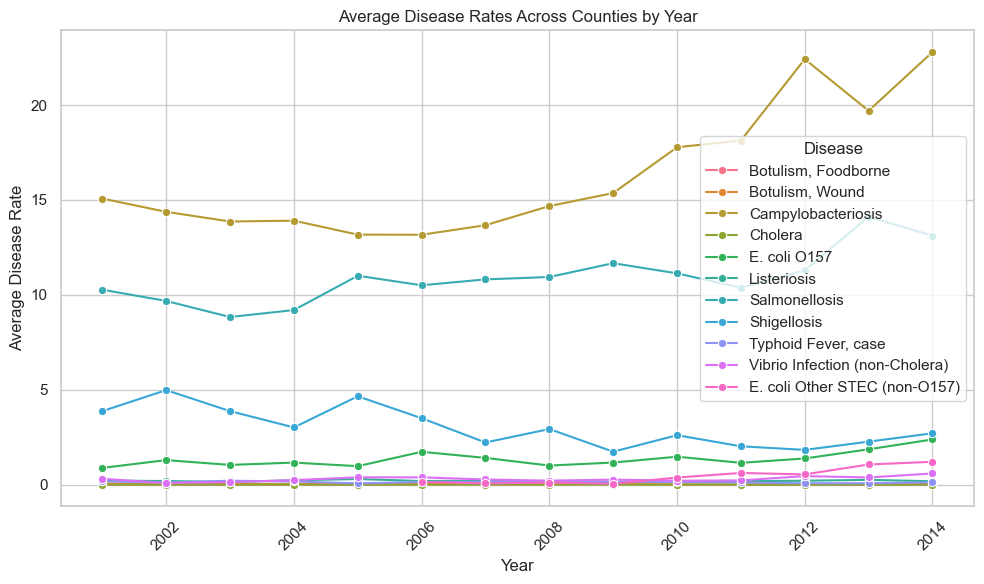

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis

# Plot average rates over time for each disease using the ax format
sns.lineplot(data=avg_rate_by_disease_year, x='Year', y='Rate', hue='Disease', marker='o', ax=ax)

# Set plot labels and title
ax.set_title('Average Disease Rates Across Counties by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Disease Rate')

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the legend for diseases
ax.legend(title='Disease')

# Show the plot
plt.tight_layout()
plt.show()

## Campy in top 5 most pop. counties 

## Campy in all other CA counties

In [264]:
ent.Disease.unique()

array(['Cholera', 'Botulism, Foodborne', 'Botulism, Wound',
       'Campylobacteriosis', 'E. coli O157',
       'E. coli Other STEC (non-O157)', 'Listeriosis', 'Salmonellosis',
       'Shigellosis', 'Vibrio Infection (non-Cholera)',
       'Typhoid Fever, case'], dtype=object)

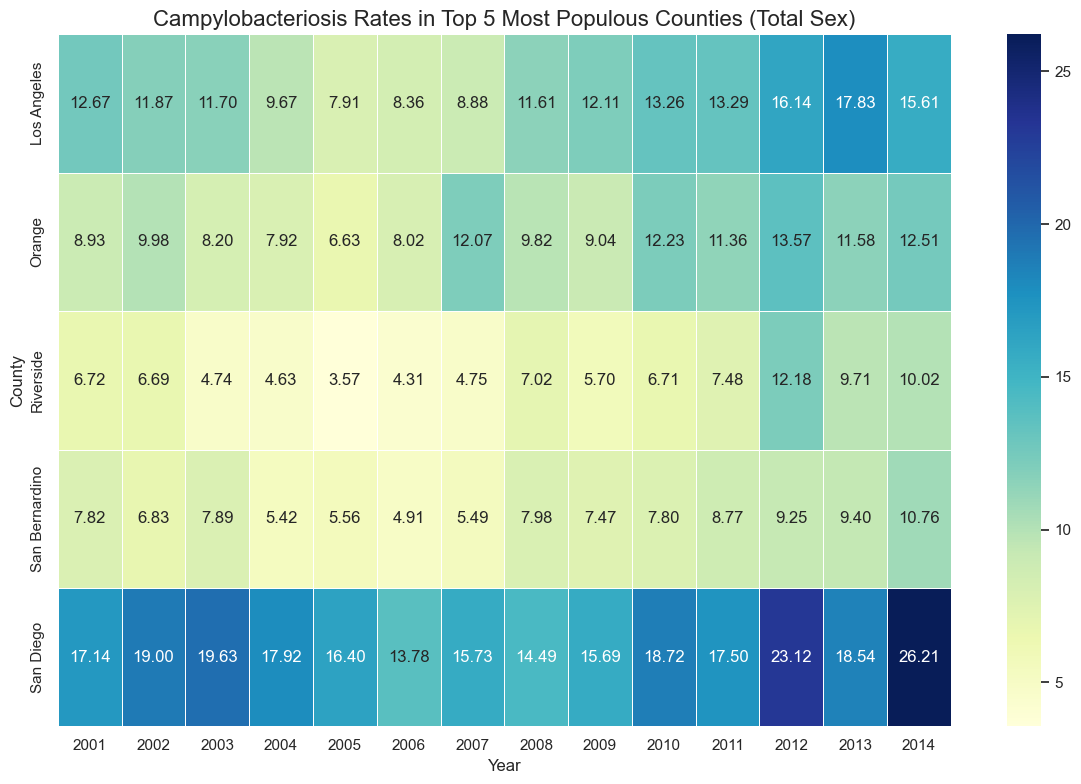

In [259]:
# List of top 5 most populous counties
top_5_counties = ['Los Angeles', 'Orange', 'Riverside', 'San Bernardino', 'San Diego']

# Filter the dataset to include only the relevant rows
campy_data = ent[(ent['Disease'] == 'Campylobacteriosis') & (ent['County'].isin(top_5_counties)) & (ent['Sex'] == 'Total')]

# Pivot the data to have counties as rows, years as columns, and the rate as the values
heatmap_data = campy_data.pivot_table(index='County', columns='Year', values='Rate', aggfunc='mean')

# Create the heatmap plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

# Set plot titles and labels
ax.set_title('Campylobacteriosis Rates in Top 5 Most Populous Counties (Total Sex)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('County', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# 2.1 loops & line plots - ent. disease rates in counties

In [10]:
pd.set_option('display.max_rows', None)  # No limit on number of rows
pd.set_option('display.max_columns', None)  # No limit on number of columns

noll = ent.loc[(ent["Rate"]== 0.00) & (ent["Disease"]=="Campylobacteriosis") & (ent["Sex"]=="Total")]
noll.head(359)

noll.County.unique()

array(['Alpine', 'Amador', 'Colusa', 'Del Norte', 'Inyo', 'Lake',
       'Lassen', 'Mariposa', 'Modoc', 'Mono', 'Plumas', 'Sierra',
       'Siskiyou', 'Trinity'], dtype=object)

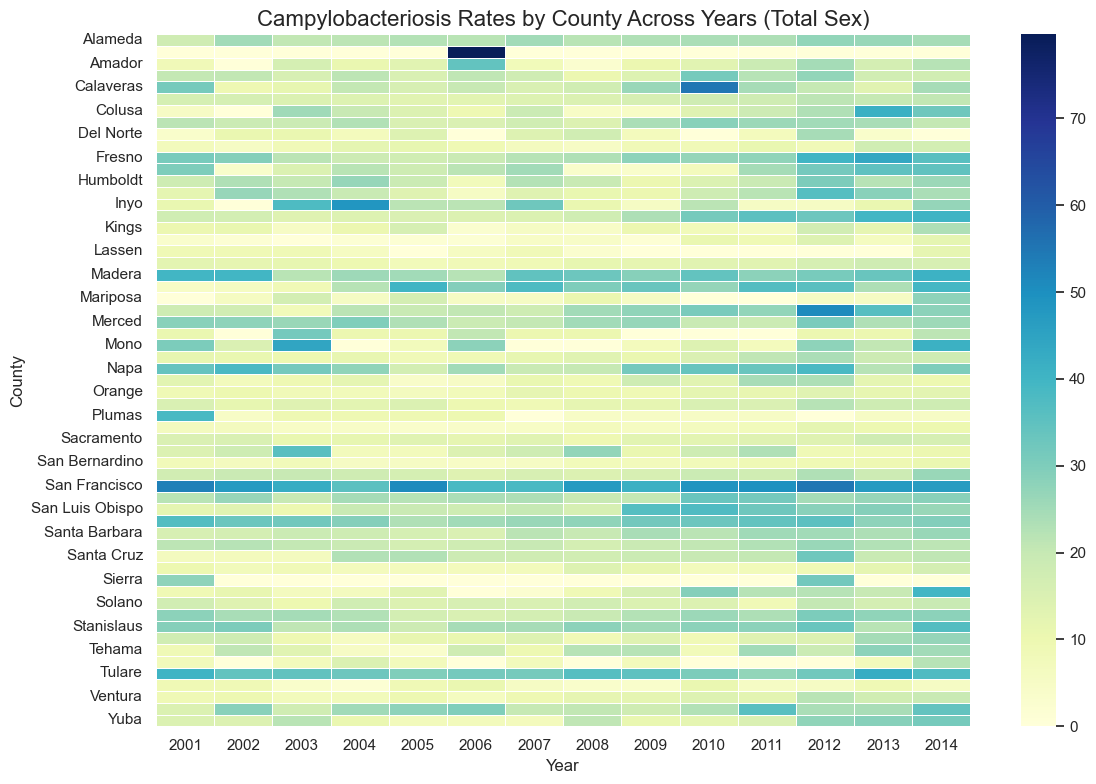

In [302]:
# Filter the data for 'Campylobacteriosis' disease and 'Total' sex category
campy_data = ent[(ent['Disease'] == 'Campylobacteriosis') & (ent['Sex'] == 'Total')]

# Pivot the data to have counties as rows, years as columns, and the rate as the values
heatmap_data = campy_data.pivot_table(index='County', columns='Year', values='Rate', aggfunc='mean')

# Create a new figure for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap plot
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='.2f', linewidths=.5)

# Only annotate values that are 0.00
for text in ax.texts:
    if text.get_text() == '0.00':
        text.set_fontweight('bold')
        text.set_color('red')

# Set plot titles and labels
ax.set_title('Campylobacteriosis Rates by County Across Years (Total Sex)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('County', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Los Angeles

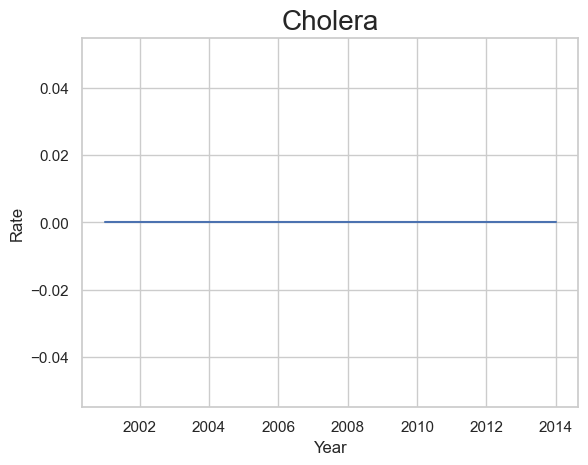

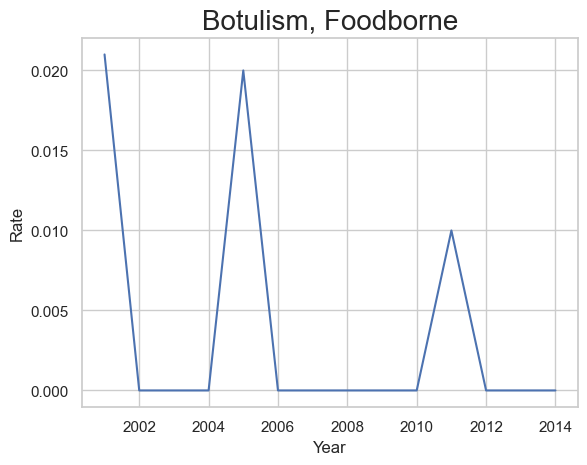

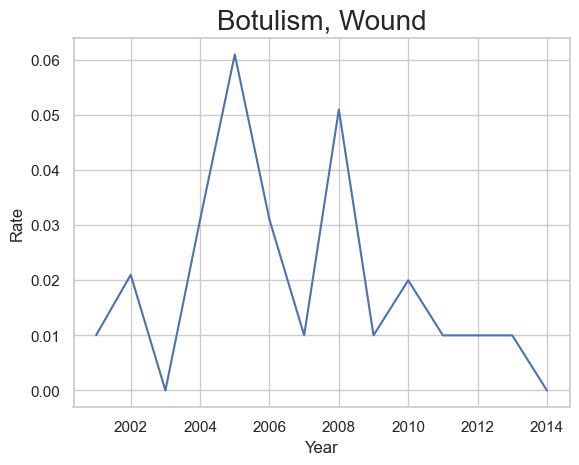

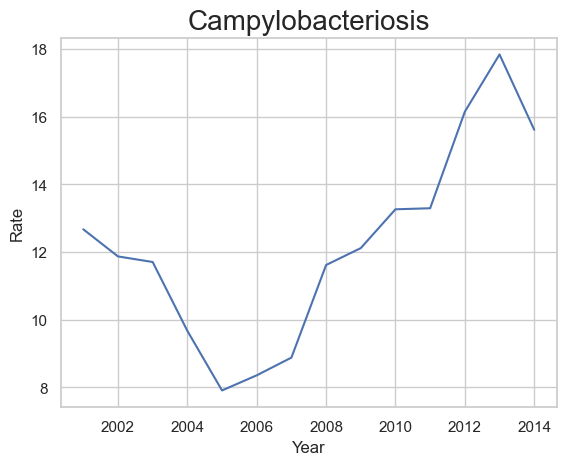

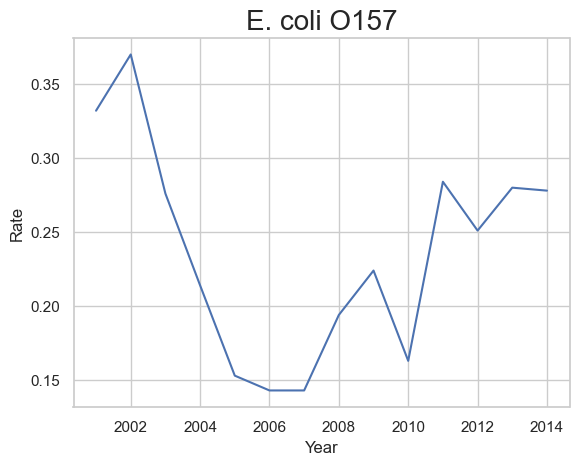

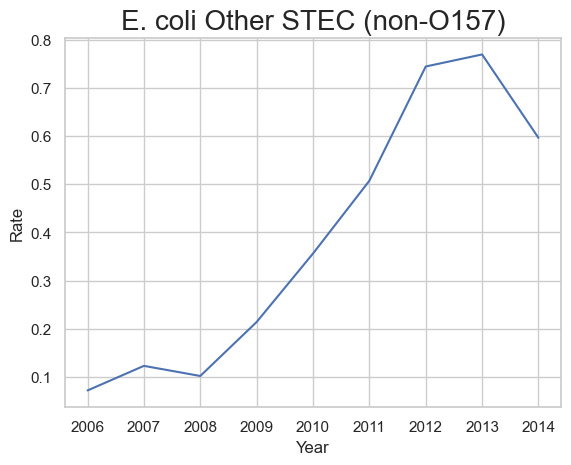

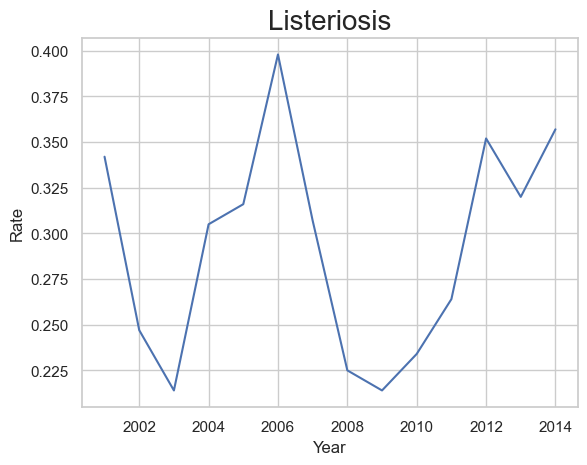

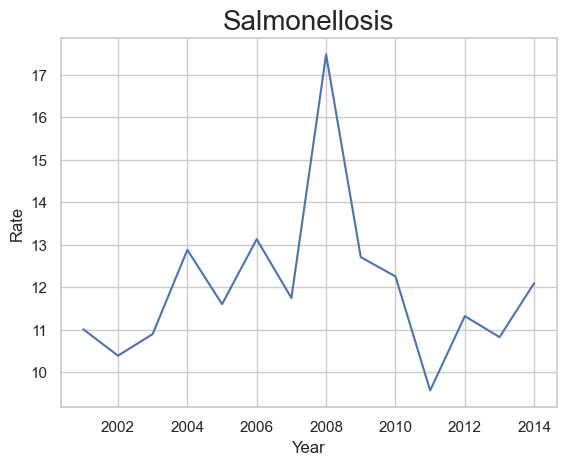

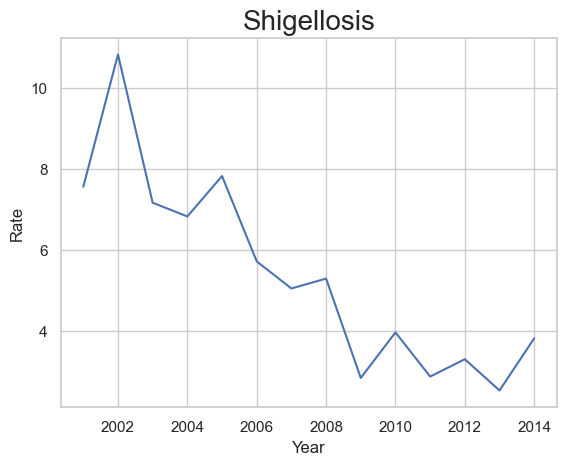

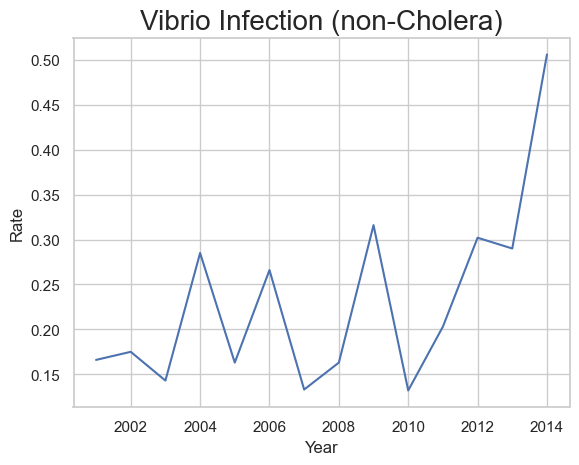

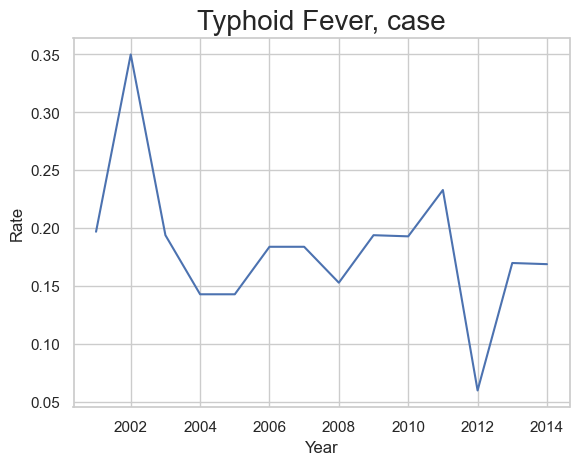

In [239]:
for col in ent.Disease.unique():
    temp = ent.loc[(ent.Disease == col) & (ent.Sex == 'Total') & (ent.County == 'Los Angeles'), ['Year', 'Rate']].sort_values(by='Year')
    sns.lineplot(data=temp, x='Year', y='Rate')
    plt.title(col, fontsize=20)
    plt.show()

### Orange Co.

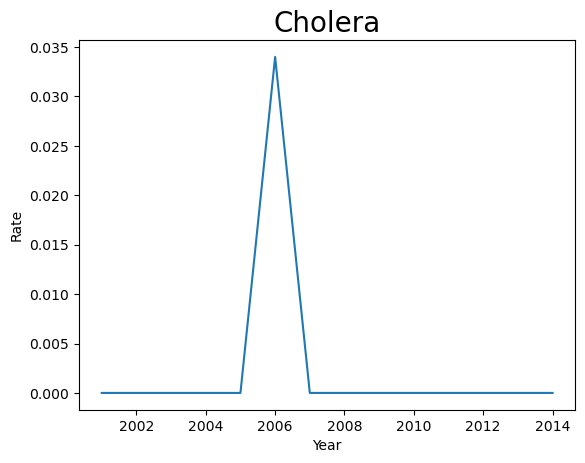

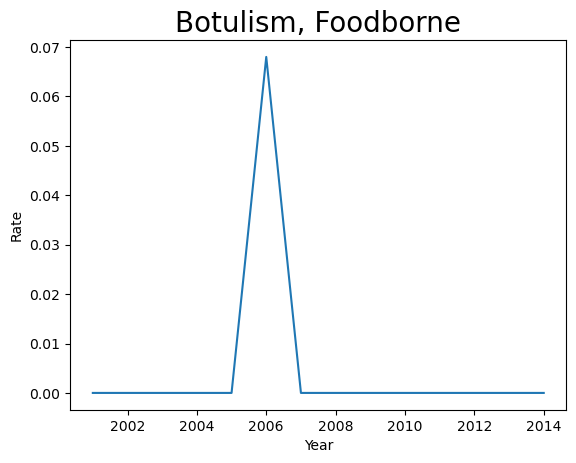

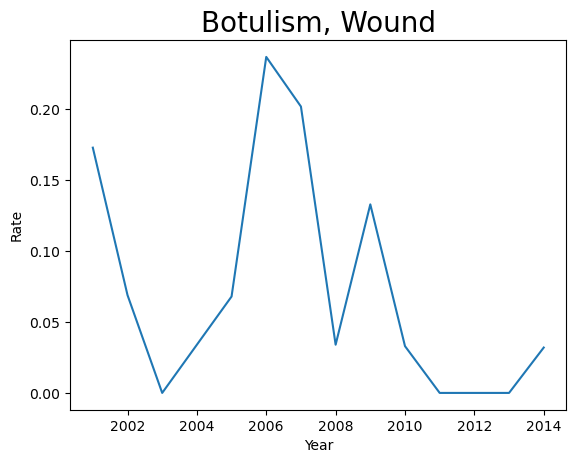

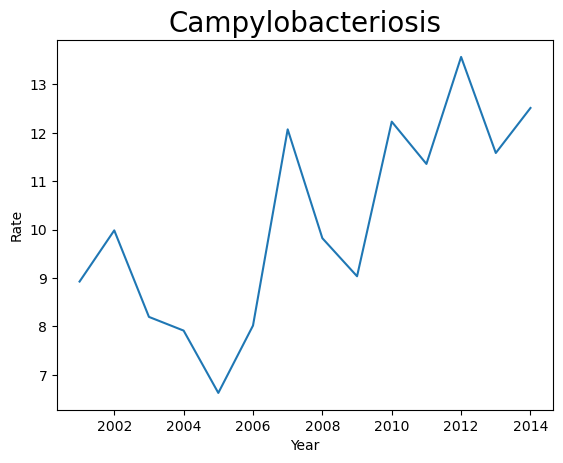

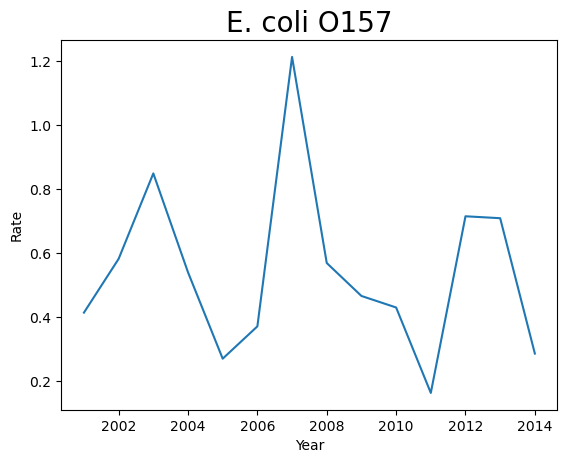

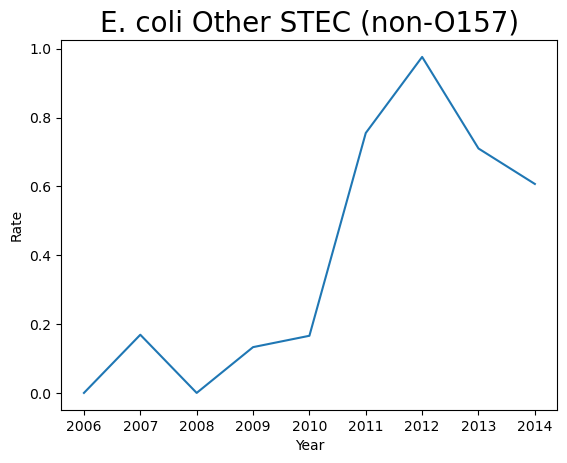

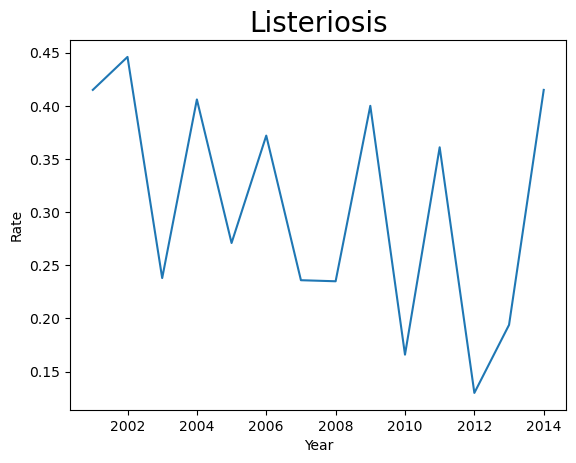

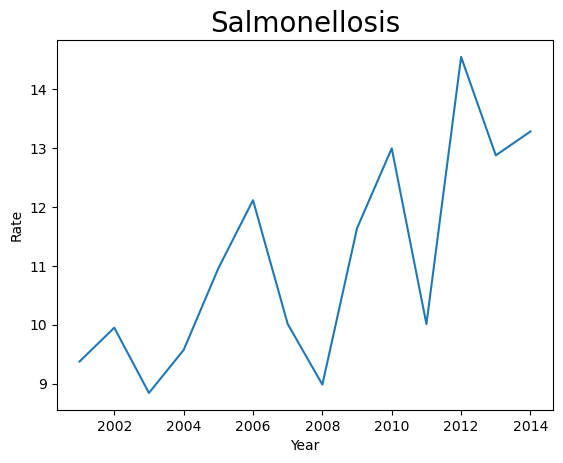

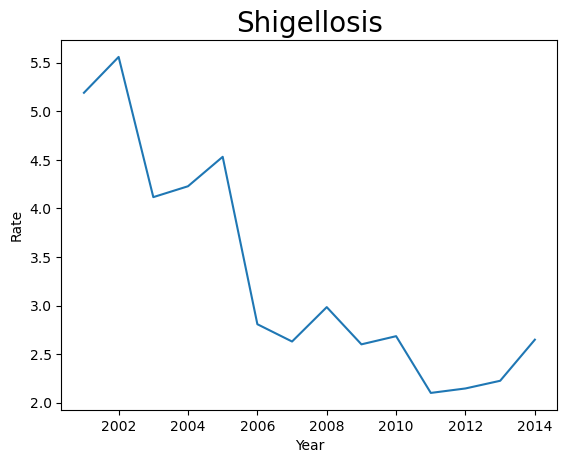

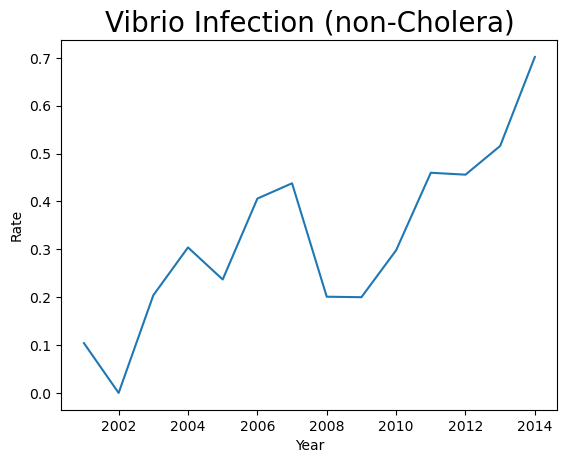

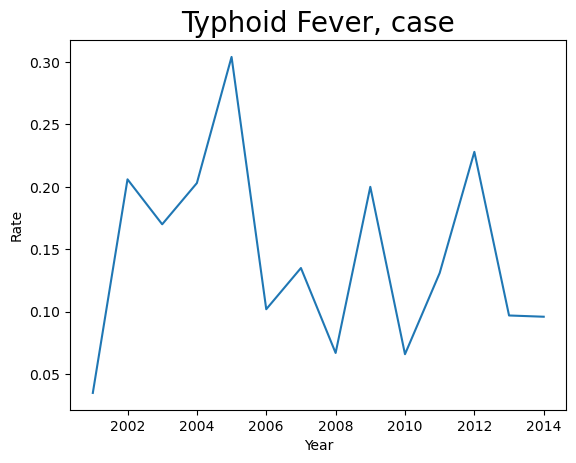

In [14]:
for col in ent.Disease.unique():
    temp = ent.loc[(ent.Disease == col) & (ent.Sex == 'Total') & (ent.County == 'Orange'), ['Year', 'Rate']].sort_values(by='Year')
    sns.lineplot(data=temp, x='Year', y='Rate')
    plt.title(col, fontsize=20)
    plt.show()

### Riverside Co

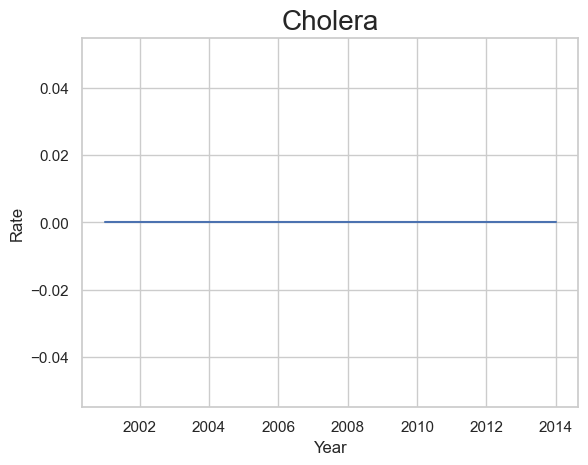

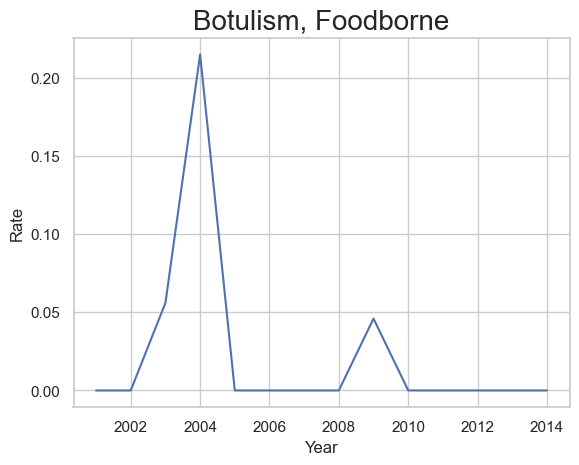

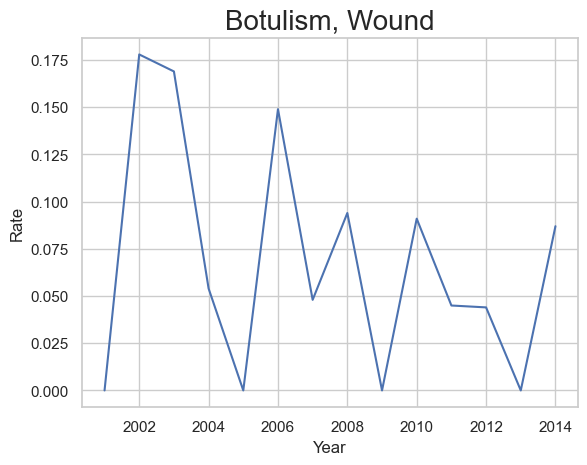

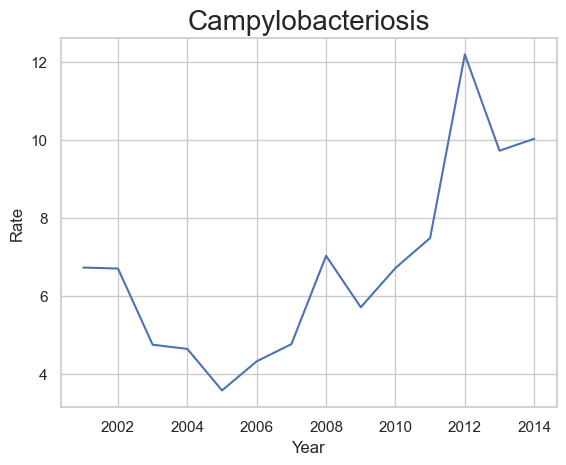

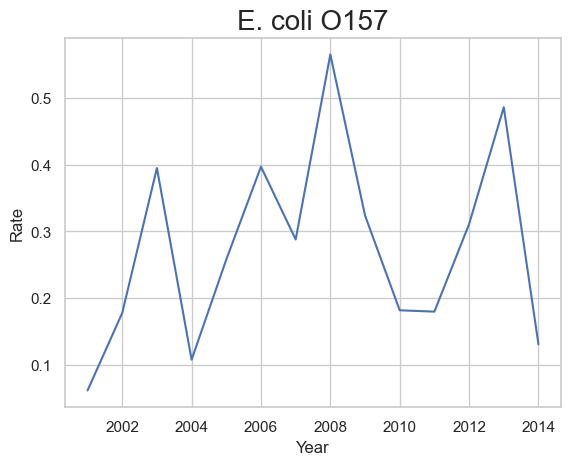

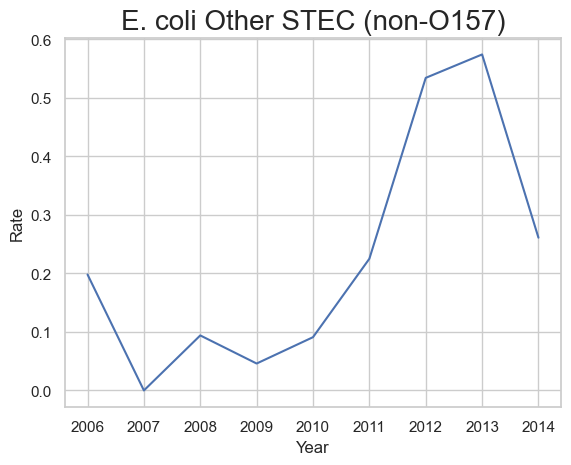

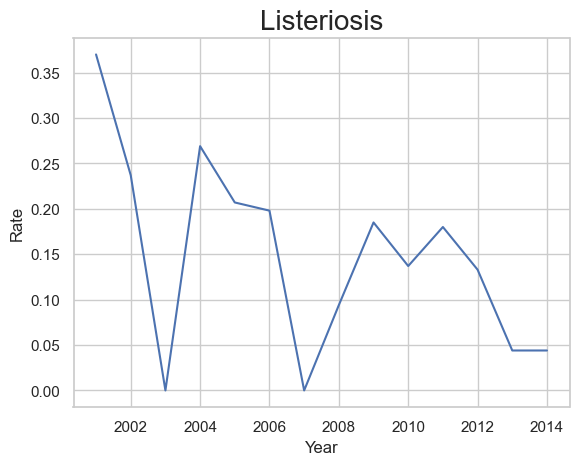

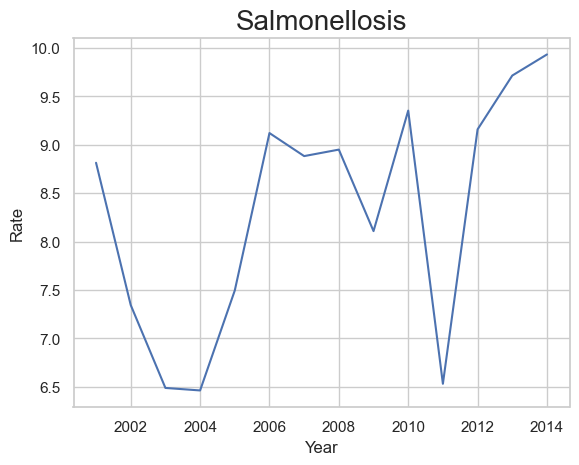

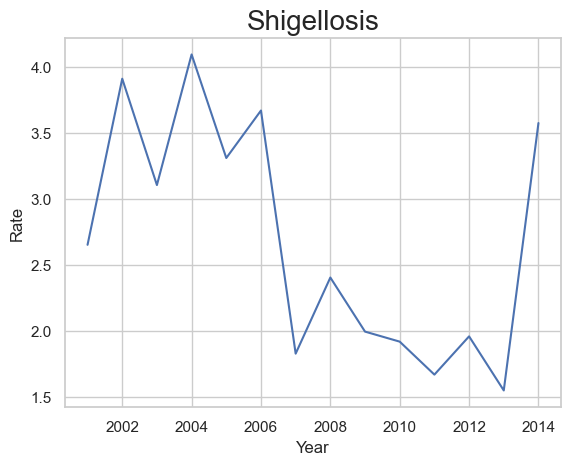

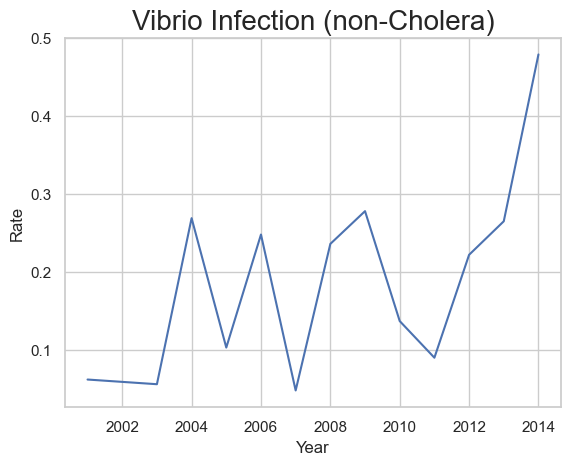

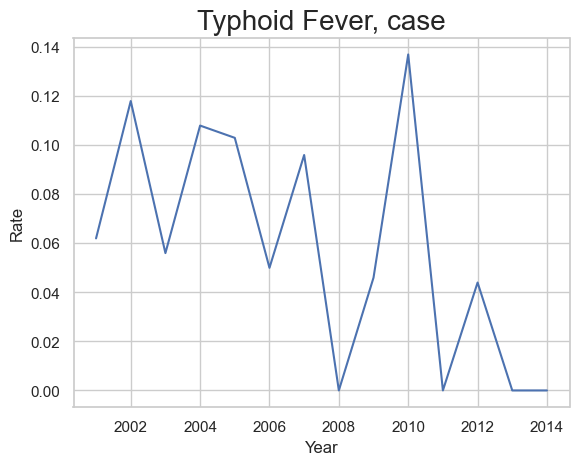

In [257]:
for col in ent.Disease.unique():
    temp = ent.loc[(ent.Disease == col) & (ent.Sex == 'Total') & (ent.County == 'Riverside'), ['Year', 'Rate']].sort_values(by='Year')
    sns.lineplot(data=temp, x='Year', y='Rate')
    plt.title(col, fontsize=20)
    plt.show()

### San Bernadino

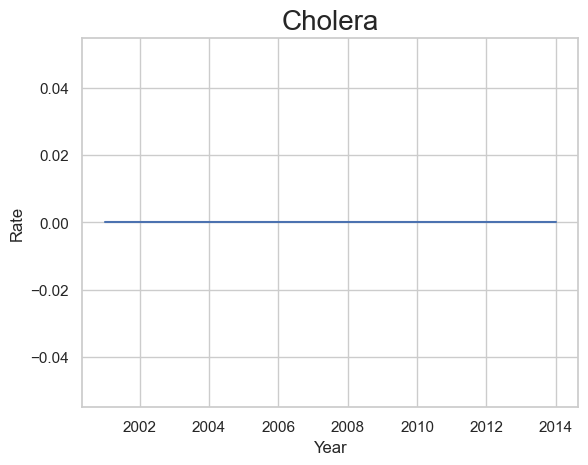

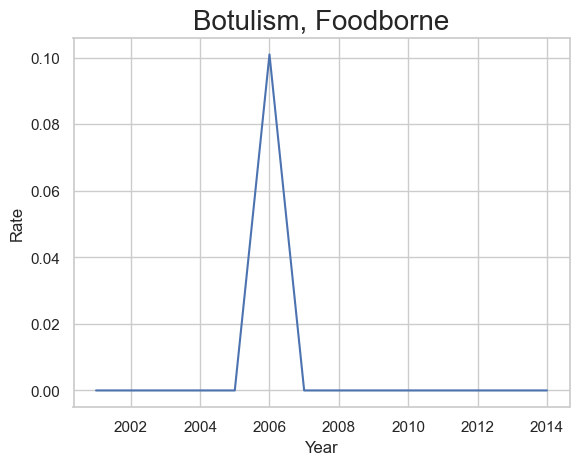

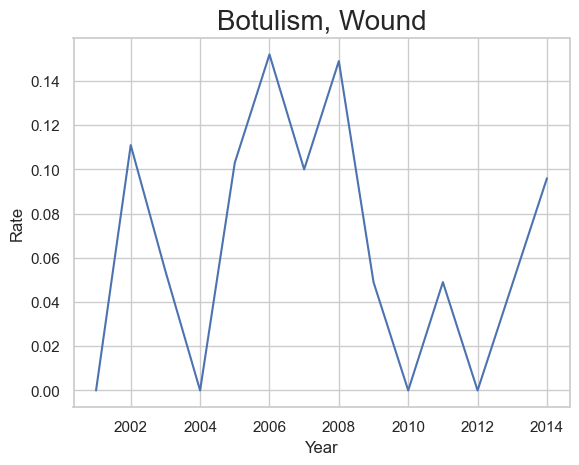

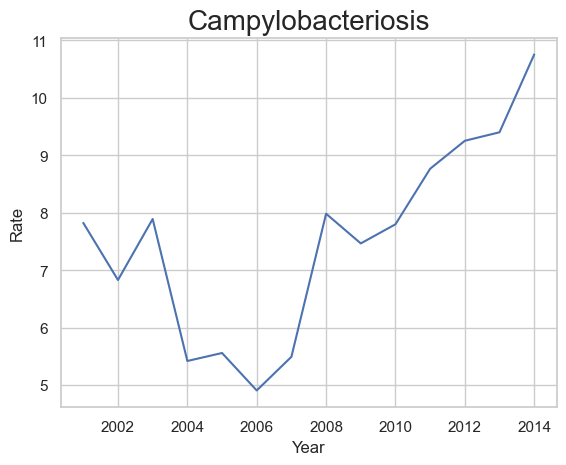

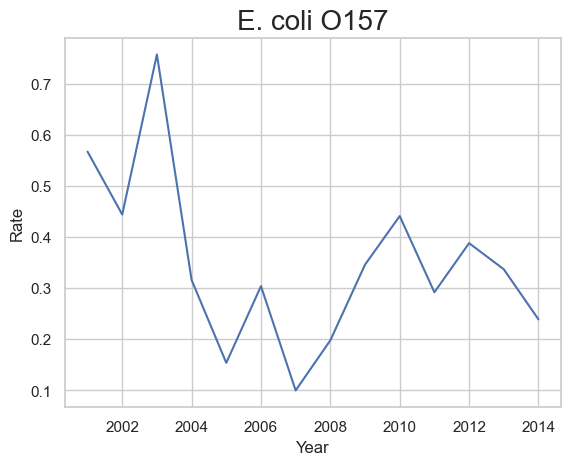

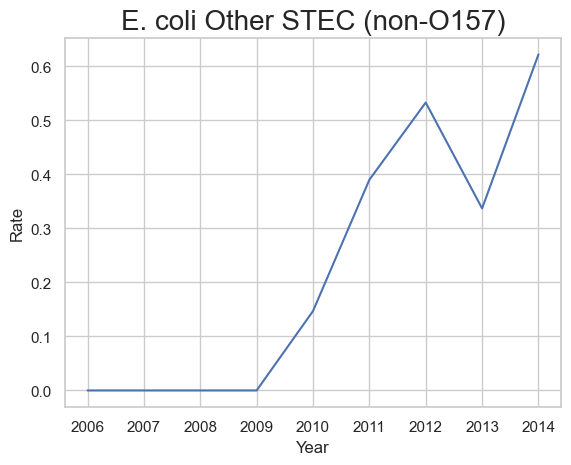

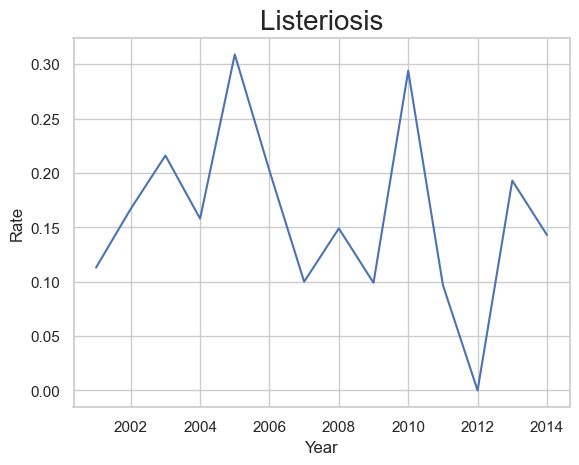

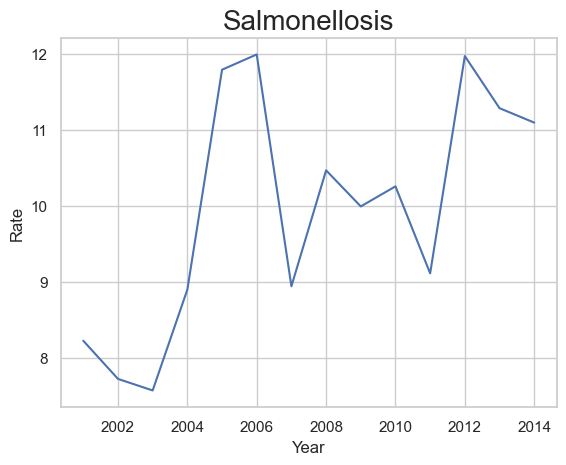

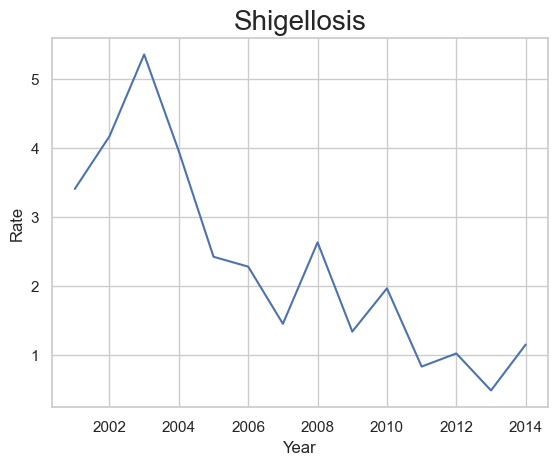

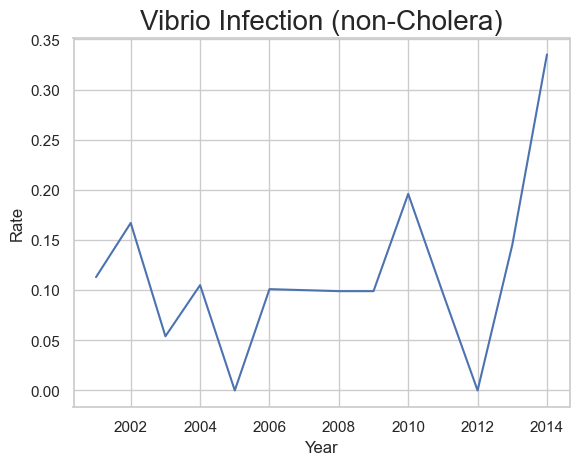

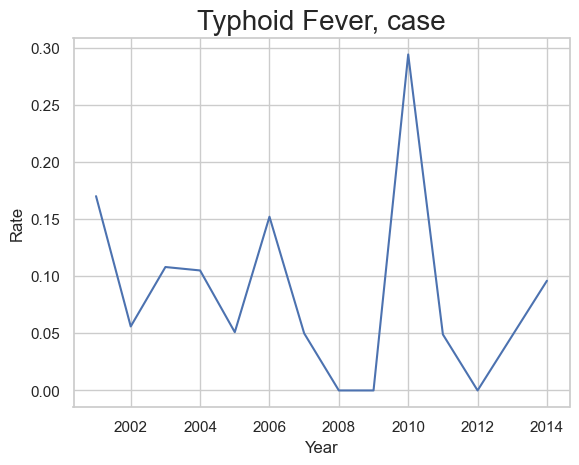

In [255]:
for col in ent.Disease.unique():
    temp = ent.loc[(ent.Disease == col) & (ent.Sex == 'Total') & (ent.County == 'San Bernardino'), ['Year', 'Rate']].sort_values(by='Year')
    sns.lineplot(data=temp, x='Year', y='Rate')
    plt.title(col, fontsize=20)
    plt.show()

### San Diego

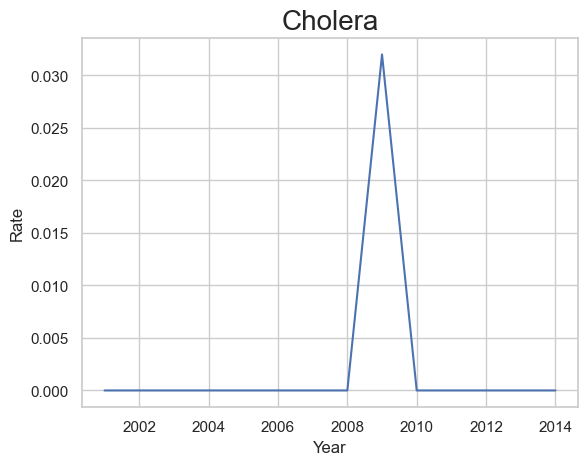

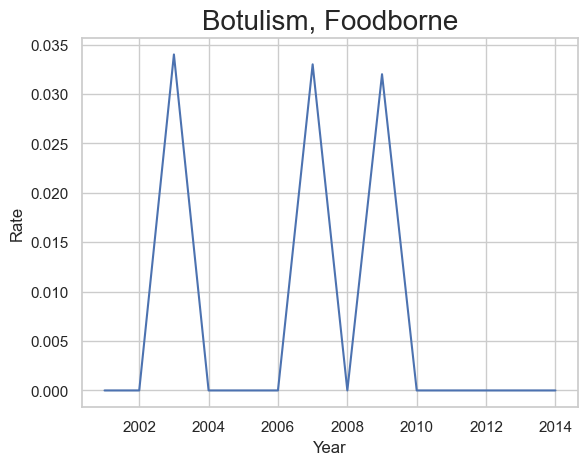

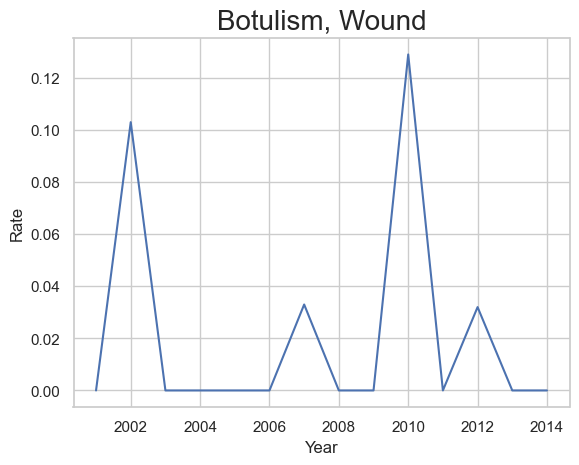

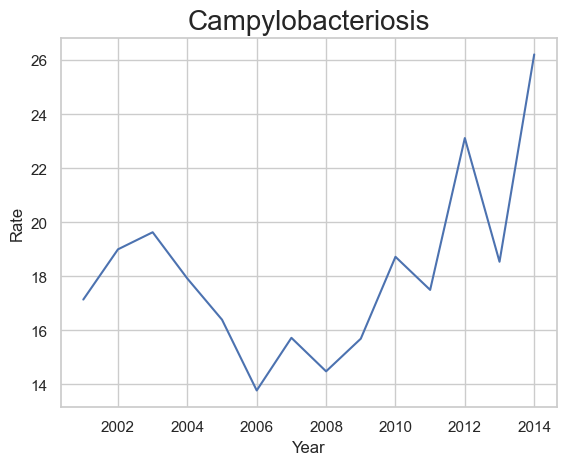

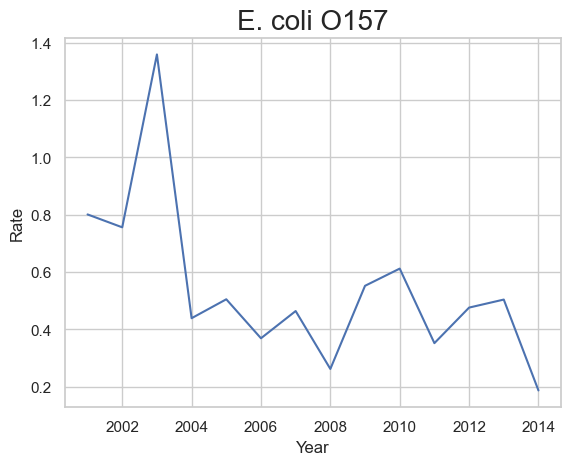

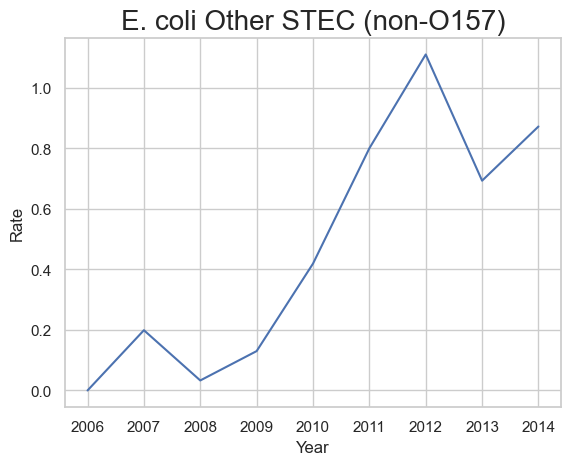

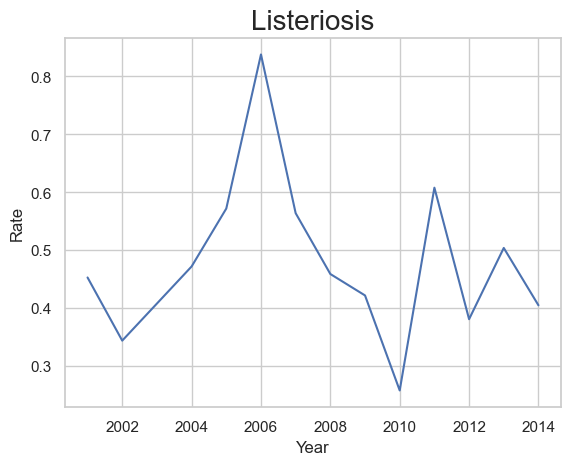

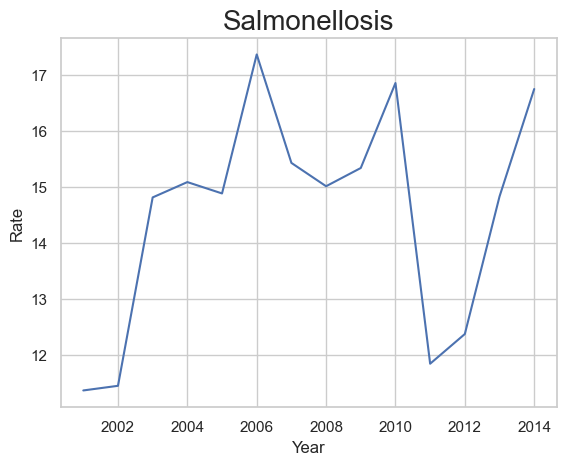

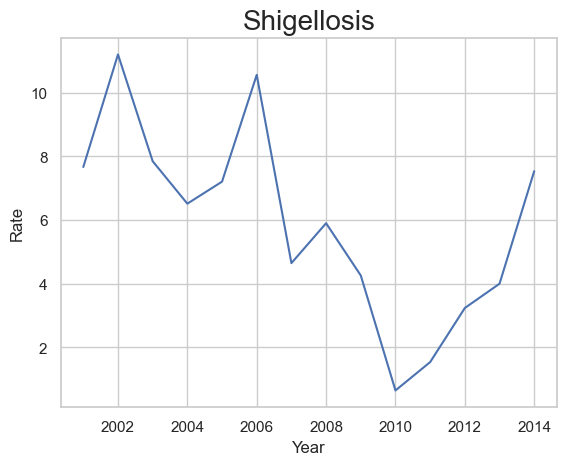

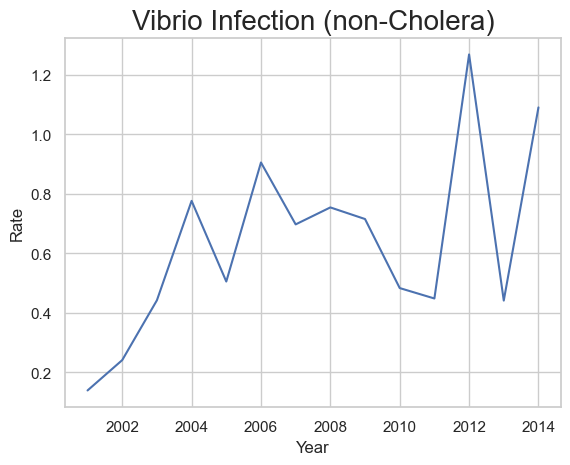

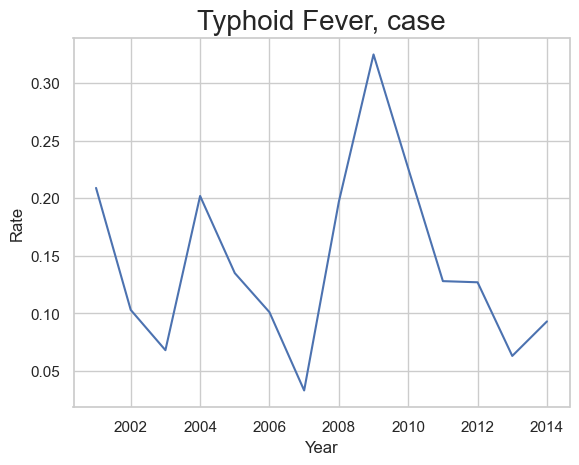

In [249]:
for col in ent.Disease.unique():
    temp = ent.loc[(ent.Disease == col) & (ent.Sex == 'Total') & (ent.County == 'San Diego'), ['Year', 'Rate']].sort_values(by='Year')
    sns.lineplot(data=temp, x='Year', y='Rate')
    plt.title(col, fontsize=20)
    plt.show()

In [167]:
# Group by Year and Disease, calculate the mean Rate across counties
avg_rate_by_disease_year = ent.groupby(['Year', 'Disease'], as_index=False).agg({
    'Rate': 'mean'  # Calculate the mean Rate
})

# Display the resulting table
print(avg_rate_by_disease_year)

     Year                         Disease       Rate
0    2001             Botulism, Foodborne   0.011712
1    2001                 Botulism, Wound   0.058927
2    2001              Campylobacteriosis  15.071571
3    2001                         Cholera   0.000000
4    2001                    E. coli O157   0.884328
..    ...                             ...        ...
144  2014                     Listeriosis   0.179667
145  2014                   Salmonellosis  13.112593
146  2014                     Shigellosis   2.706627
147  2014             Typhoid Fever, case   0.120949
148  2014  Vibrio Infection (non-Cholera)   0.589169

[149 rows x 3 columns]


## disease rates, by county, all years

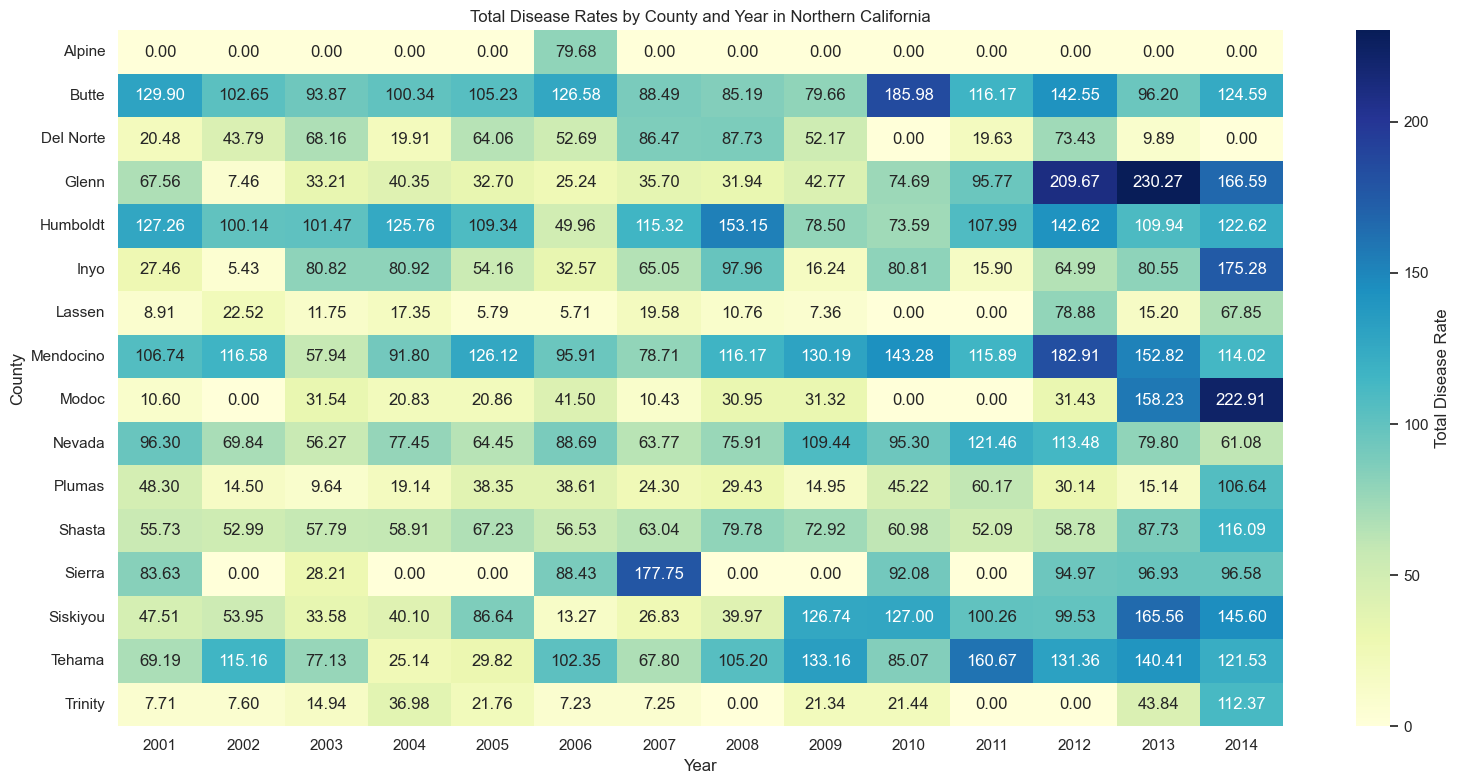

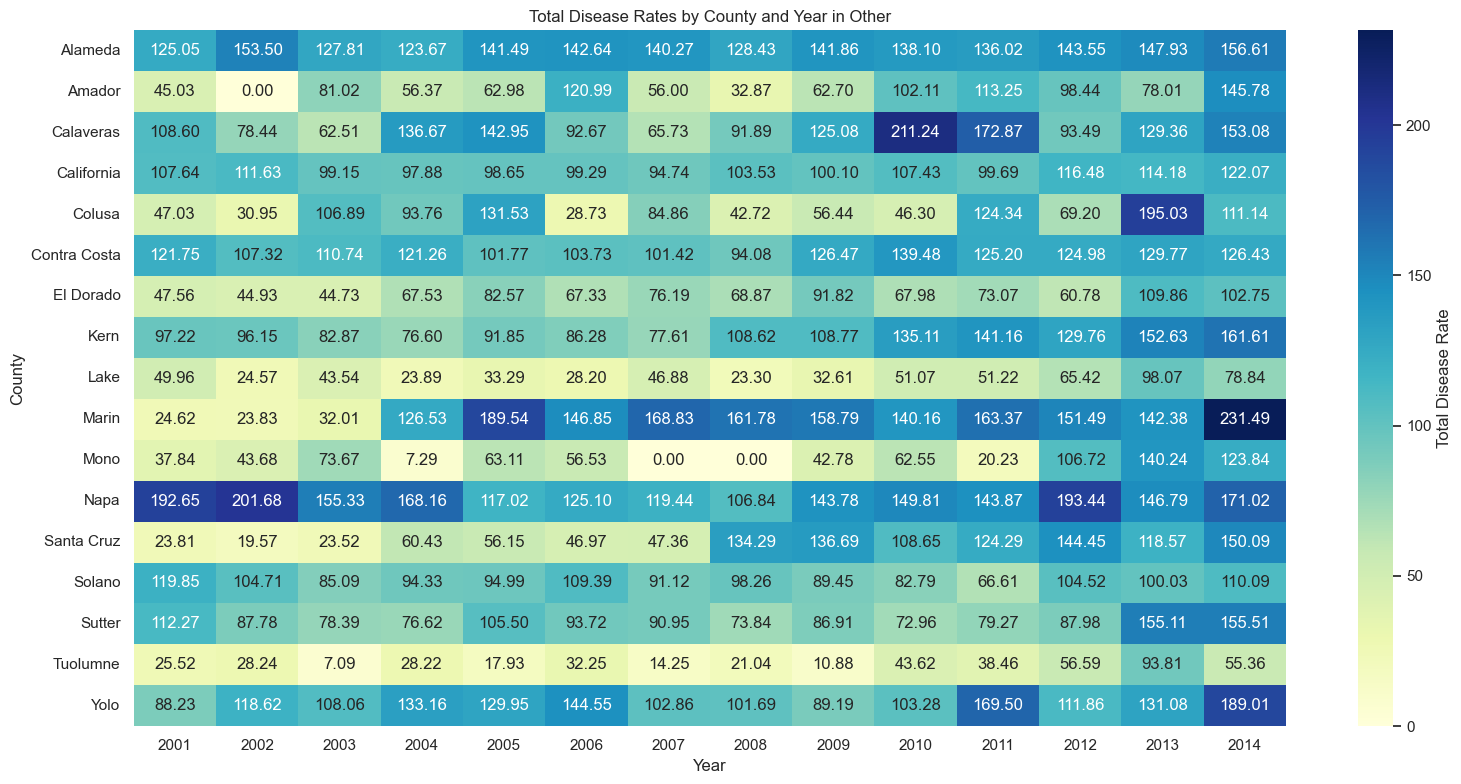

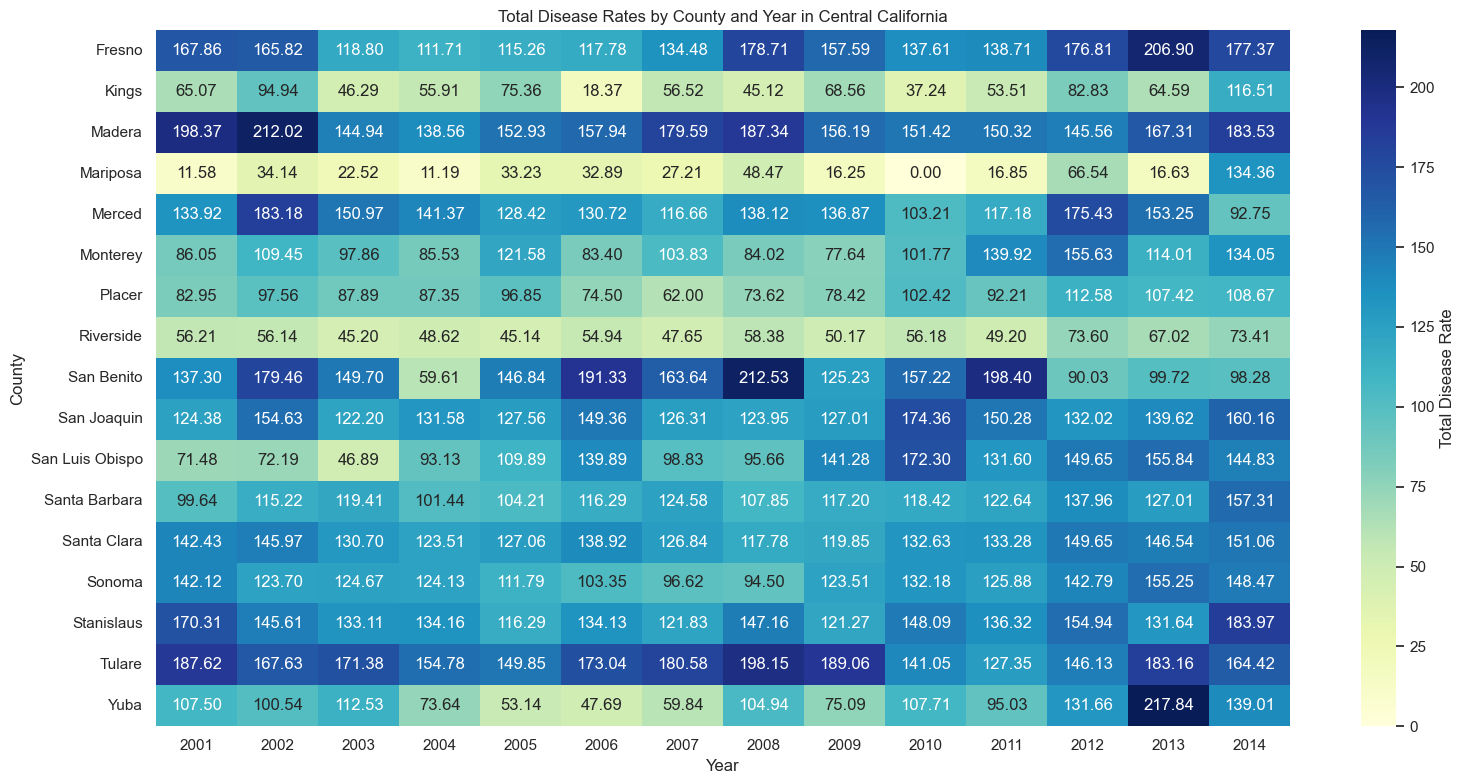

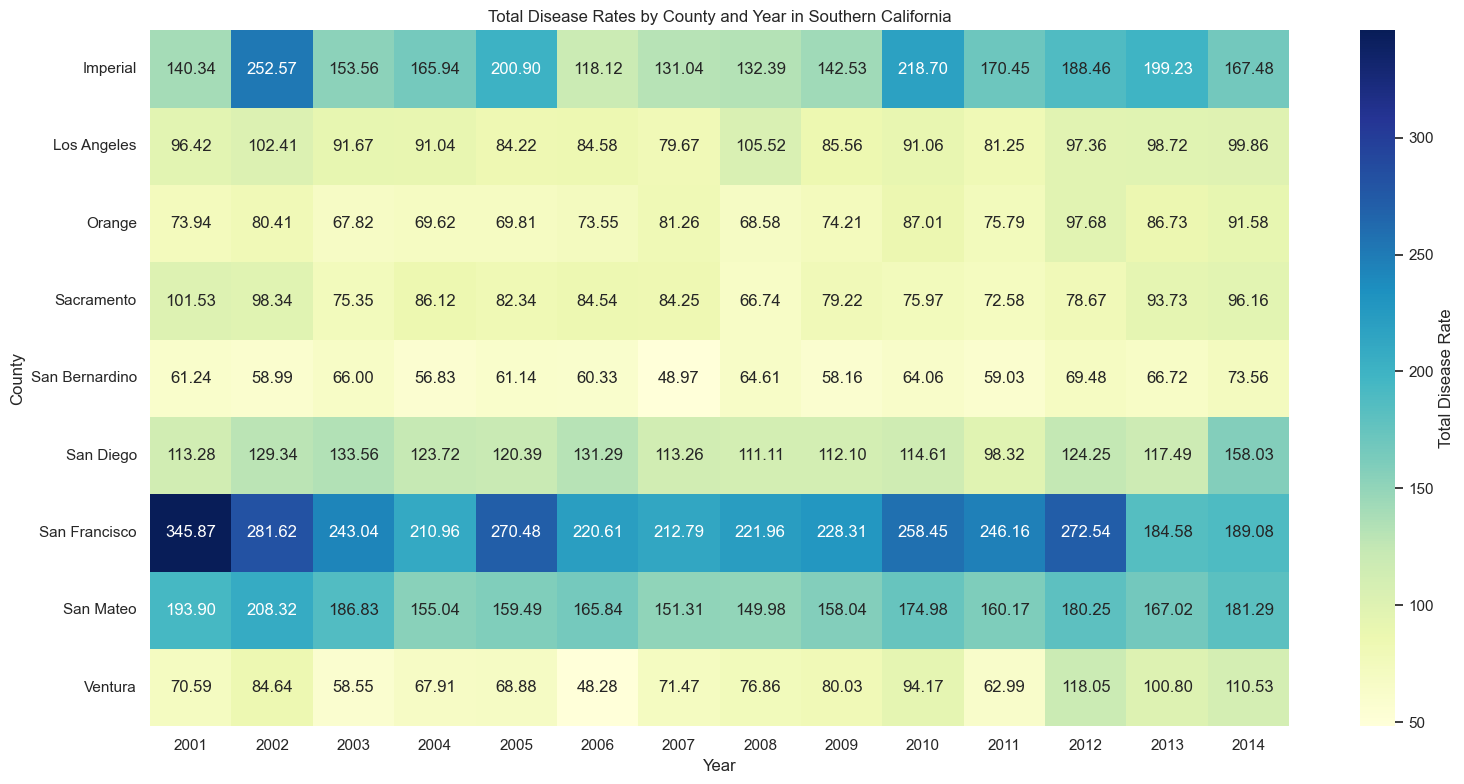

In [177]:
# Define county regions
region_mapping = {
    'Northern California': ['Humboldt', 'Mendocino', 'Siskiyou', 'Del Norte', 'Trinity', 'Shasta', 'Butte', 'Tehama', 'Glenn', 'Modoc', 'Lassen', 'Alpine', 'Nevada', 'Plumas', 'Sierra', 'Inyo'],
    'Central California': ['Fresno', 'Monterey', 'San Benito', 'Madera', 'Mariposa', 'Kings', 'Tulare', 'San Luis Obispo', 'Stanislaus', 'Merced', 'Riverside', 'Santa Barbara', 'San Joaquin', 'Yuba', 'Sonoma', 'Santa Clara', 'Placer'],
    'Southern California': ['Los Angeles', 'San Diego', 'Orange', 'Imperial', 'Ventura', 'San Bernardino', 'Riverside', 'San Luis Obispo', 'Santa Barbara', 'San Mateo', 'San Francisco', 'San Bernardino', 'Sacramento'],
    'Other': ['California']  # Including the 'California' entry in the "Other" category.
}

# Function to assign regions to counties
def assign_region(county):
    for region, counties in region_mapping.items():
        if county in counties:
            return region
    return 'Other'  # Default if county not found

# Create a figure for each region's heatmap
regions = ent['Region'].unique()

# Loop through each region to plot the heatmaps
for region in regions:
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Filter data for the current region
    region_data = ent[ent['Region'] == region]

    # Aggregate total disease rate by county and year
    total_rate_by_county_year = region_data.groupby(['County', 'Year']).agg({
        'Rate': 'sum'  # You can also use 'mean' if you want average rates instead of total rates
    }).reset_index()
    
    # Pivot the data to create a table with counties as rows and years as columns
    rate_pivot = total_rate_by_county_year.pivot_table(index='County', columns='Year', values='Rate', aggfunc='sum')
    
    # Plot the heatmap for total disease rates
    sns.heatmap(rate_pivot, cmap='YlGnBu', ax=ax, cbar_kws={'label': 'Total Disease Rate'}, annot=True, fmt='.2f')
    
    # Set titles and labels
    ax.set_title(f'Total Disease Rates by County and Year in {region}')
    ax.set_xlabel('Year')
    ax.set_ylabel('County')

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()

# 2.2 Campy Statewide Rates & CI by Groupy of 5

## Campy Rate & CI by Group - Line Plots

In [17]:
ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26373 entries, 0 to 26372
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     26373 non-null  object 
 1   County      26373 non-null  object 
 2   Year        26373 non-null  int64  
 3   Sex         26373 non-null  object 
 4   Count       26373 non-null  int64  
 5   Population  26373 non-null  int64  
 6   Rate        26373 non-null  float64
 7   CI.lower    26373 non-null  float64
 8   CI.upper    26373 non-null  float64
 9   Unstable    26373 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.0+ MB


## Avg. Rates & Avg. CIs by Group - Line - Multiple Figures

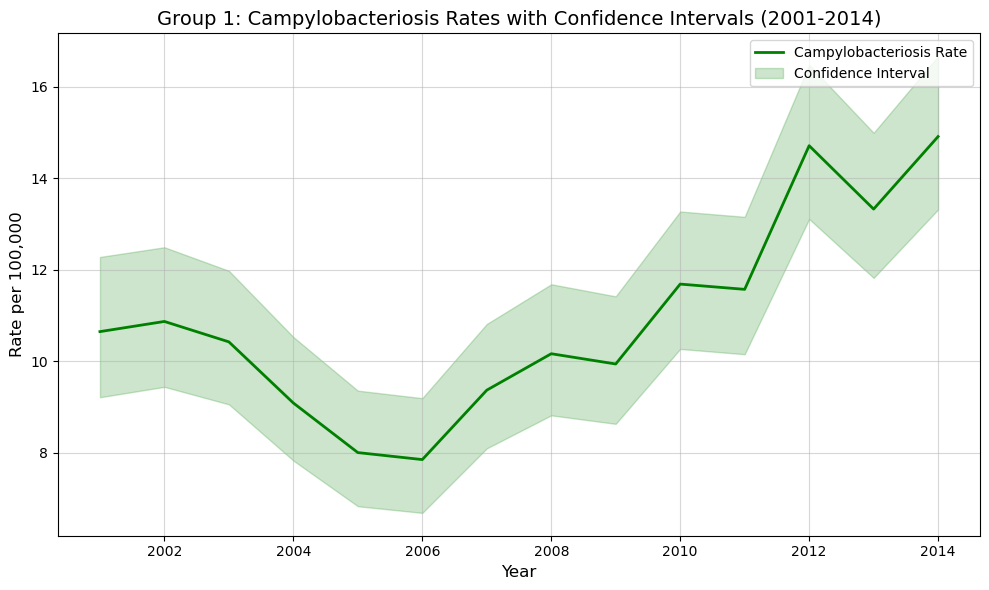

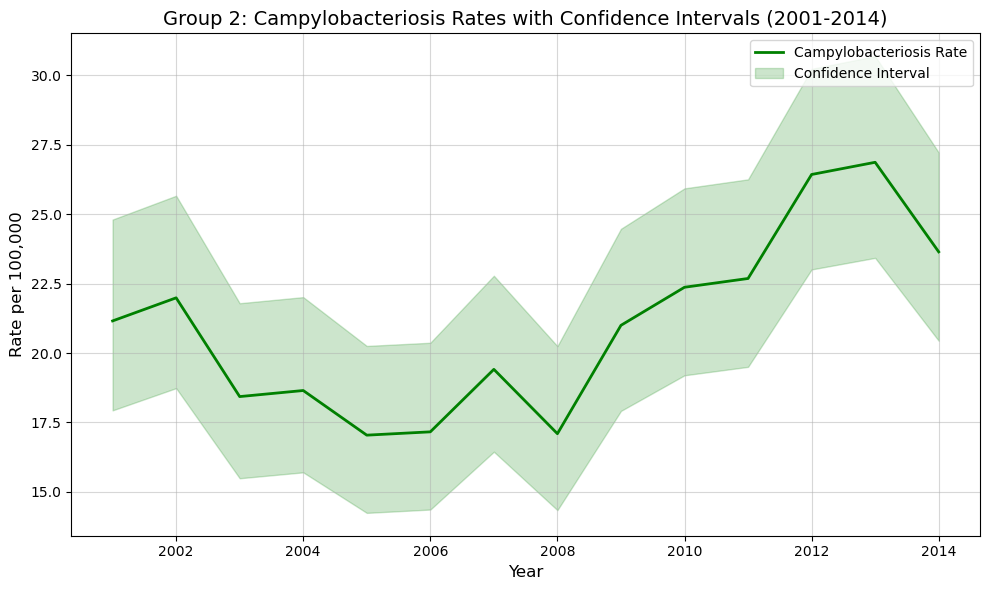

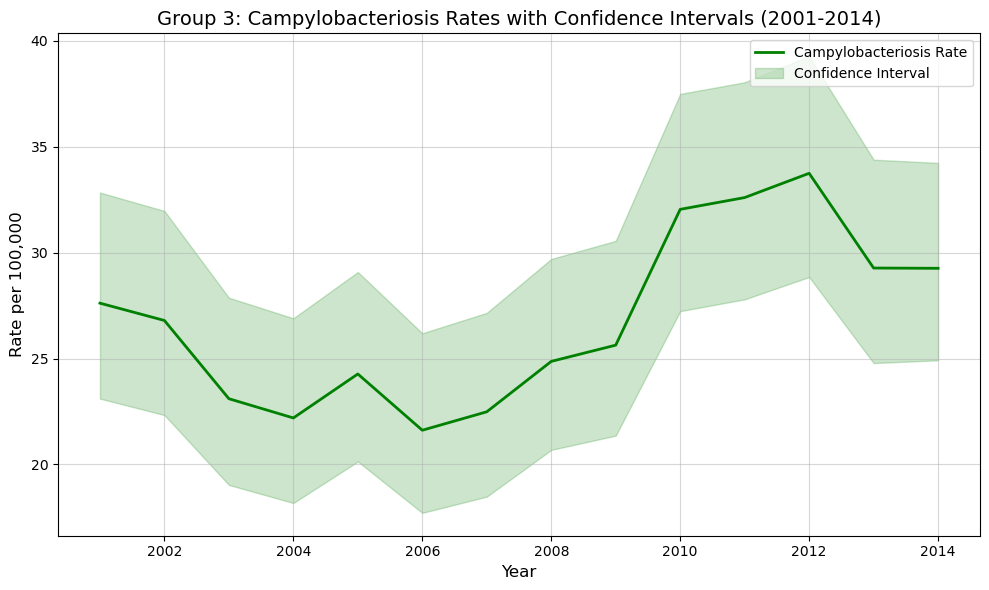

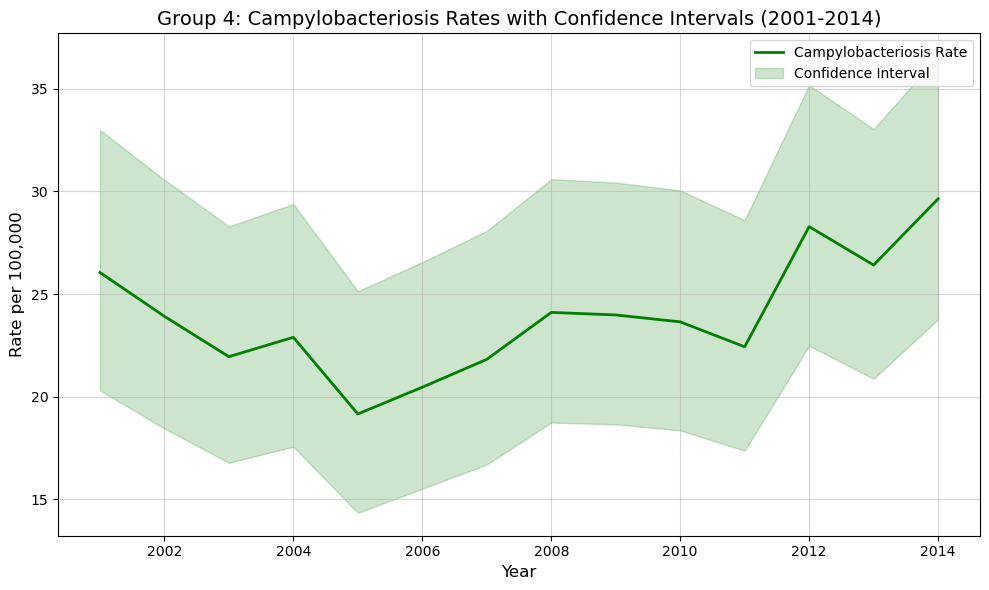

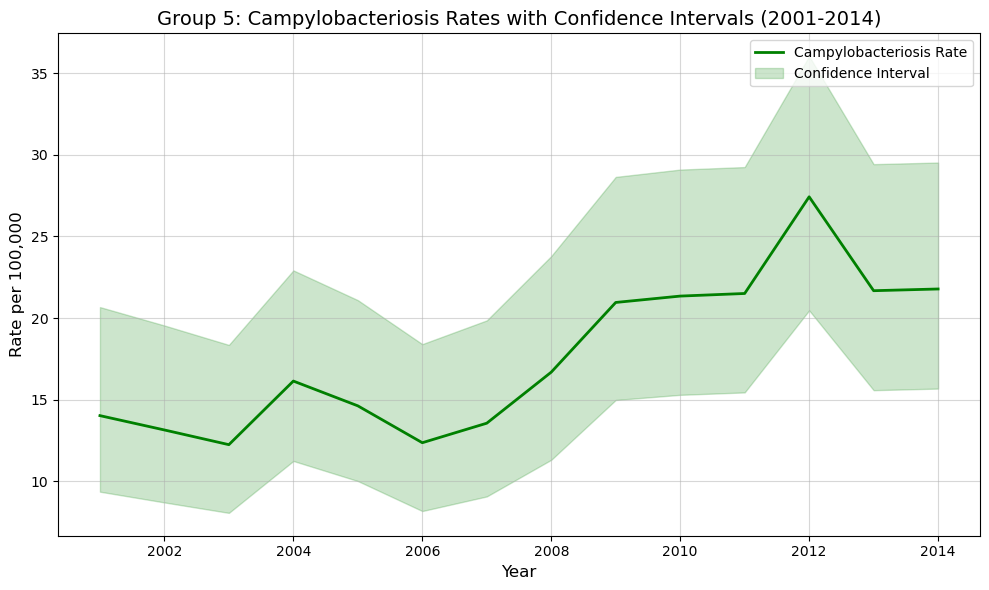

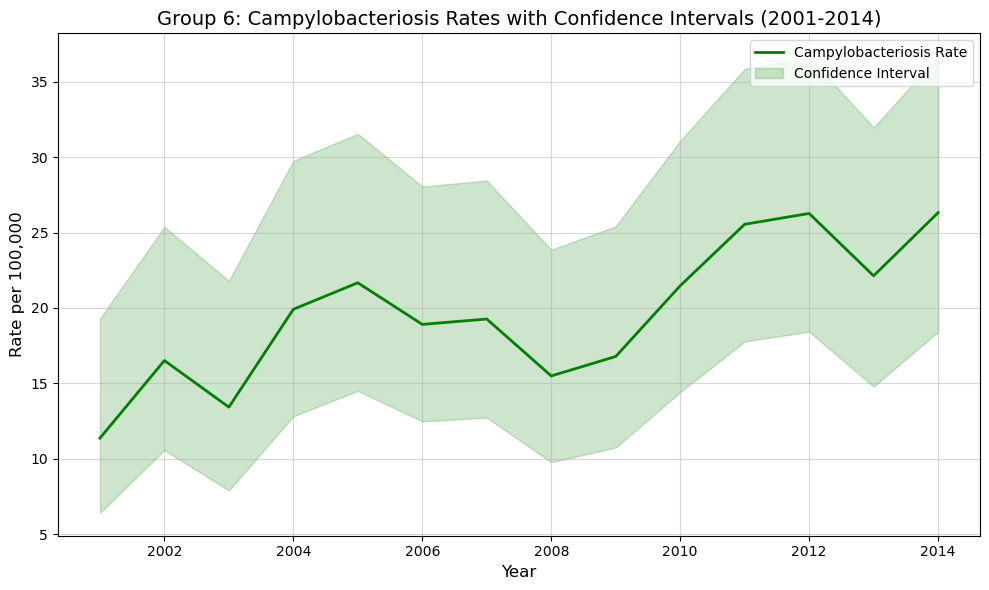

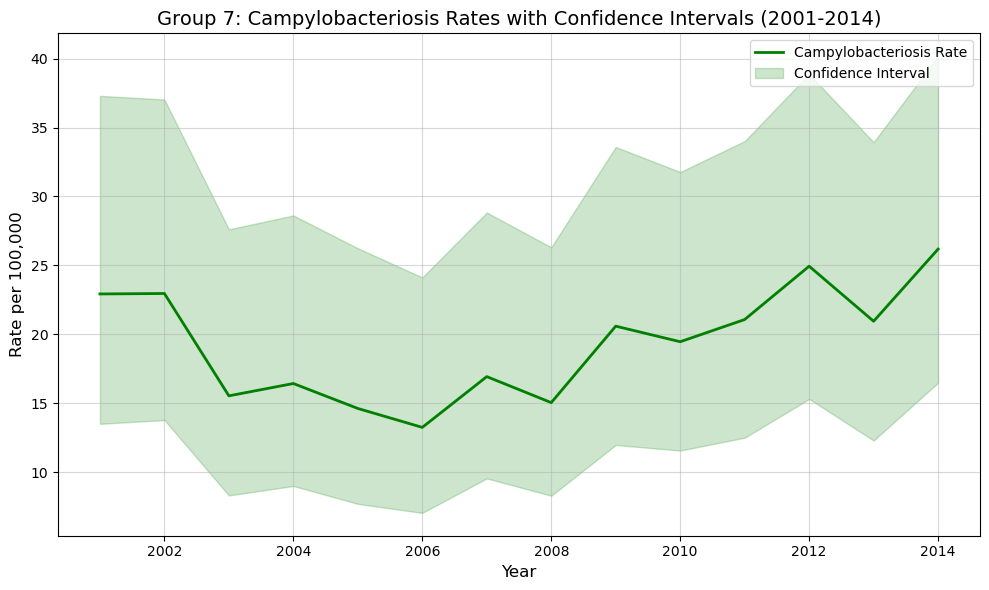

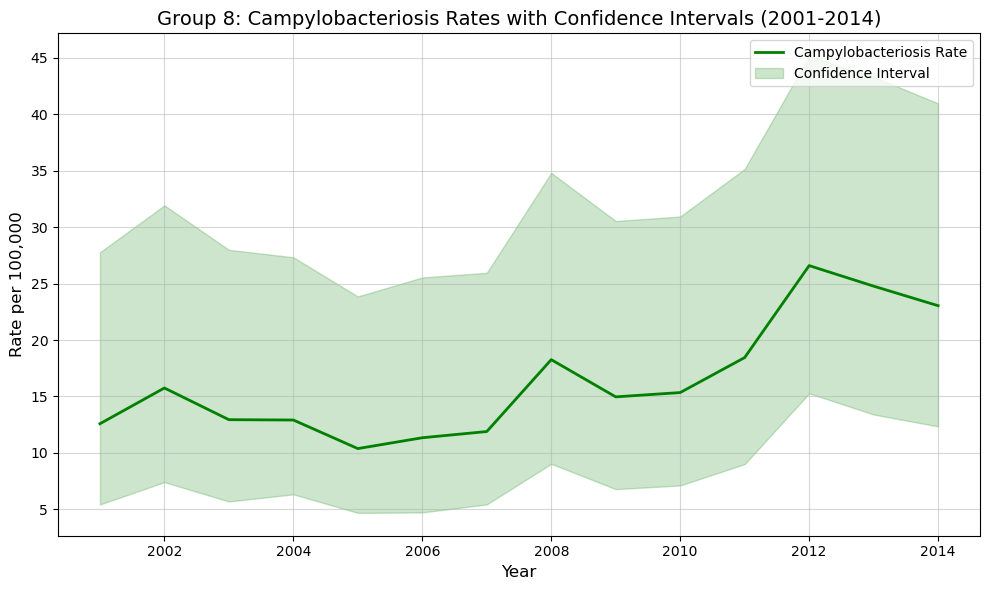

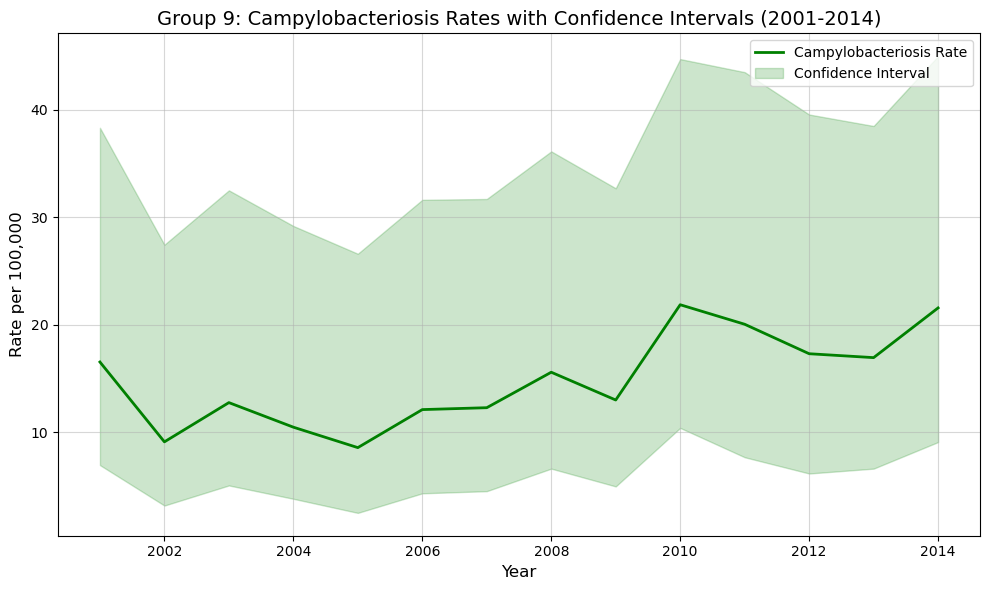

In [214]:
# Filter data for "Campylobacteriosis" only
campy_data = ent[ent['Disease'] == "Campylobacteriosis"]

# Define the county groups
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Plot for each group
for group_name, counties in county_groups.items():
    # Filter for counties in the group
    group_data = campy_data[campy_data['County'].isin(counties)]
    
    # Aggregate by year
    grouped = group_data.groupby('Year').agg({
        'Rate': 'mean',
        'CI.lower': 'mean',
        'CI.upper': 'mean'
    }).reset_index()

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the rates
    ax.plot(grouped['Year'], grouped['Rate'], label='Campylobacteriosis Rate', color='green', linewidth=2)
    # Add shaded confidence intervals
    ax.fill_between(grouped['Year'], grouped['CI.lower'], grouped['CI.upper'], color='green', alpha=0.2, label='Confidence Interval')
    
    # Customize plot
    ax.set_title(f"{group_name}: Campylobacteriosis Rates with Confidence Intervals (2001-2014)", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Rate per 100,000", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5)

    # Show plot
    plt.tight_layout()
    #plt.show()
    plt.savefig(f"Campy Rates with Confidence Interals {group_name}")

## Avg. Rates & Avg. CIs by Group - Line - One Figure

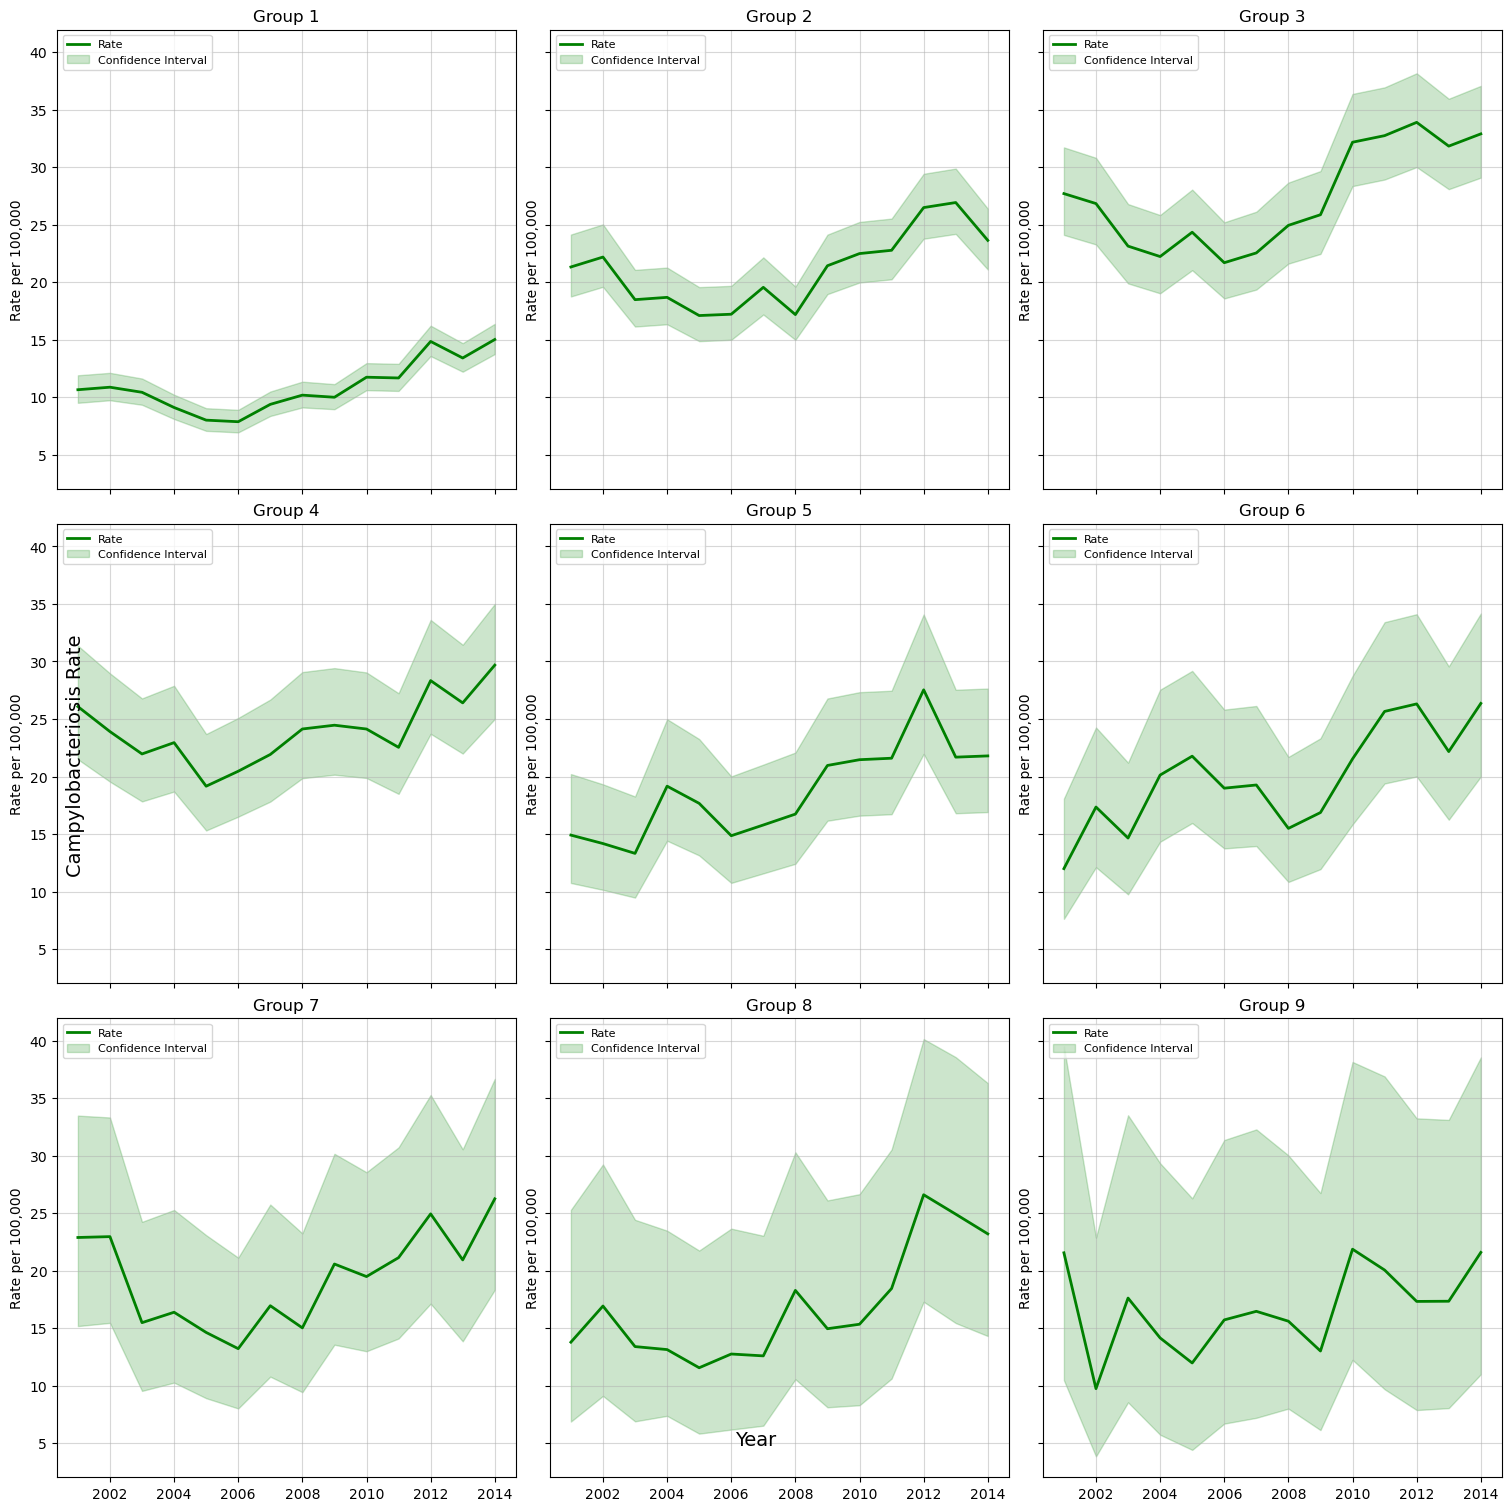

In [23]:
import matplotlib.pyplot as plt

# Filter data for "Campylobacteriosis" and "Total" Sex
campy_data = ent[(ent['Disease'] == "Campylobacteriosis") & (ent['Sex'] == "Total")]

# Define the county groups
county_groups = {
    "1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True, constrained_layout=True)
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop over each group and its corresponding subplot
for ax, (group_name, counties) in zip(axes, county_groups.items()):
    # Filter data for the current group
    group_data = campy_data[campy_data['County'].isin(counties)]
    
    # Aggregate data by year
    grouped = group_data.groupby('Year').agg({
        'Rate': 'mean',
        'CI.lower': 'mean',
        'CI.upper': 'mean'
    }).reset_index()
    
    # Plot the Campylobacteriosis rate
    ax.plot(grouped['Year'], grouped['Rate'], label='Rate', color='green', linewidth=2)
    
    # Add shaded confidence intervals
    ax.fill_between(grouped['Year'], grouped['CI.lower'], grouped['CI.upper'], color='green', alpha=0.2, label='Confidence Interval')
    
    # Customize the subplot
    ax.set_title(group_name, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Rate per 100,000", fontsize=10)
    ax.grid(alpha=0.5)
    ax.legend(fontsize=8, loc='upper left')

# Add common x-label and y-label for the entire figure
fig.text(0.5, 0.04, "Year", ha='center', fontsize=14)
fig.text(0.04, 0.5, "Campylobacteriosis Rate", va='center', rotation='vertical', fontsize=14)

# Save the figure
plt.savefig("Campy_Rates_with_CI_Subplots_3x3.png", bbox_inches='tight')

# Show the plot
plt.show()


## Descriptive Statistics - Pop, Rate, CI 

In [57]:
ent.Sex.unique()

array(['Male', 'Total', 'Female'], dtype=object)

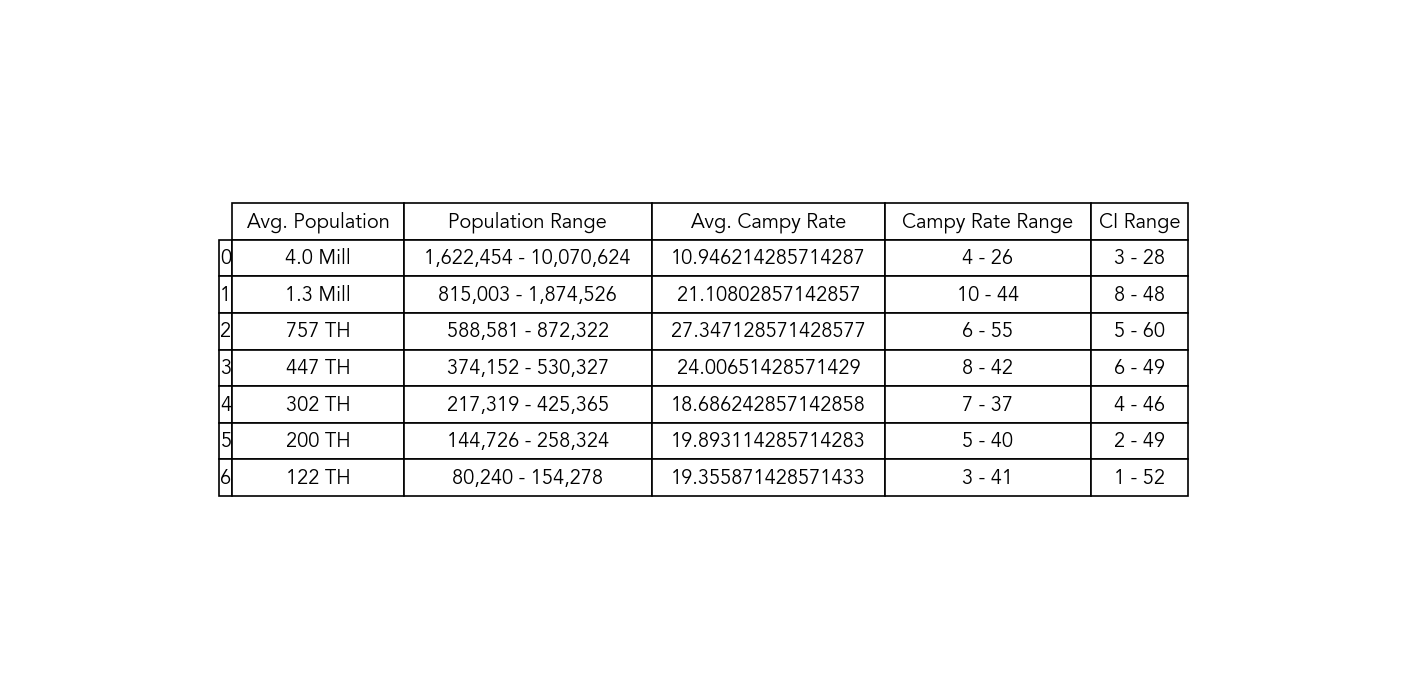

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Define the county groups (you can update or add more counties if needed)
county_groups = {
    "Group 3": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 4": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 5": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 6": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 7": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 8": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 9": ["Madera", "Kings", "Napa", "Nevada", "Sutter"]
}

# Initialize a list to store group stats
group_stats = []

# Loop through each group
for group_name, counties in county_groups.items():
    # Filter the data for Campylobacteriosis, the counties in the group, and "Total" sex
    group_data = ent[(ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['County'].isin(counties)) & 
                     (ent['Sex'] == 'Total')]
    
    # Check if the filtered data has rows
    if group_data.empty:
        print(f"Warning: No data found for {group_name}. Skipping group.")
        continue  # Skip to next group if no data is available

    # Calculate group statistics (average population, rate, CI range, etc.)
    avg_population = group_data['Population'].mean()
    population_range = f"{group_data['Population'].min():,.0f} - {group_data['Population'].max():,.0f}"
    avg_rate = group_data['Rate'].mean()
    rate_range = f"{group_data['Rate'].min():.0f} - {group_data['Rate'].max():.0f}"  # No decimals
    ci_range = f"{group_data['CI.lower'].min():.0f} - {group_data['CI.upper'].max():.0f}"  # No decimals

    # Store the stats for each group
    group_summary = {
        'Avg. Population': avg_population,
        'Population Range': population_range,
        'Avg. Campy Rate': avg_rate,
        'Campy Rate Range': rate_range,
        'CI Range': ci_range
    }

    # Append the results to the group_stats list
    group_stats.append(group_summary)

# Convert the list of group statistics into a DataFrame
group_stats_df = pd.DataFrame(group_stats)

# Format the population column (assumes it's in actual population numbers)
def format_population(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f} Mill"  # Format as millions
    elif value >= 1_000:
        return f"{value/1_000:,.0f} TH"  # Format as thousands with commas
    else:
        return str(value)

# Apply the population formatting
group_stats_df['Avg. Population'] = group_stats_df['Avg. Population'].apply(format_population)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table with index only (no "Group" column)
tbl = table(ax, group_stats_df, loc='center', cellLoc='center', colWidths=[1.5]*len(group_stats_df.columns))

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.auto_set_column_width(col=list(range(len(group_stats_df.columns))))

# Adjust row height to create space between rows
tbl.scale(1.5, 1.5)  # Increase the vertical scale to add space between rows

# Set the index as the first column
group_stats_df.index += 1  # Start the index at 1, or adjust as needed
tbl.auto_set_column_width([0])  # Adjust index column width

plt.tight_layout()  # Adjust layout to fit table well
plt.show()



### Statistics Graph 

In [254]:
primary_colors = [
    "#9CAF88",  # Sage Green
    "#FFD966",  # Warm Yellow
    "#6D4C41",  # Earthy Brown
    "#D4A5A5",  # Soft Pink
    "#A6D5E5",  # Light Blue
    "#F7EFE2"   # Cream
]

In [256]:
secondary_colors = [
    "#B5CDA3",  # Light Olive Green
    "#E4CDA7",  # Beige Tan
    "#B4A7D6"   # Lavender
]

In [258]:
contrast_colors = [
    "#FF6F61",  # Coral Red
    "#4B3832",  # Deep Espresso Brown
    "#3C6478"   # Slate Blue
]

In [260]:
jon_colors = primary_colors + secondary_colors + contrast_colors

In [262]:
# Set global font settings to Avenir Next
plt.rcParams['font.family'] = "Avenir"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24

# Match font weights similar to Helvetica
plt.rcParams['axes.titleweight'] = "medium"  # Avenir's "medium" matches Helvetica's "normal" for titles
plt.rcParams['axes.labelweight'] = "demibold"  # Similar to "bold" in Helvetica, but a little lighter
plt.rcParams['font.weight'] = "light"  # "light" for a subtle, modern touch on general text

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 120  # Slightly higher dpi for clearer detail with Avenir Next

In [326]:
ent.nunique()

Disease         11
County          59
Year            14
Sex              3
Count          570
Population    2459
Rate          6556
CI.lower      5074
CI.upper      9046
Unstable         3
CI_Range      9587
dtype: int64

In [344]:
ent.columns.unique()

Index(['Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate',
       'CI.lower', 'CI.upper', 'Unstable', 'CI_Range'],
      dtype='object')

AttributeError: 'Table' object has no attribute 'set_column_widths'

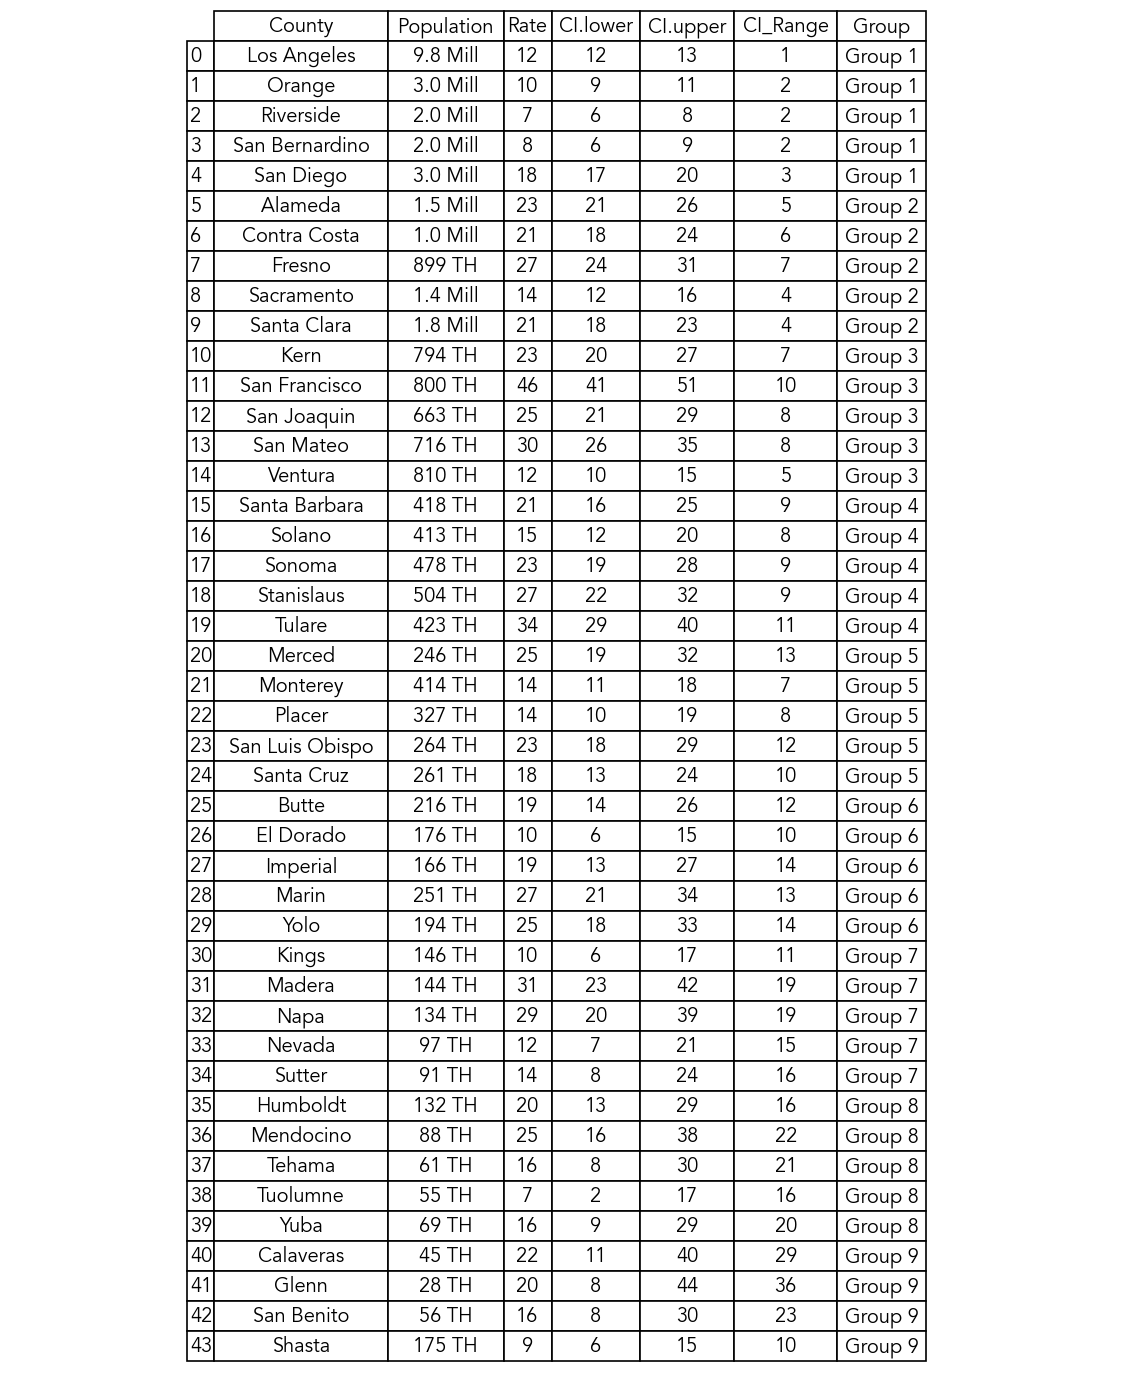

## Campy Values Heatmap - Checkpoint

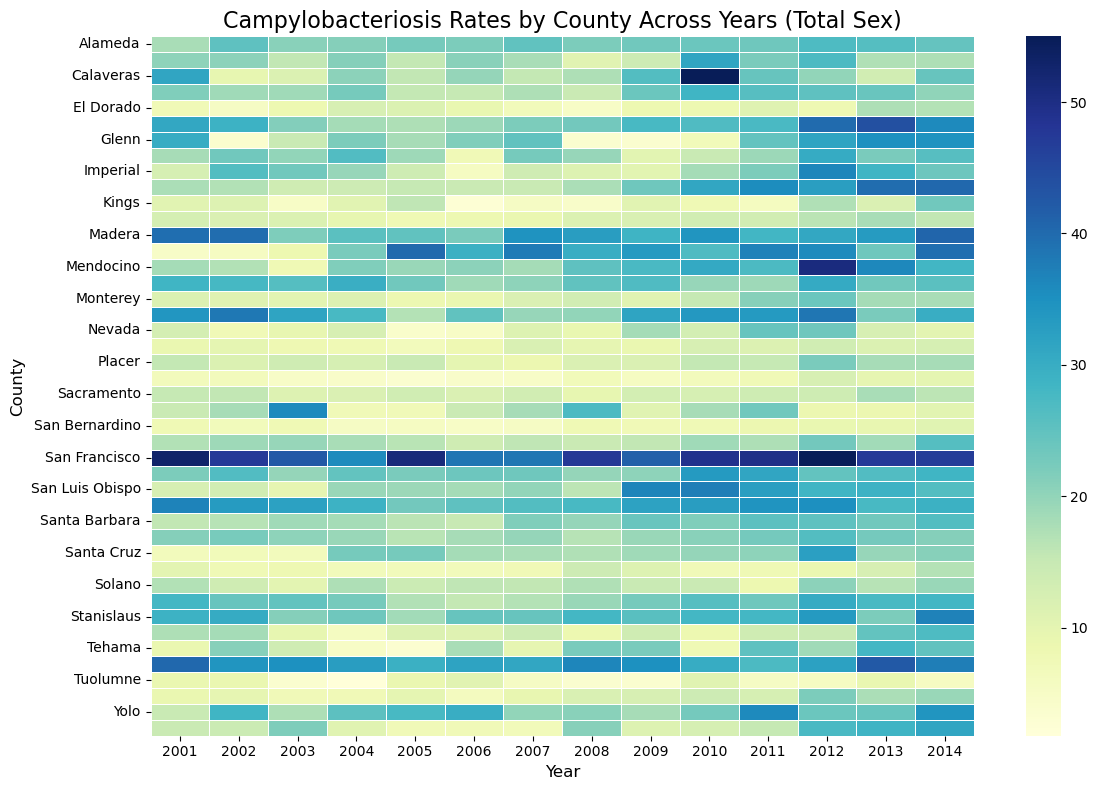

In [235]:
# Define the county groups
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Filter the dataset for Campylobacteriosis cases where Sex = 'Total'
campy_data = ent[(ent['Disease'] == 'Campylobacteriosis') & (ent['Sex'] == 'Total')]

# Filter for the counties in your county_groups
counties_of_interest = sum(county_groups.values(), [])  # Flatten the list of counties
campy_data = campy_data[campy_data['County'].isin(counties_of_interest)]

# Pivot the data to have counties as rows, years as columns, and the rate as the values
heatmap_data = campy_data.pivot_table(index='County', columns='Year', values='Rate', aggfunc='mean')

# Create a new figure for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap plot
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='.2f', linewidths=.5)

# Highlight the 0.00 values by changing their text to bold and red
for text in ax.texts:
    if text.get_text() == '0.00':
        text.set_fontweight('bold')
        text.set_color('red')

# Set plot titles and labels
ax.set_title('Campylobacteriosis Rates by County Across Years (Total Sex)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('County', fontsize=12)

# Show the plot
plt.tight_layout() 
plt.savefig(f"Campy_Rates_Heat_")

# 2.3. County-Level Deep Dive

## Heatmaps

### Rates by Group - Subplots in One Fig. 

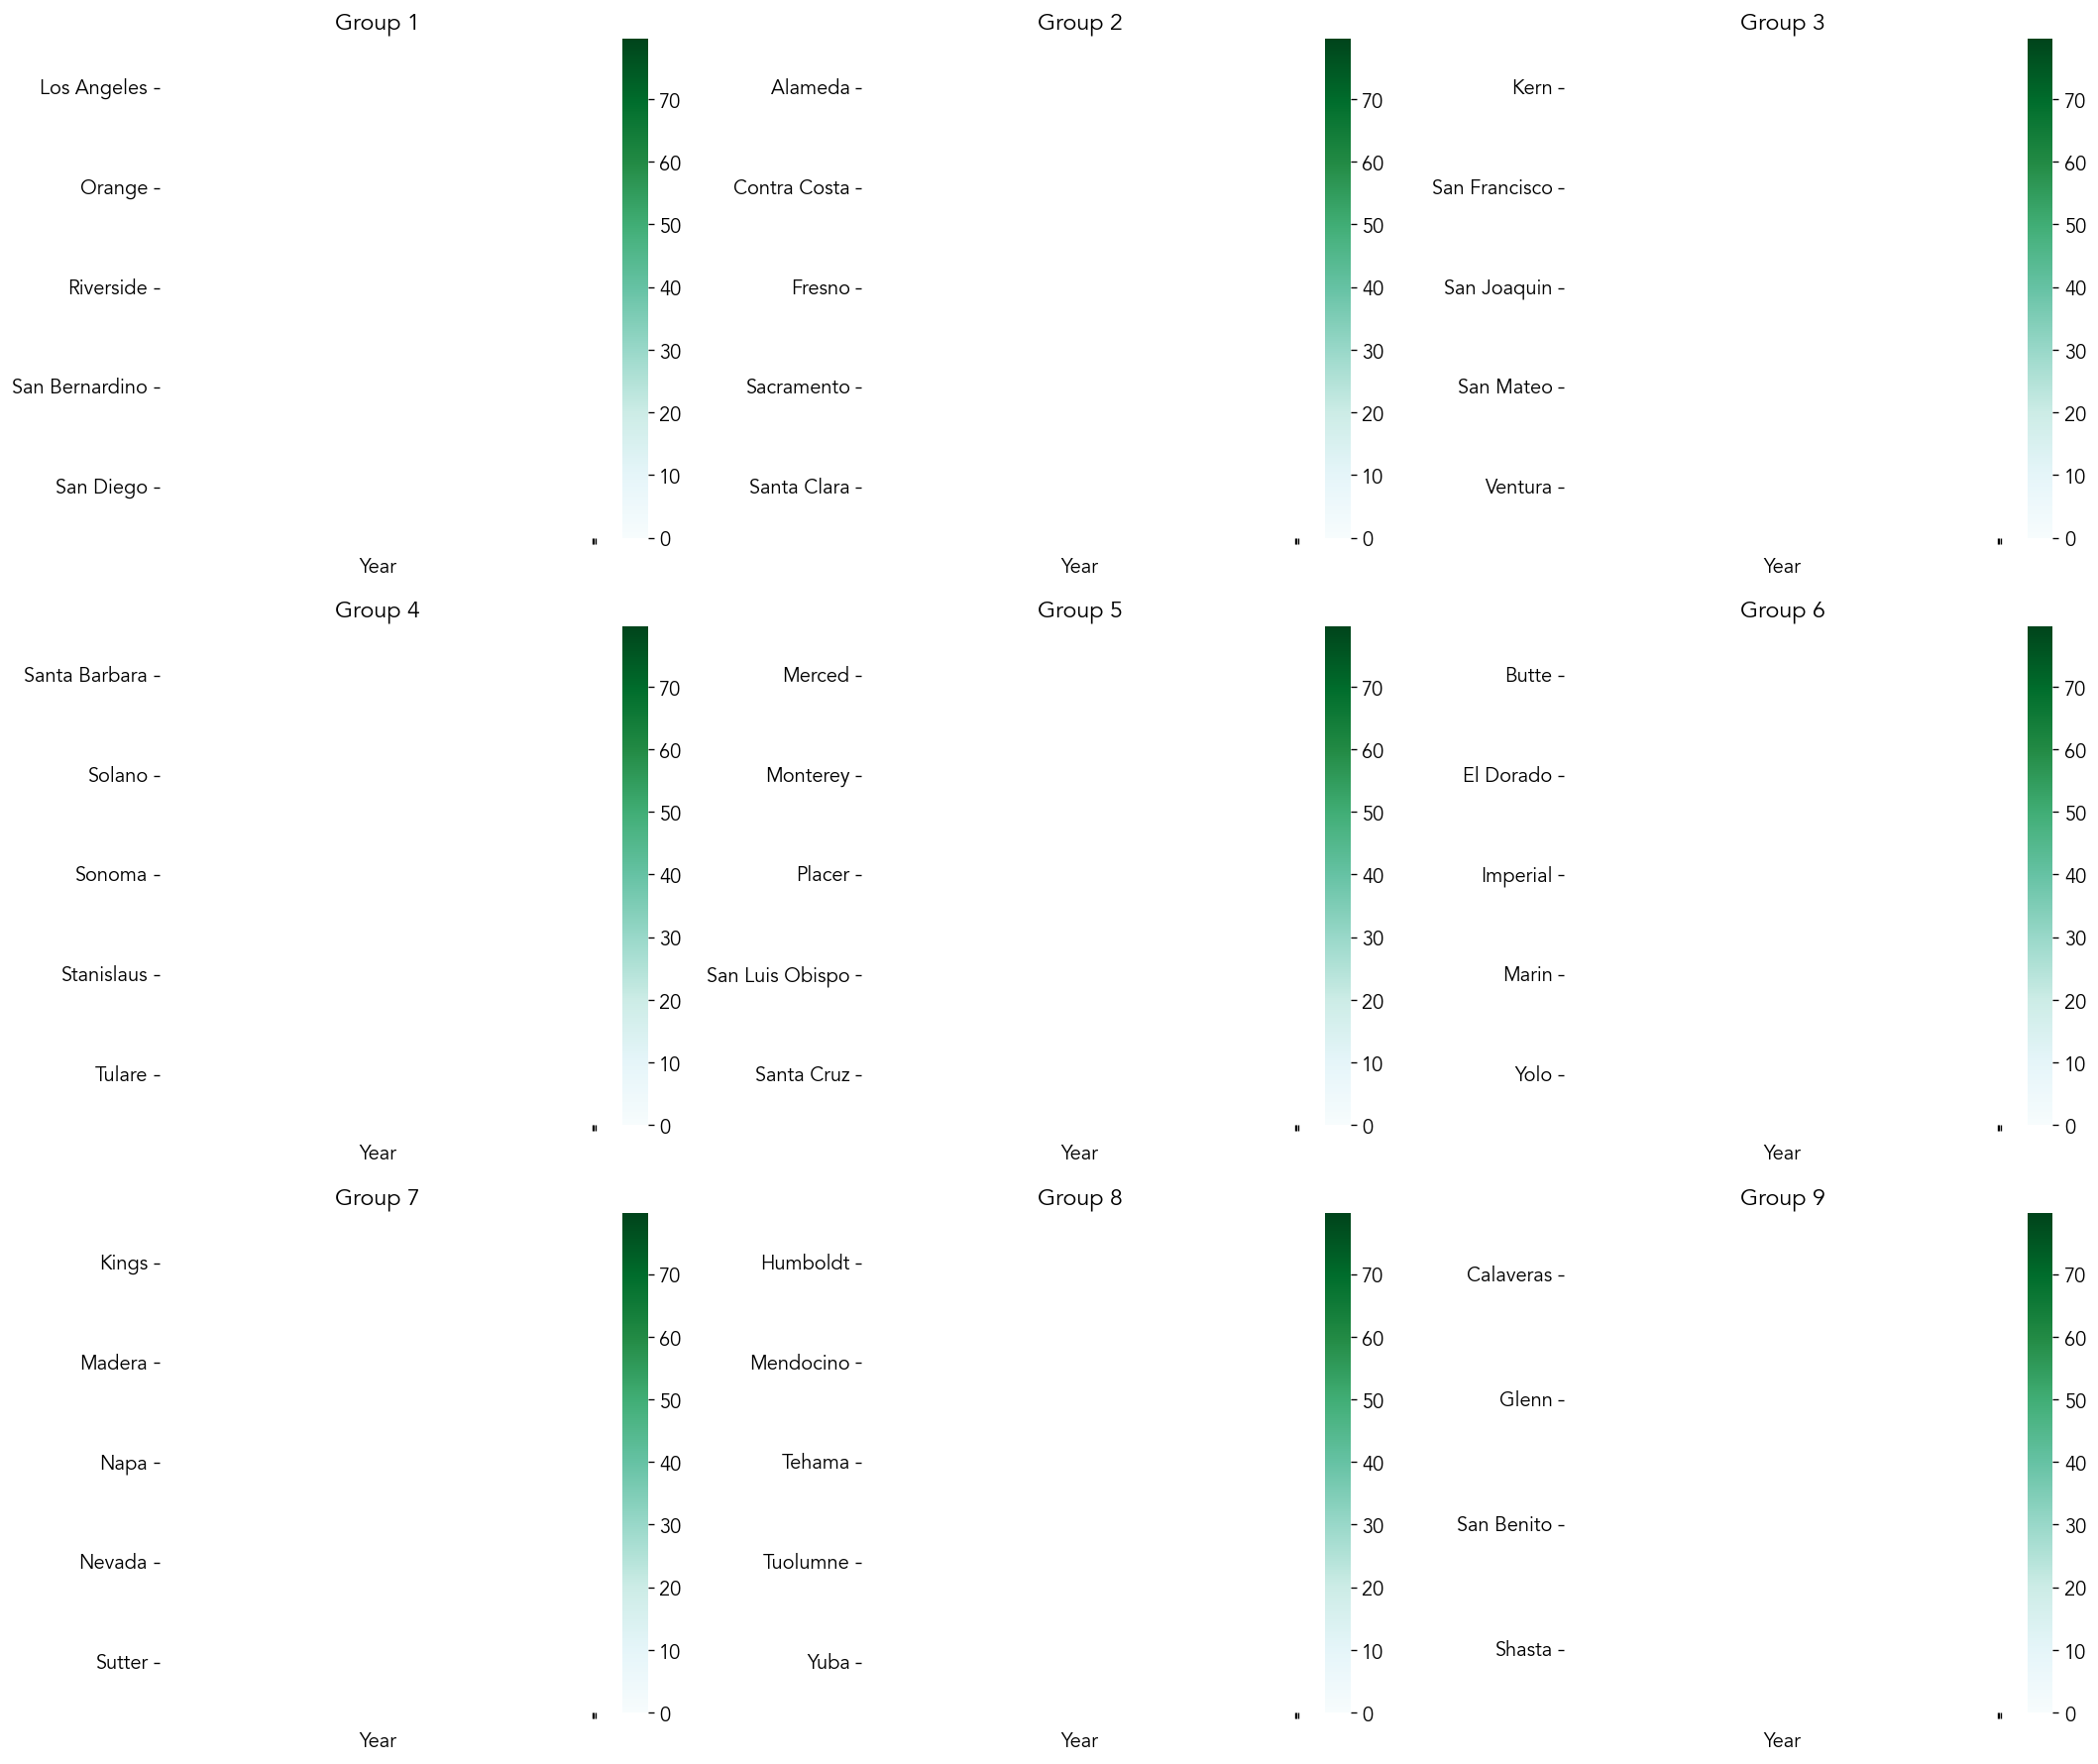

In [382]:
# Define the county groups (ensure this matches your dataset)
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Calculate the overall min and max for Campylobacteriosis rates across all groups
global_min = ent[(ent['Disease'] == 'Campylobacteriosis') & (ent['Sex'] == 'Total')]['Rate'].min()
global_max = ent[(ent['Disease'] == 'Campylobacteriosis') & (ent['Sex'] == 'Total')]['Rate'].max()

# Create a figure with subplots for the heatmaps
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3x3 grid of subplots

# Flatten axes array to easily iterate
axes = axes.flatten()


# Loop over each group and create the heatmap for Campylobacteriosis rates
for i, (group_name, counties) in enumerate(county_groups.items()):
    # Filter the data for counties in the group and the disease Campylobacteriosis
    group_data = ent[(ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['County'].isin(counties)) & 
                     (ent['Sex'] == 'Total')]
    
    # Pivot data for heatmap of Campylobacteriosis Rates with Year on the x-axis and County on the y-axis
    rate_pivot = group_data.pivot_table(index='County', columns='Year', values='Rate', aggfunc='mean')
    
    # Plot the Campylobacteriosis Rate Heatmap on the respective subplot axis
    sns.heatmap(rate_pivot, annot=False, fmt='.2f', cmap='BuGn', 
                cbar_kws={'label': ''}, linewidths=0.5, 
                ax=axes[i], vmin=global_min, vmax=global_max)
    
    # Set titles and labels for each subplot
    axes[i].set_title(f"{group_name}", fontsize=14)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('', fontsize=12)
    
    # Rotate x-axis labels (Years) to be slanted at 45 degrees and show only specific years (2001, 2007, 2014)
    axes[i].set_xticks([2001, 2007, 2014])  # Set the x-ticks to show only the desired years
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate year labels
    


# Adjust layout for better spacing
plt.tight_layout()
plt.show()
#plt.savefig(f"Campylobacteriosis_Rates_All_Groups.png")
#plt.close()

### Rates by Group - Multiple Figures,   

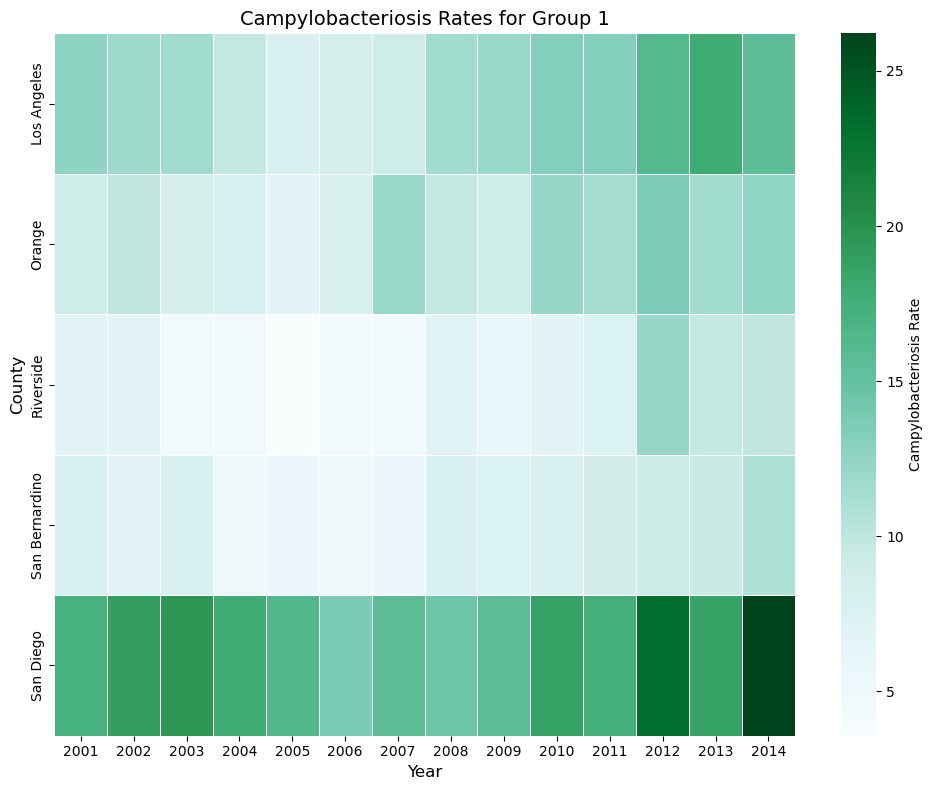

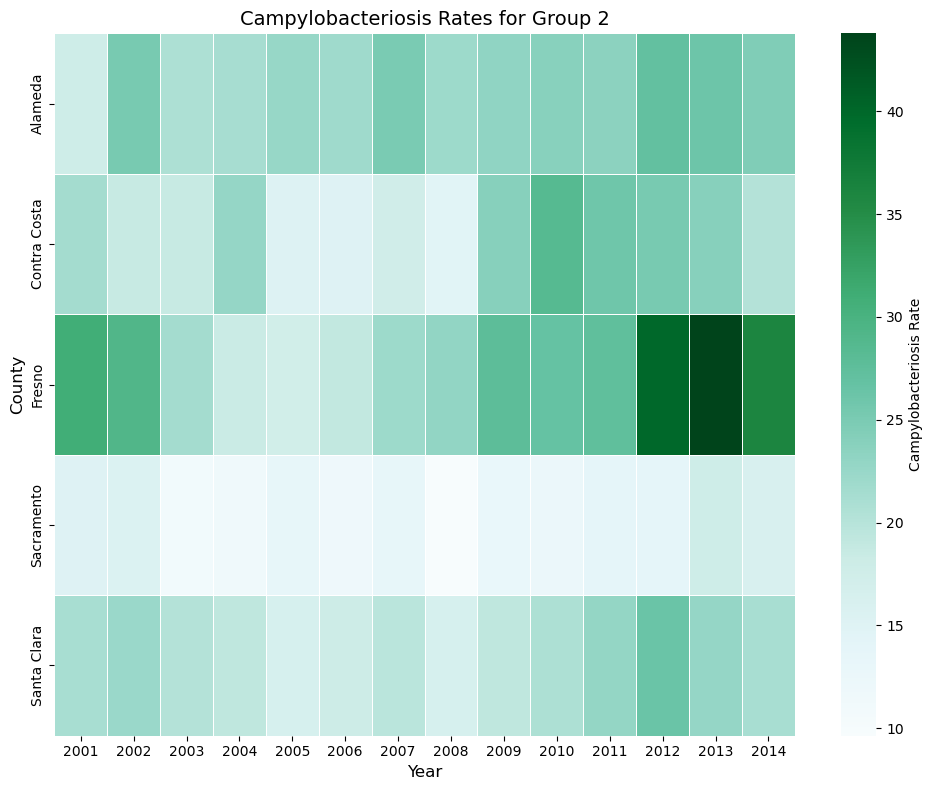

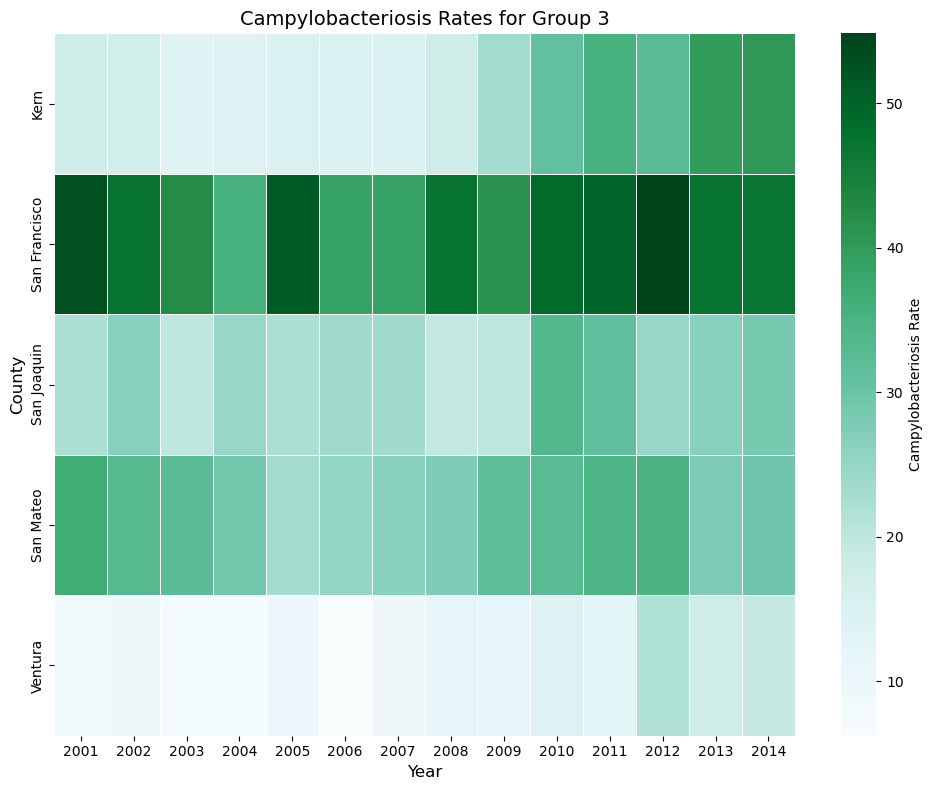

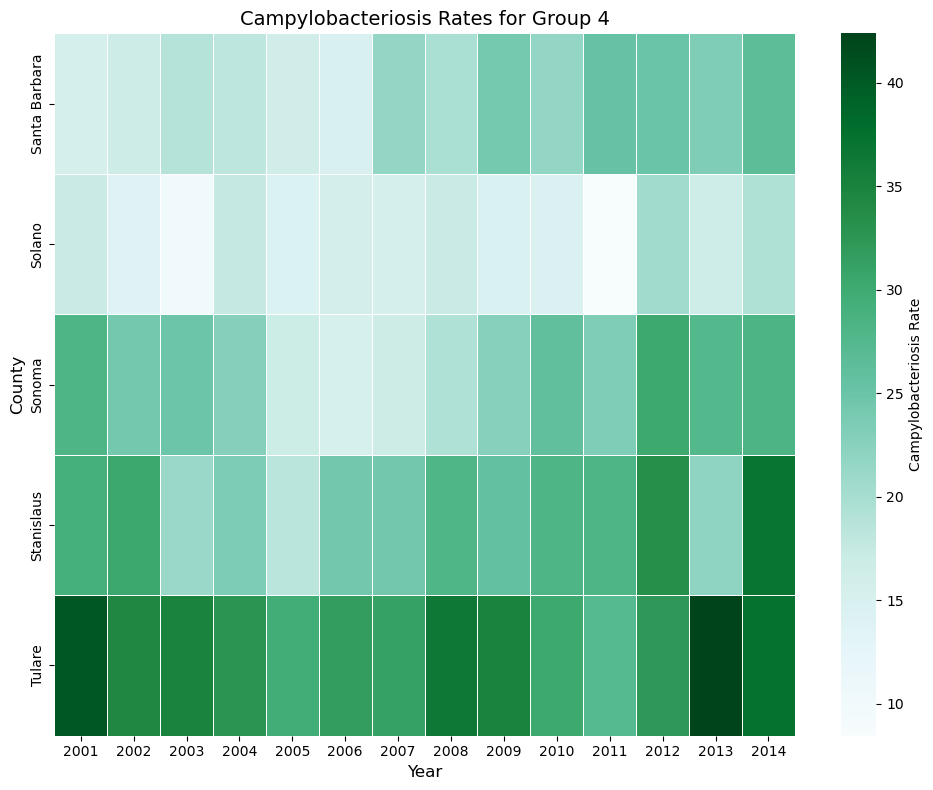

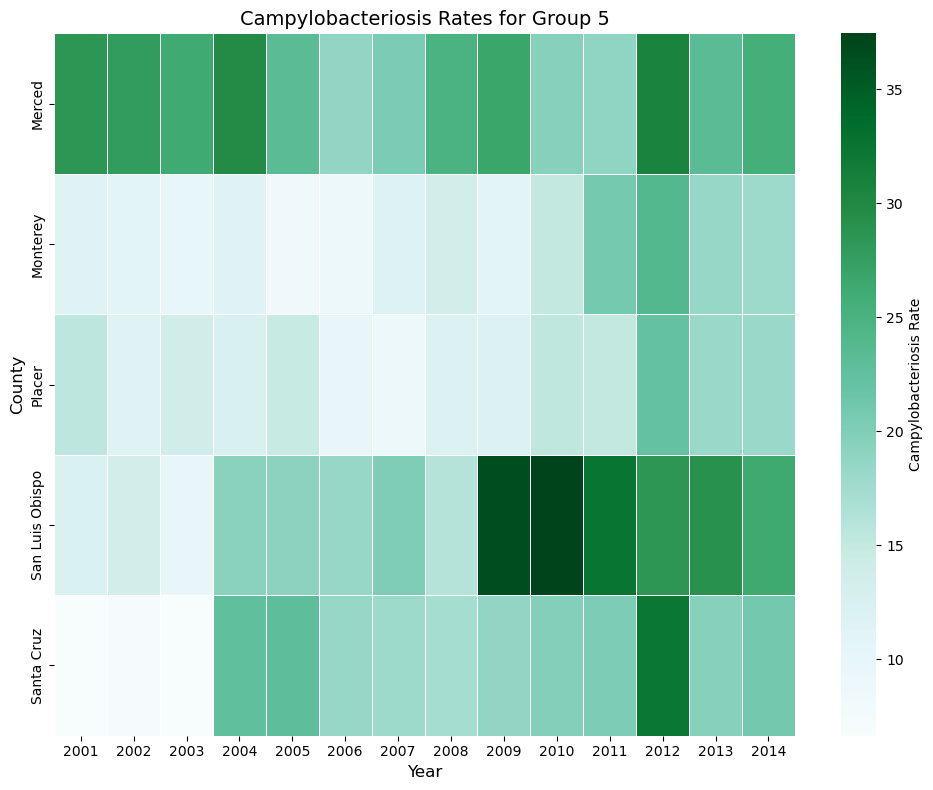

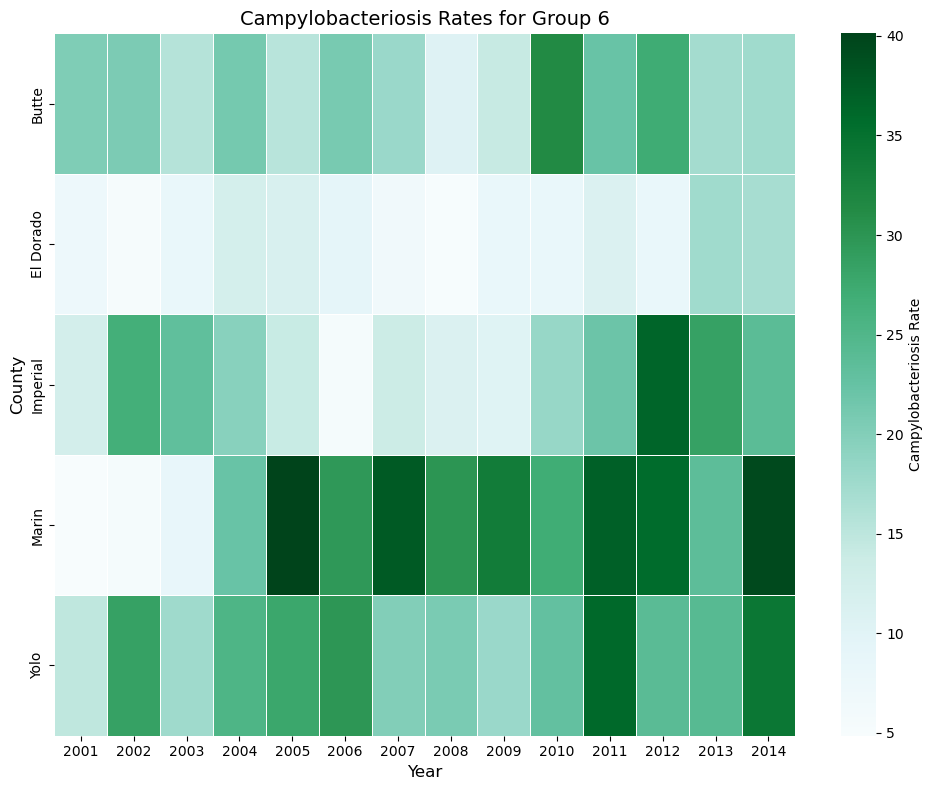

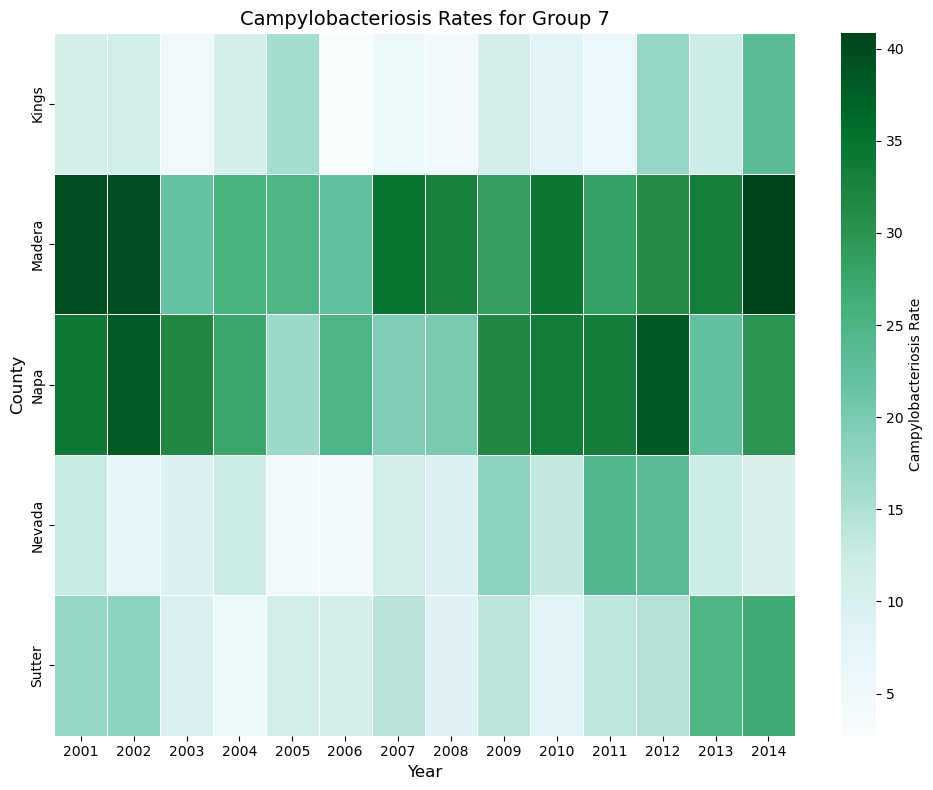

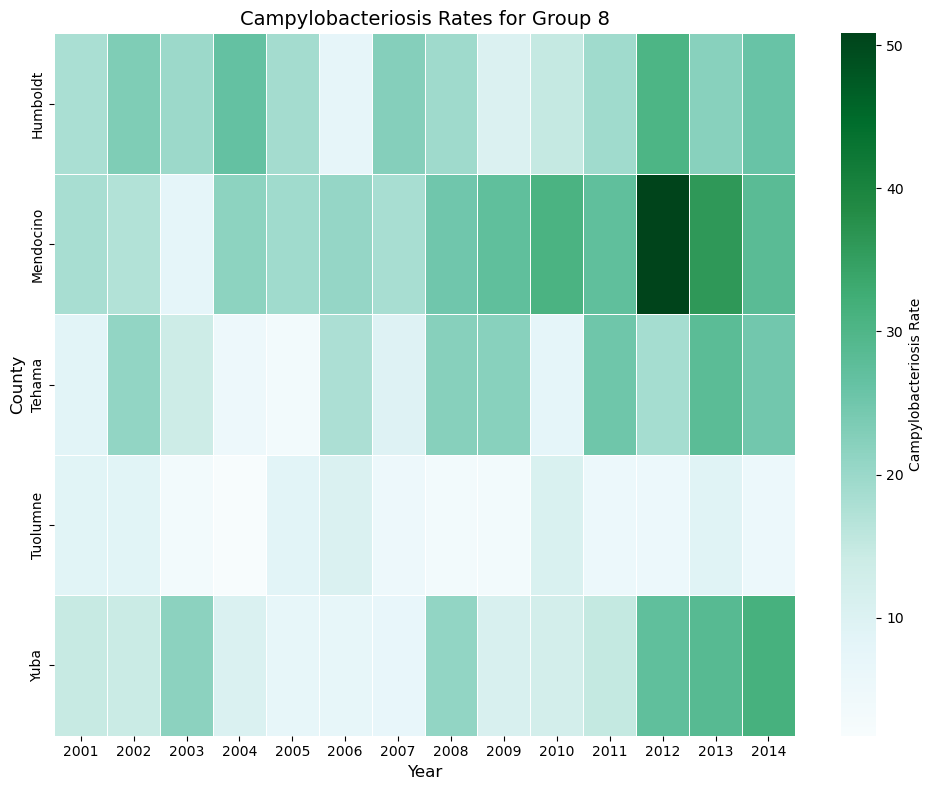

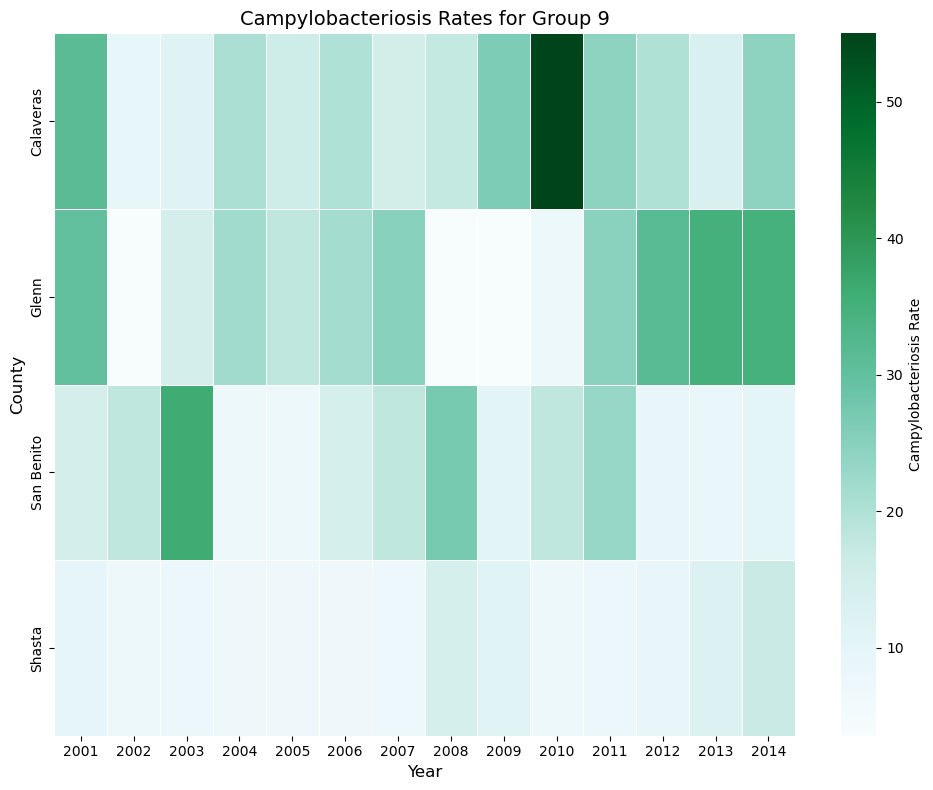

In [25]:
# Define the county groups
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Loop over each group and create the heatmap for Campylobacteriosis rates
for group_name, counties in county_groups.items():
    # Filter the data for counties in the group, disease Campylobacteriosis, and Sex = "Total"
    group_data = ent[(ent['County'].isin(counties)) & 
                     (ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['Sex'] == 'Total')]
    
    # Pivot data for heatmap of Campylobacteriosis Rates with Year on the x-axis and County on the y-axis
    rate_pivot = group_data.pivot_table(index='County', columns='Year', values='Rate', aggfunc='mean')
    
    # Create the heatmap for the current group
    plt.figure(figsize=(10, 8))
    sns.heatmap(rate_pivot, annot=False, fmt='.2f', cmap='BuGn', cbar_kws={'label': 'Campylobacteriosis Rate'},
                linewidths=0.5)
    
    # Set titles and labels
    plt.title(f"Campylobacteriosis Rates for {group_name}", fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('County', fontsize=12)
    
    # Save the heatmap as a separate plot
    plt.tight_layout()
    plt.show
    #plt.savefig(f"Campylobacteriosis_Rates_{group_name}.png")
    #3plt.close()  # Close the plot to avoid overlap when creating the next one

### CI by Group - Subplots in One Fig. 

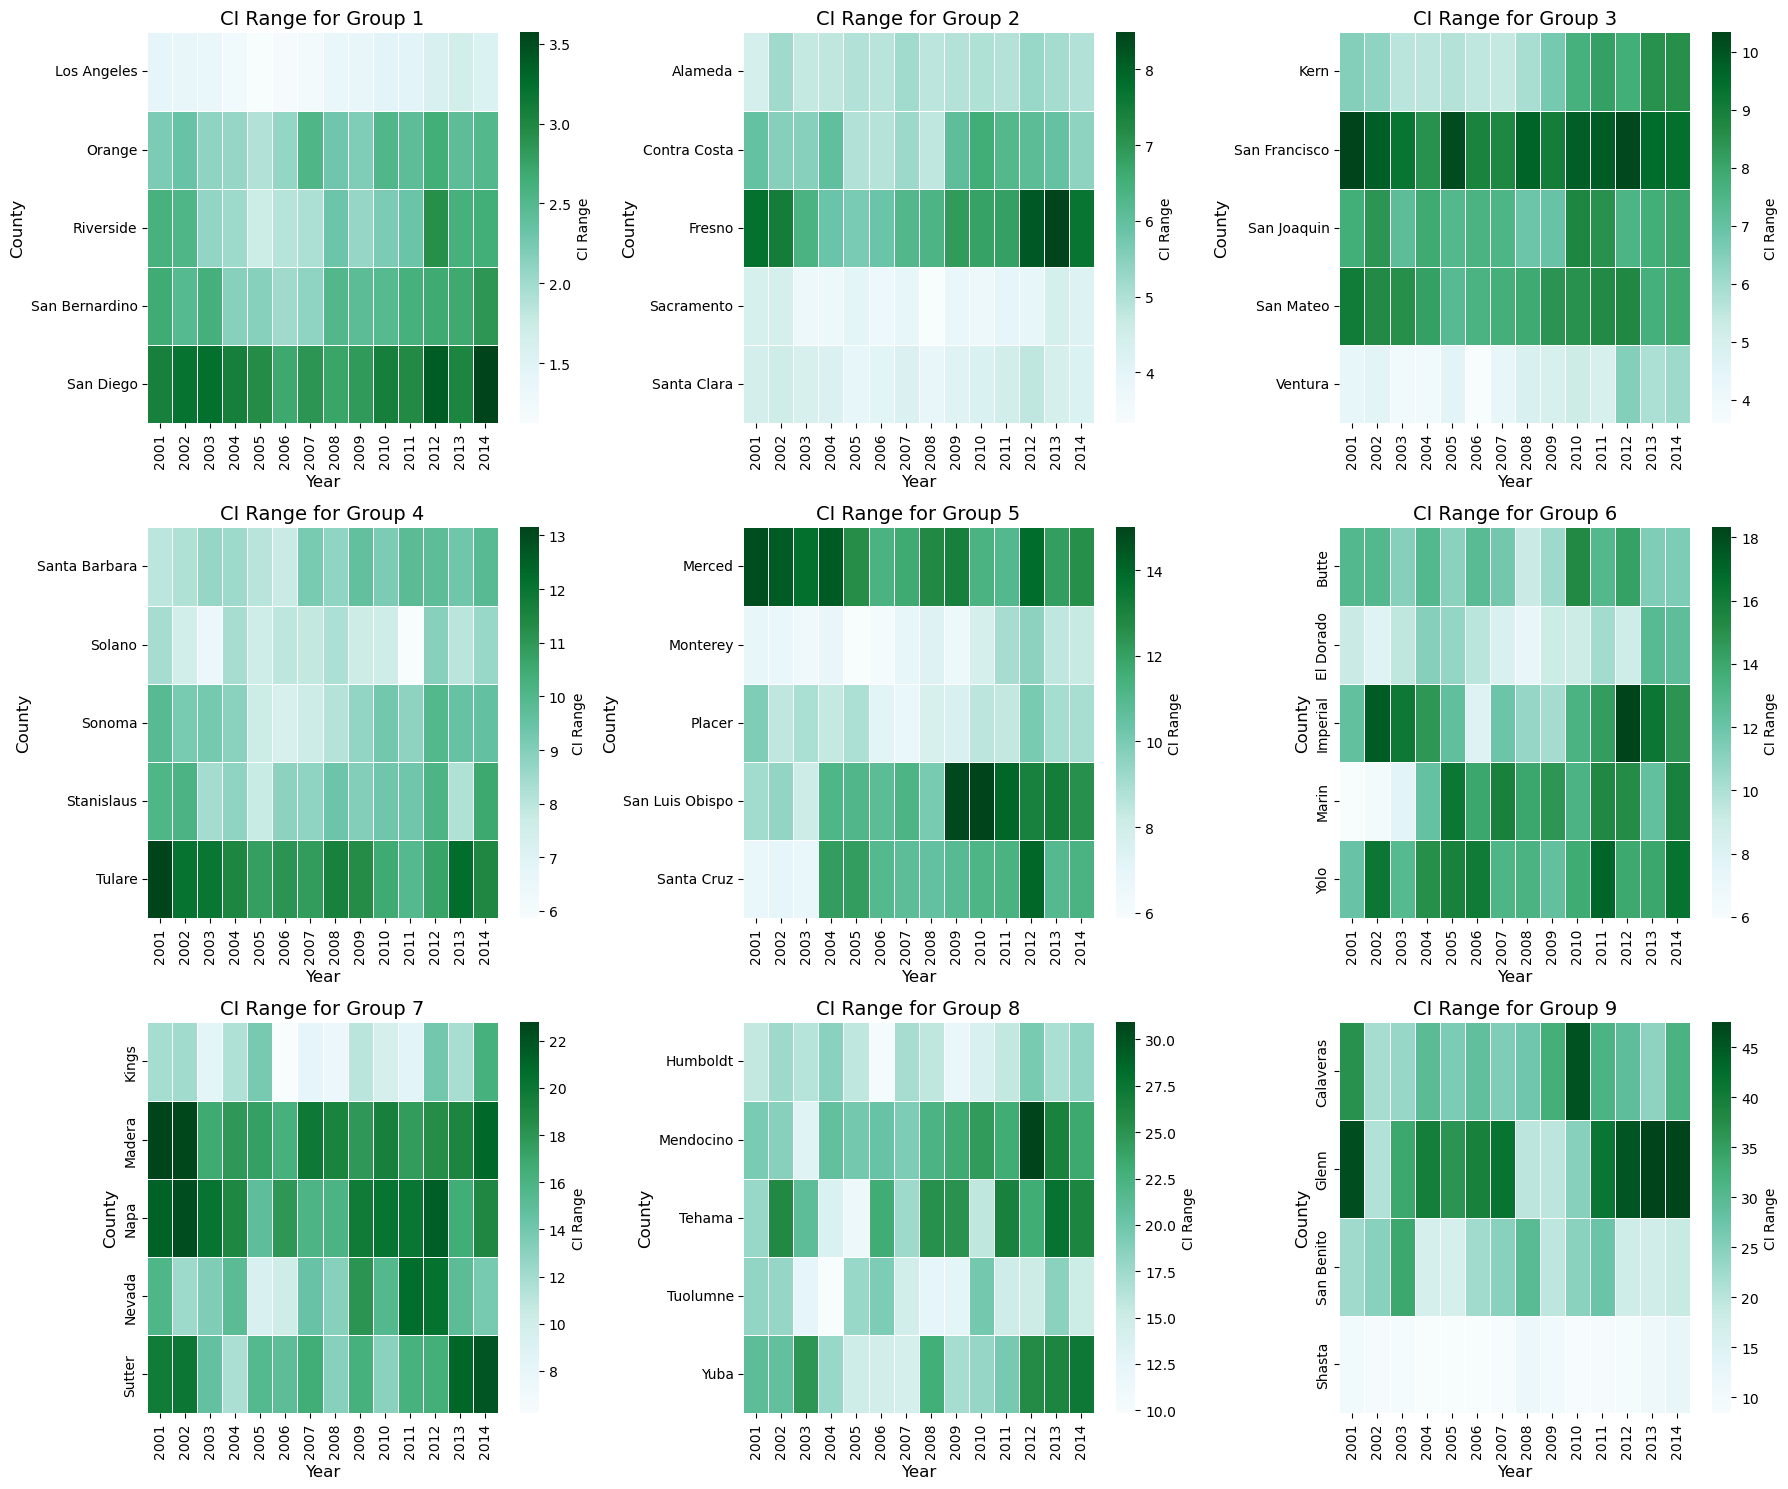

In [209]:
# Define the county groups
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Create a figure with subplots for the heatmaps
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3x3 grid of subplots

# Flatten axes array to easily iterate
axes = axes.flatten()

# Loop over each group and create the heatmap for CI range
for i, (group_name, counties) in enumerate(county_groups.items()):
    # Filter the data for counties in the group, the disease Campylobacteriosis, and Sex = "Total"
    group_data = ent[(ent['County'].isin(counties)) & 
                     (ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['Sex'] == 'Total')]
    
    # Use .loc to modify the DataFrame safely and calculate the CI range
    group_data.loc[:, 'CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
    
    # Pivot data for heatmap of CI Range with Year on the x-axis and County on the y-axis
    ci_range_pivot = group_data.pivot_table(index='County', columns='Year', values='CI_Range', aggfunc='mean')
    
    # Plot the CI Range Heatmap on the respective subplot axis
    sns.heatmap(ci_range_pivot, annot=False, fmt='.2f', cmap='BuGn', cbar_kws={'label': 'CI Range'},
                linewidths=0.5, ax=axes[i])
    
    # Set titles and labels for each subplot
    axes[i].set_title(f"CI Range for {group_name}", fontsize=14)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('County', fontsize=12)


plt.tight_layout()
#plt.show()
plt.savefig(f"CI_Range_All_Groups")

### CI by Group - Multiple Figures

In [140]:
# Define the county groups
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Loop over each group and create a separate figure for the heatmap
for group_name, counties in county_groups.items():
    # Filter the data for counties in the group, the disease Campylobacteriosis, and Sex = "Total"
    group_data = ent[(ent['County'].isin(counties)) & 
                     (ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['Sex'] == 'Total')]
    
    # Use .loc to modify the DataFrame safely and calculate the CI range
    group_data.loc[:, 'CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
    
    # Pivot data for heatmap of CI Range with Year on the x-axis and County on the y-axis
    ci_range_pivot = group_data.pivot_table(index='County', columns='Year', values='CI_Range', aggfunc='mean')
    
    # Create a new figure for each group
    plt.figure(figsize=(12, 8))
    
    # Plot the CI Range Heatmap
    sns.heatmap(ci_range_pivot, annot=False, fmt='.2f', cmap='BuGn', cbar_kws={'label': 'CI Range'},
                linewidths=0.5)
    
    # Set titles and labels for each figure
    plt.title(f"CI Range for {group_name}", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('County', fontsize=12)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save the figure as a PNG file
    plt.savefig(f"Campylobacteriosis_CI_Range_{group_name}.png")
    
    # Close the plot to avoid overlap when creating the next one
    plt.close()


/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/661909340.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.loc[:, 'CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/661909340.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data.loc[:, 'CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/661909340.py:22: SettingWithCopyWarni

# 2.4 Trends in Uncertainty by County & Pop Size

## CI Scatterplots by Group - Multiple Figures

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


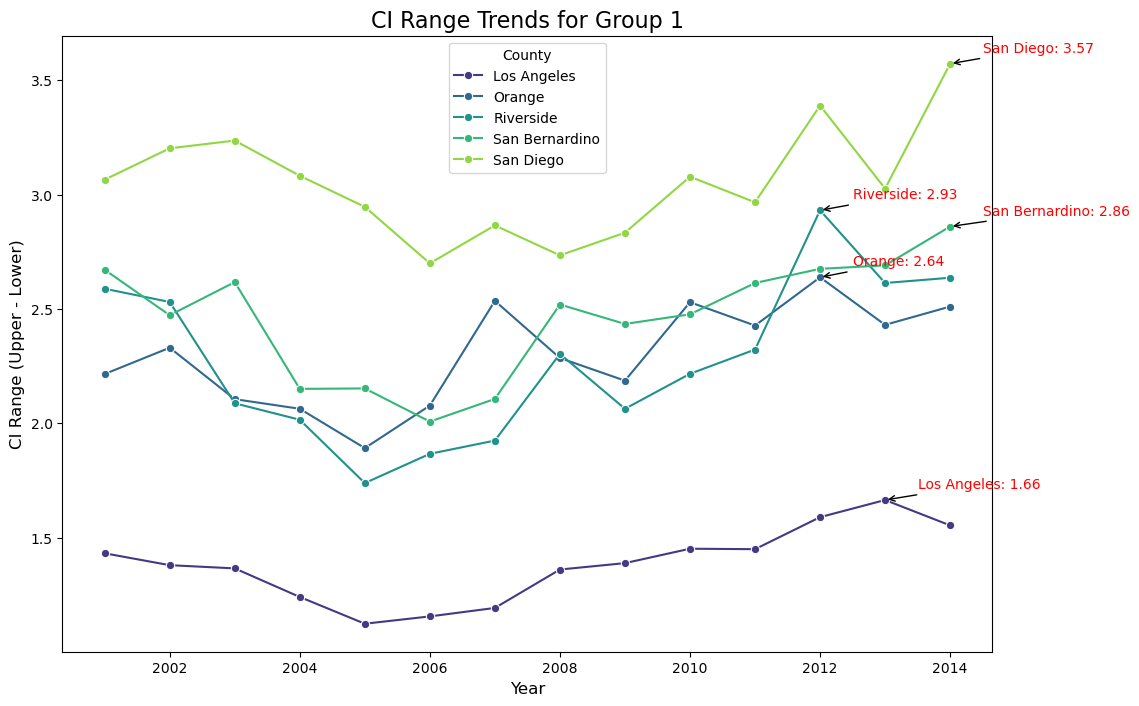

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


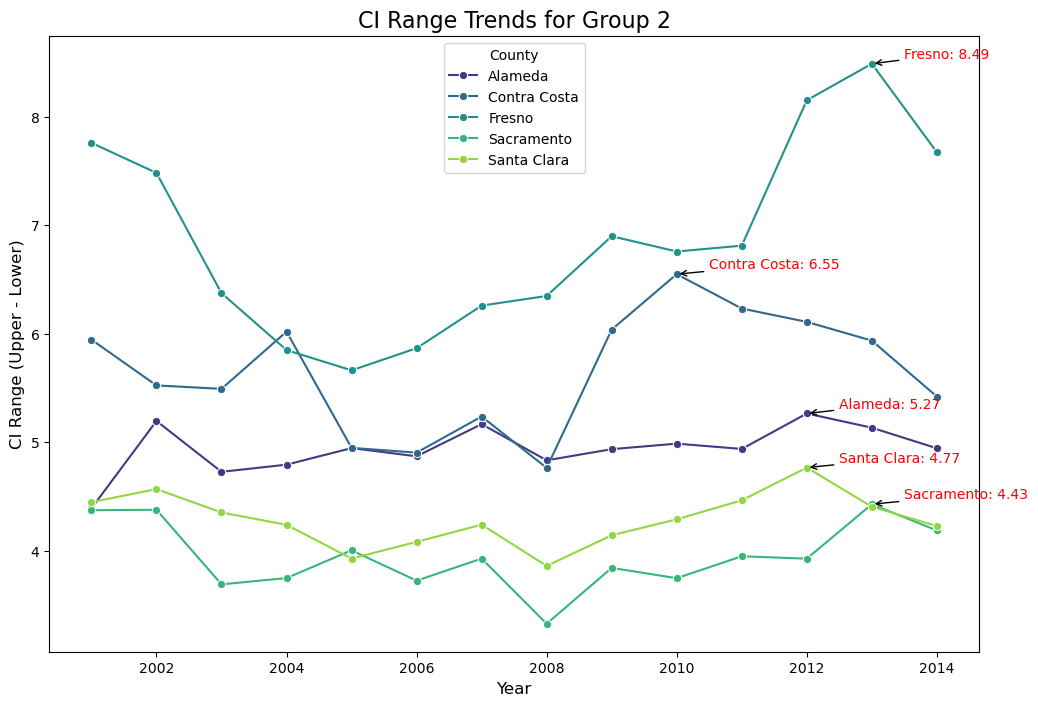

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


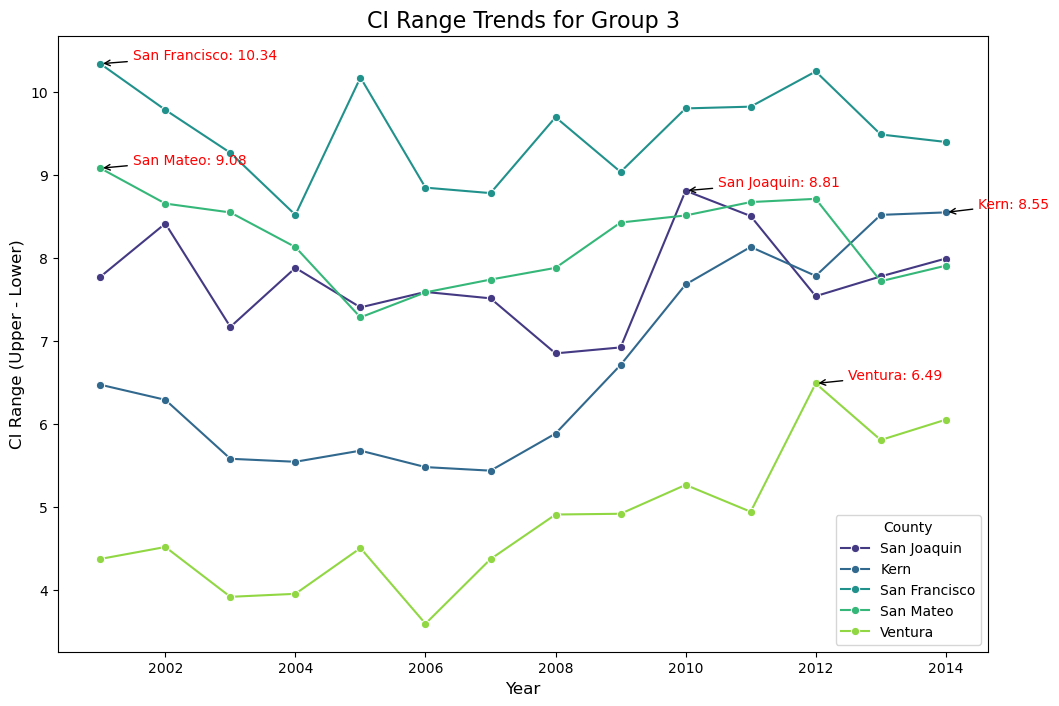

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


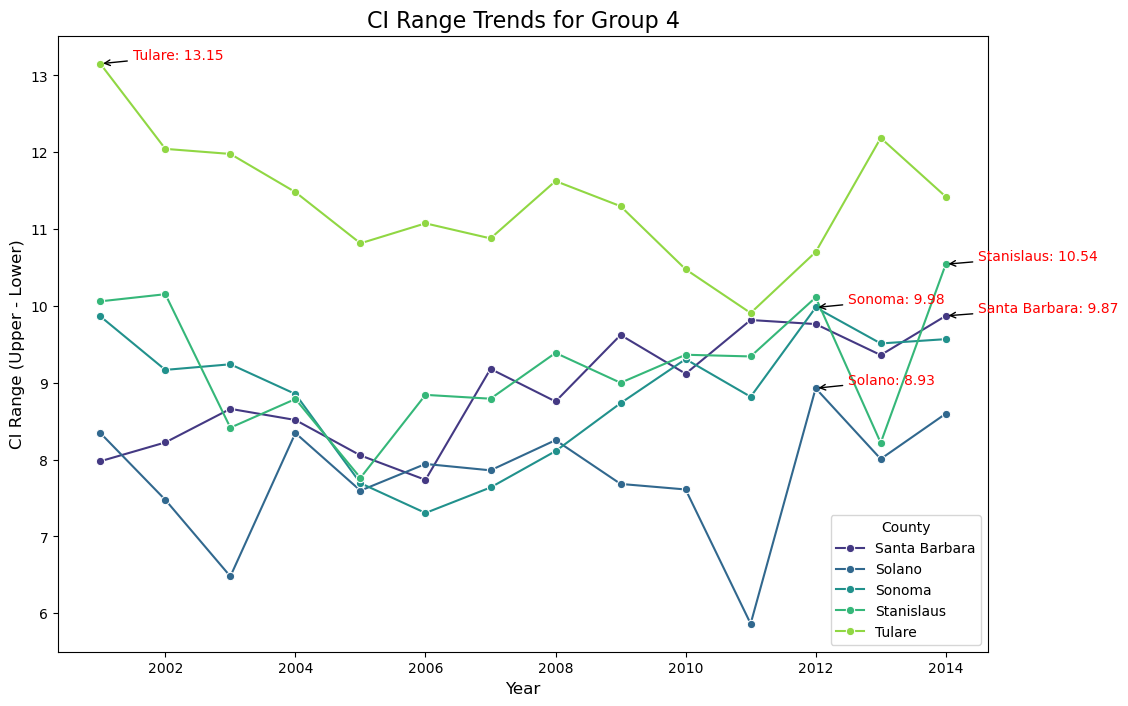

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


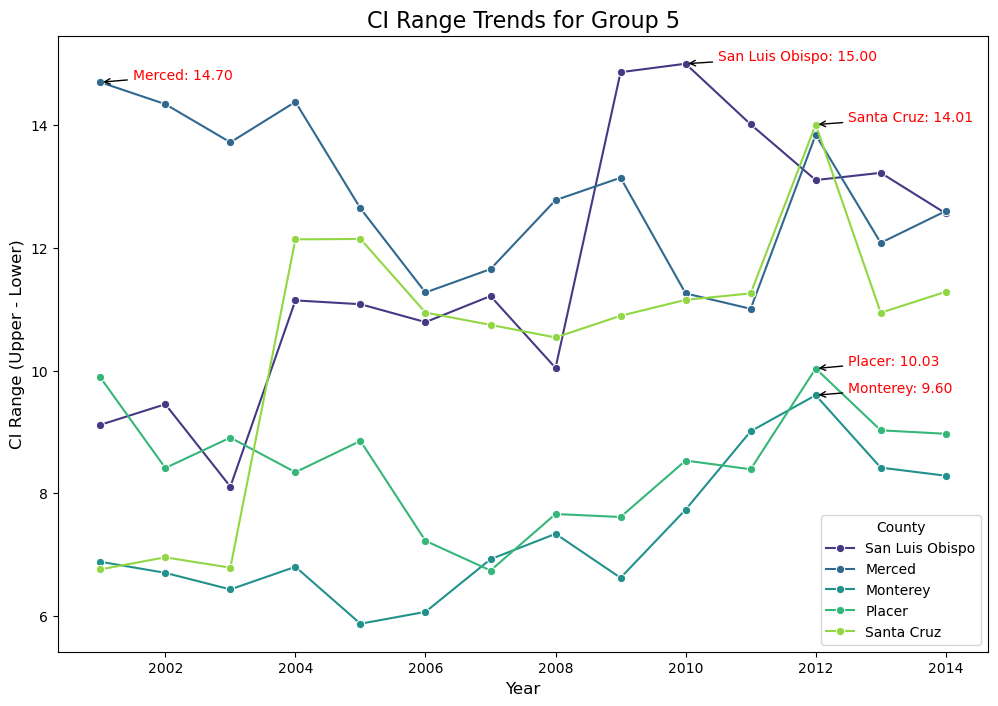

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


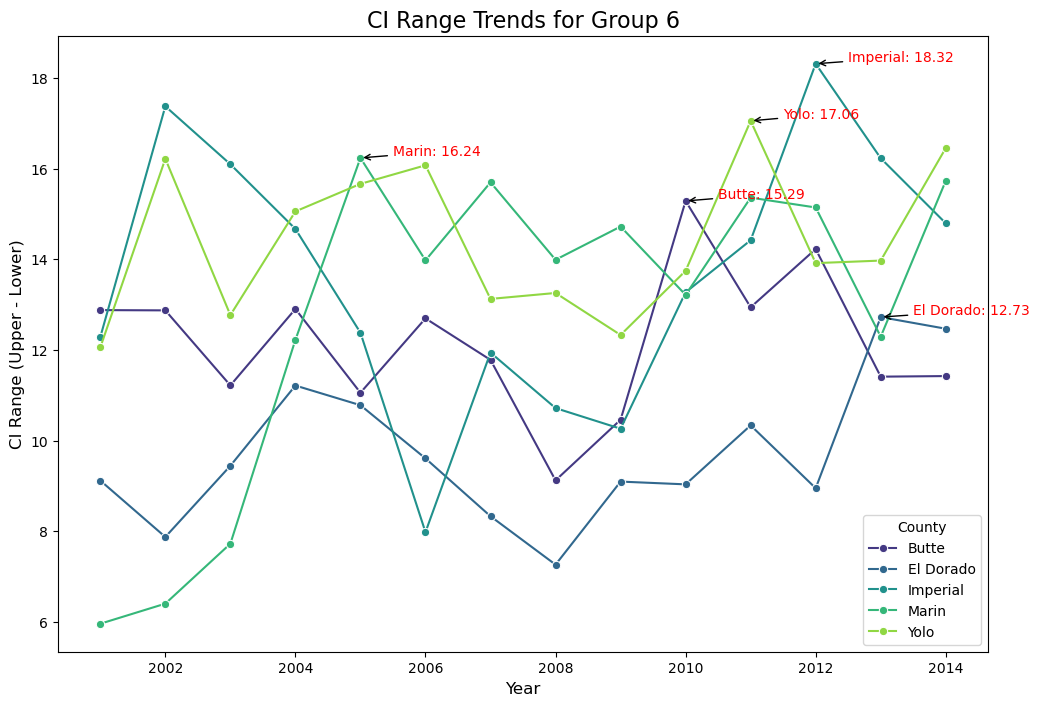

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


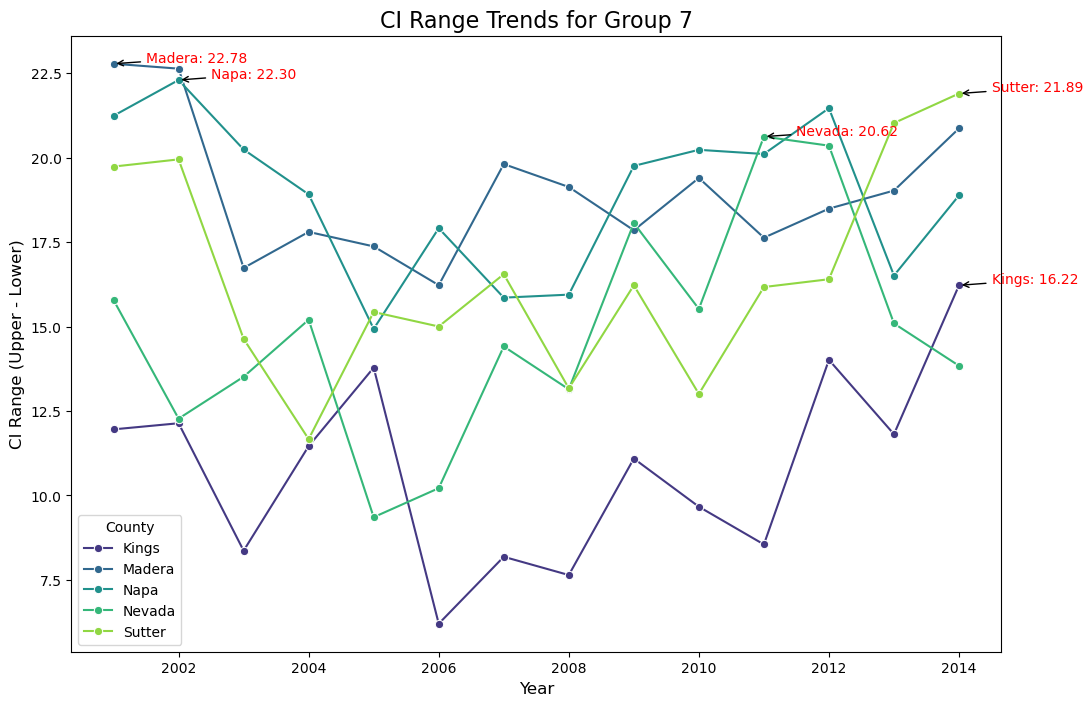

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


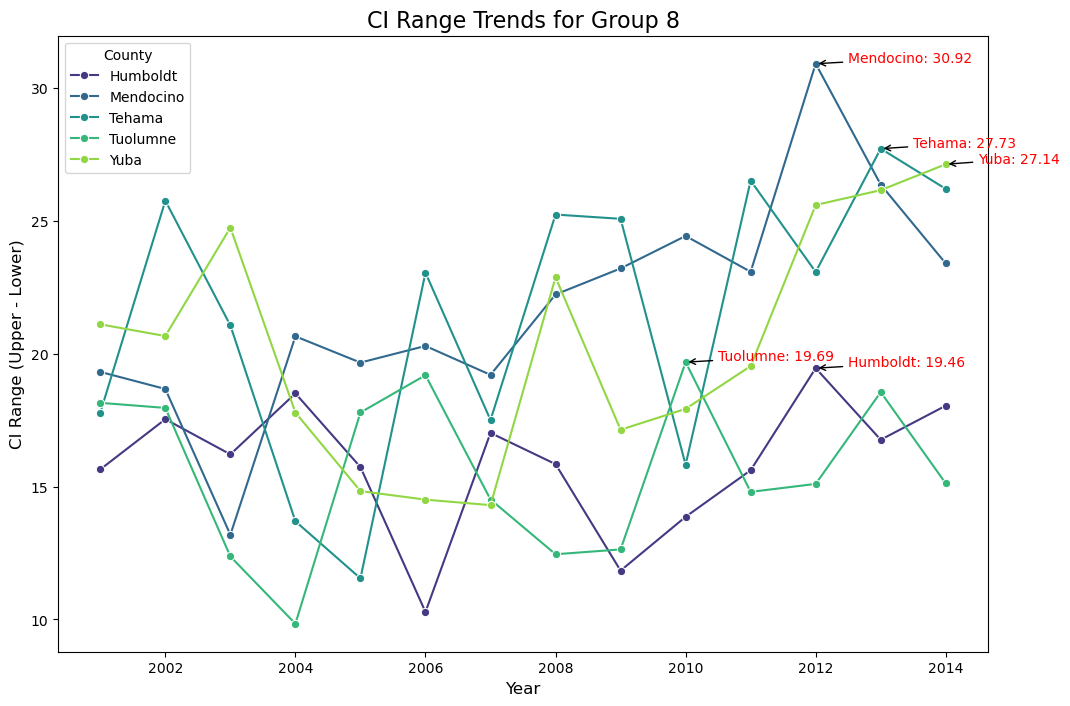

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/1242886273.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']


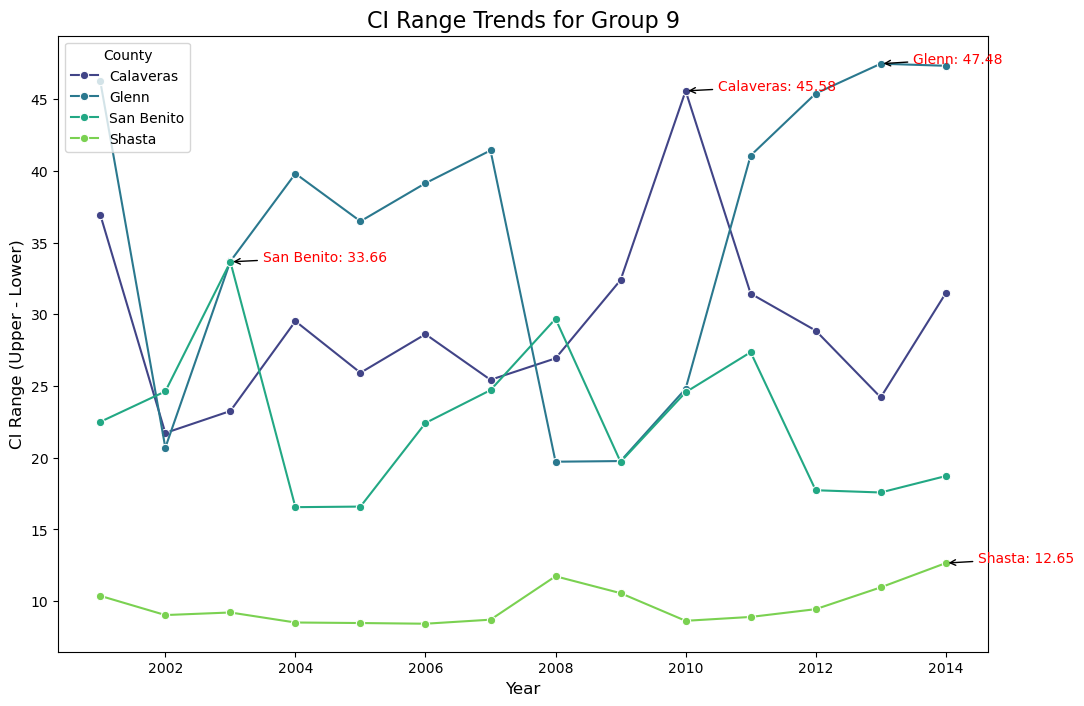

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ent' is the DataFrame and it contains 'County', 'Year', 'CI.upper', 'CI.lower', and 'Population' columns
# First, calculate the CI Range for each record
ent['CI_Range'] = ent['CI.upper'] - ent['CI.lower']

# Define the county groups, as you did before, based on population size or other criteria
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Loop over each group and create a scatter plot/line plot
for group_name, counties in county_groups.items():
    # Filter the data for counties in the group, disease Campylobacteriosis, and Sex = "Total"
    group_data = ent[(ent['County'].isin(counties)) & 
                     (ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['Sex'] == 'Total')]
    
    # Calculate the CI Range
    group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
    
    # Create a new figure for each group
    plt.figure(figsize=(12, 8))
    
    # Plot the CI Range (Scatter Plot or Line Plot)
    sns.lineplot(data=group_data, x='Year', y='CI_Range', hue='County', marker='o', palette='viridis')
    
    # Add annotations to highlight counties with the highest CI range
    highest_ci = group_data.groupby('County')['CI_Range'].max().sort_values(ascending=False).head(5)
    for county in highest_ci.index:
        county_data = group_data[group_data['County'] == county]
        max_ci_year = county_data.loc[county_data['CI_Range'].idxmax()]
        plt.annotate(f'{county}: {max_ci_year["CI_Range"]:.2f}', 
                     xy=(max_ci_year['Year'], max_ci_year['CI_Range']),
                     xytext=(max_ci_year['Year']+0.5, max_ci_year['CI_Range']+0.05),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10, color='red')

    # Title and labels
    plt.title(f"CI Range Trends for {group_name}", fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('CI Range (Upper - Lower)', fontsize=12)
    
    # Adjust layout for better spacing
    #plt.tight_layout()
    
    # Save the figure as a PNG file
    #plt.savefig(f"Campylobacteriosis_CI_Range_Trends_{group_name}.png")
    
    # Close the plot to avoid overlap when creating the next one
    plt.show()


## CI Scatterplots by Group - One Figure

/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/3701260586.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/3701260586.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
/var/folders/rk/7cxcvzcs2pg_yf9qdjfd6byh0000gn/T/ipykernel_968/3701260586.py:33: SettingWithCopyWarning: 
A valu

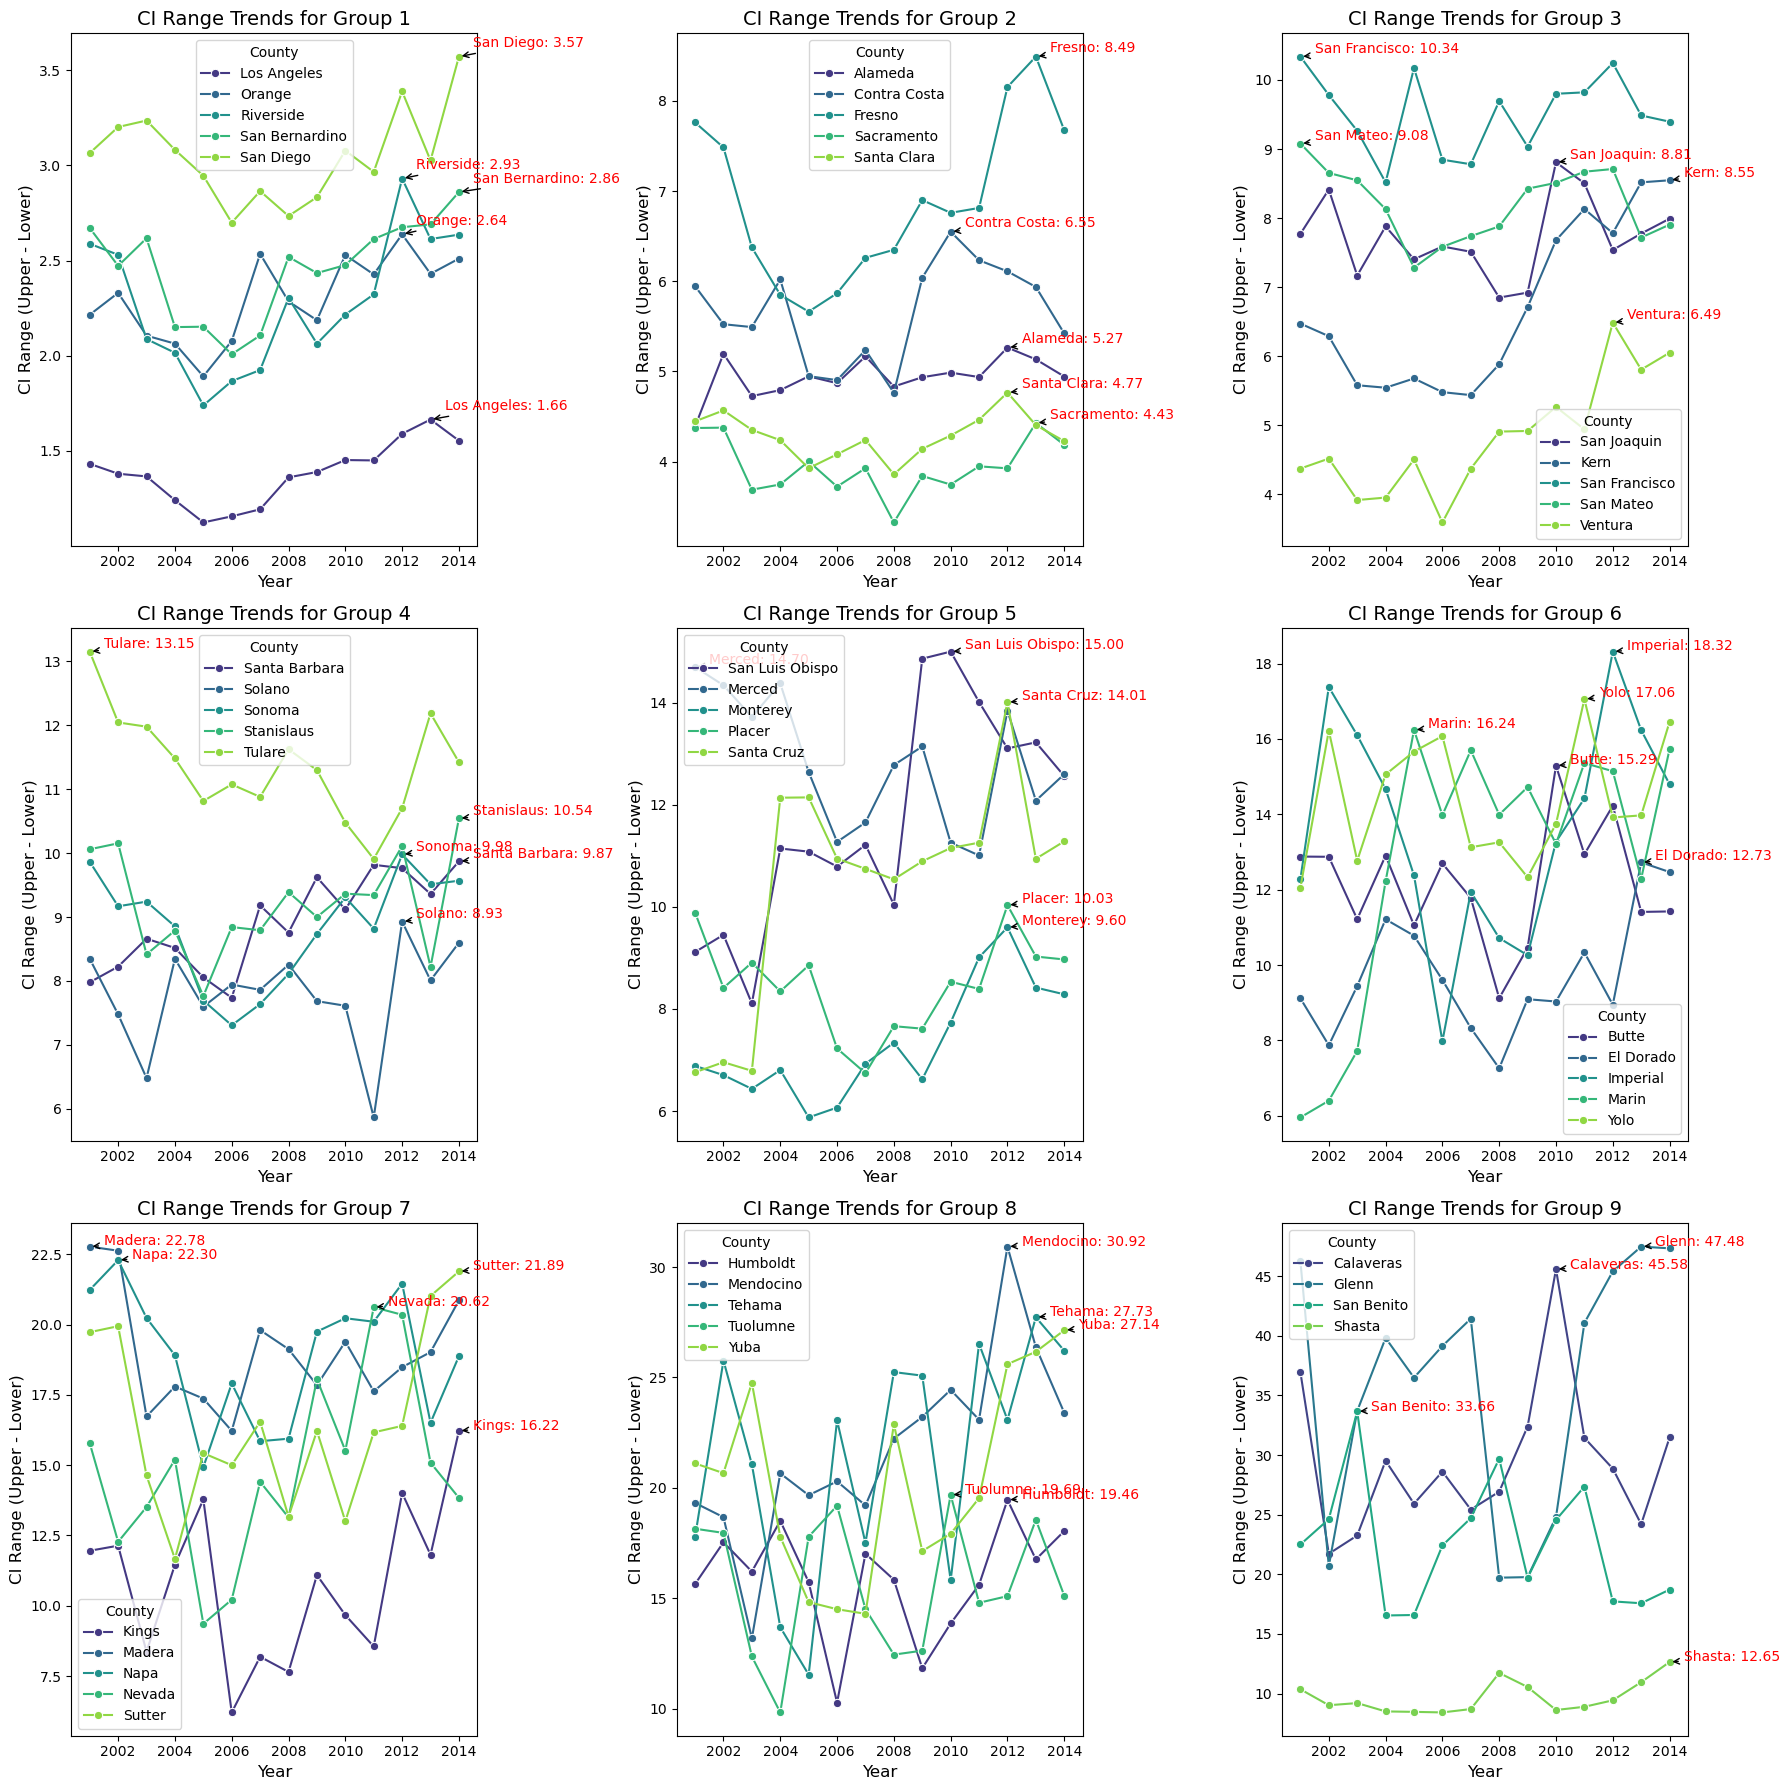

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ent' is the DataFrame and it contains 'County', 'Year', 'CI.upper', 'CI.lower', and 'Population' columns
# First, calculate the CI Range for each record
ent['CI_Range'] = ent['CI.upper'] - ent['CI.lower']

# Define the county groups, as you did before, based on population size or other criteria
county_groups = {
    "Group 1": ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"],
    "Group 2": ["Santa Clara", "Alameda", "Sacramento", "Contra Costa", "Fresno"],
    "Group 3": ["Kern", "San Francisco", "Ventura", "San Mateo", "San Joaquin"],
    "Group 4": ["Stanislaus", "Sonoma", "Tulare", "Santa Barbara", "Solano"],
    "Group 5": ["Monterey", "Placer", "San Luis Obispo", "Santa Cruz", "Merced"],
    "Group 6": ["Marin", "Butte", "Yolo", "El Dorado", "Imperial"],
    "Group 7": ["Madera", "Kings", "Napa", "Nevada", "Sutter"],
    "Group 8": ["Humboldt", "Mendocino", "Yuba", "Tehama", "Tuolumne"],
    "Group 9": ["San Benito", "Glenn", "Calaveras", "Shasta"]
}

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))  # Adjust nrows and ncols as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop over each group and create a scatter plot/line plot in a subplot
for i, (group_name, counties) in enumerate(county_groups.items()):
    # Filter the data for counties in the group, disease Campylobacteriosis, and Sex = "Total"
    group_data = ent[(ent['County'].isin(counties)) & 
                     (ent['Disease'] == 'Campylobacteriosis') & 
                     (ent['Sex'] == 'Total')]
    
    # Calculate the CI Range
    group_data['CI_Range'] = group_data['CI.upper'] - group_data['CI.lower']
    
    # Plot the CI Range (Line Plot)
    sns.lineplot(data=group_data, x='Year', y='CI_Range', hue='County', marker='o', palette='viridis', ax=axes[i])
    
    # Add annotations to highlight counties with the highest CI range
    highest_ci = group_data.groupby('County')['CI_Range'].max().sort_values(ascending=False).head(5)
    for county in highest_ci.index:
        county_data = group_data[group_data['County'] == county]
        max_ci_year = county_data.loc[county_data['CI_Range'].idxmax()]
        axes[i].annotate(f'{county}: {max_ci_year["CI_Range"]:.2f}', 
                         xy=(max_ci_year['Year'], max_ci_year['CI_Range']),
                         xytext=(max_ci_year['Year']+0.5, max_ci_year['CI_Range']+0.05),
                         arrowprops=dict(facecolor='black', arrowstyle='->'),
                         fontsize=10, color='red')

    # Title and labels for each subplot
    axes[i].set_title(f"CI Range Trends for {group_name}", fontsize=14)
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('CI Range (Upper - Lower)', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("Campylobacteriosis_CI_Range_Trends_All_Groups.png")

# Show the plot
plt.show()



# 2.5 Investigate Patterns by Year Across All Counties

## Line Plot - Avg. Campy Rate (Across Co.) & Avg. CI Range 

In [160]:
# Aggregate data by year
agg_data = ent[ent['Disease'] == 'Campylobacteriosis']  # Filter for the disease Campylobacteriosis
agg_data = agg_data[agg_data['Sex'] == 'Total']  # Ensure we are using the total sex data
agg_data['CI_Range'] = agg_data['CI.upper'] - agg_data['CI.lower']  # Calculate the CI range

# Group by year and calculate the mean of the rates and CI ranges
yearly_data = agg_data.groupby('Year').agg({
    'Rate': 'mean',  # Average Campylobacteriosis rate
    'CI_Range': 'mean'  # Average CI range
}).reset_index()

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot Campylobacteriosis rate trend line
sns.lineplot(x='Year', y='Rate', data=yearly_data, label='Campylobacteriosis Rate', color='darkgreen', linewidth=2)

# Plot CI range trend line
sns.lineplot(x='Year', y='CI_Range', data=yearly_data, label='CI Range', color='orange', linewidth=2)

# Add titles and labels
plt.title('Yearly Trends in Campylobacteriosis Rates and CI Range (Statewide)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Metrics', loc='upper left')

# Display the plot
#plt.show()

 # Adjust layout for better spacing
plt.tight_layout()
    
    # Save the figure as a PNG file
plt.savefig(f"Yearly Trends in Campy Rates and CI Range.png")
    
    # Close the plot to avoid overlap when creating the next one
plt.close()

## Line Plot - Avg. Campy Rate (Across Co.) & Avg. CI Range (& Avg. CI Limits)

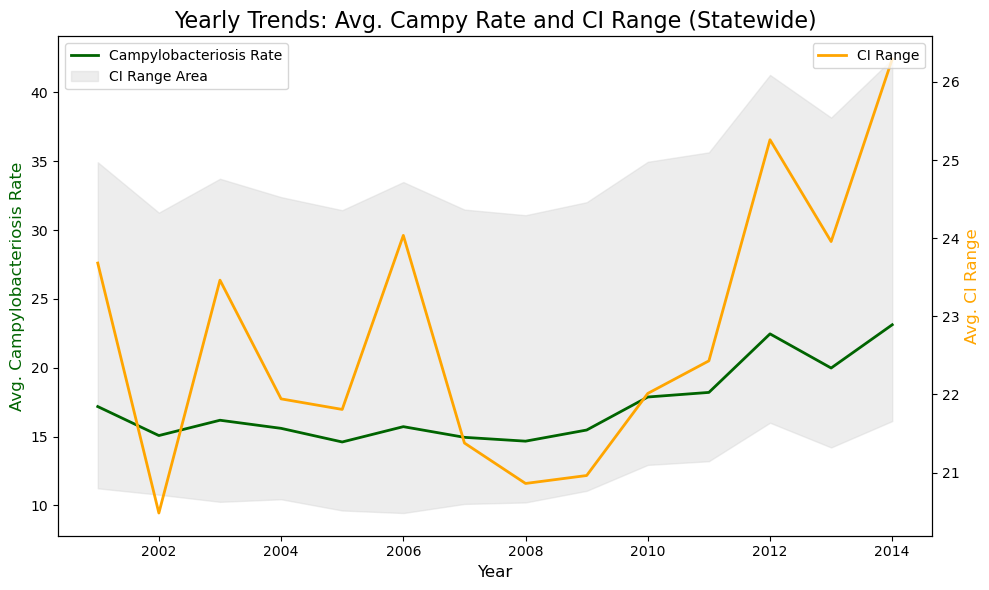

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by year
agg_data = ent[ent['Disease'] == 'Campylobacteriosis']  # Filter for the disease Campylobacteriosis
agg_data = agg_data[agg_data['Sex'] == 'Total']  # Ensure we are using the total sex data
agg_data['CI_Range'] = agg_data['CI.upper'] - agg_data['CI.lower']  # Calculate the CI range

# Group by year and calculate the mean of the rates and CI ranges
yearly_data = agg_data.groupby('Year').agg({
    'Rate': 'mean',  # Average Campylobacteriosis rate
    'CI_Range': 'mean',  # Average CI range
    'CI.upper': 'mean',  # Average CI upper bound
    'CI.lower': 'mean'   # Average CI lower bound
}).reset_index()

# Set up the figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Campylobacteriosis rate (left y-axis)
sns.lineplot(x='Year', y='Rate', data=yearly_data, ax=ax1, color='darkgreen', label='Campylobacteriosis Rate', linewidth=2)

# Create the second y-axis for CI range
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='CI_Range', data=yearly_data, ax=ax2, color='orange', label='CI Range', linewidth=2)

# Shade the CI range between CI.upper and CI.lower
ax1.fill_between(yearly_data['Year'], yearly_data['CI.lower'], yearly_data['CI.upper'], 
                 color='lightgray', alpha=0.4, label='CI Range Area')

# Titles and labels
ax1.set_title('Yearly Trends: Avg. Campy Rate and CI Range (Statewide)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Avg. Campylobacteriosis Rate', fontsize=12, color='darkgreen')
ax2.set_ylabel('Avg. CI Range', fontsize=12, color='orange')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# line plot with yearly trends 

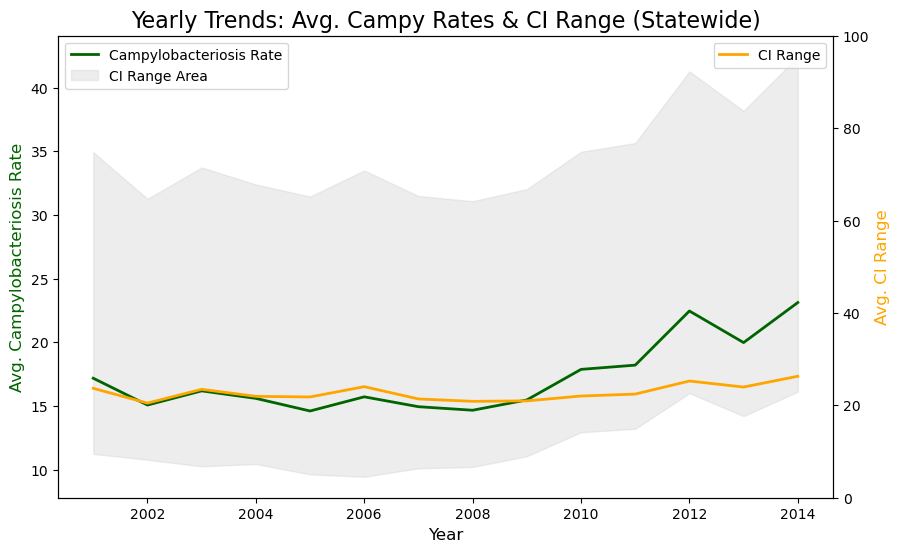

<Figure size 640x480 with 0 Axes>

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by year
agg_data = ent[ent['Disease'] == 'Campylobacteriosis']  # Filter for the disease Campylobacteriosis
agg_data = agg_data[agg_data['Sex'] == 'Total']  # Ensure we are using the total sex data
agg_data['CI_Range'] = agg_data['CI.upper'] - agg_data['CI.lower']  # Calculate the CI range

# Group by year and calculate the mean of the rates and CI ranges
yearly_data = agg_data.groupby('Year').agg({
    'Rate': 'mean',  # Average Campylobacteriosis rate
    'CI_Range': 'mean',  # Average CI range
    'CI.upper': 'mean',  # Average CI upper bound
    'CI.lower': 'mean'   # Average CI lower bound
}).reset_index()

# Set up the figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Campylobacteriosis rate (left y-axis)
sns.lineplot(x='Year', y='Rate', data=yearly_data, ax=ax1, color='darkgreen', label='Campylobacteriosis Rate', linewidth=2)

# Create the second y-axis for CI range
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='CI_Range', data=yearly_data, ax=ax2, color='orange', label='CI Range', linewidth=2)

# Shade the CI range between CI.upper and CI.lower
ax1.fill_between(yearly_data['Year'], yearly_data['CI.lower'], yearly_data['CI.upper'], 
                 color='lightgray', alpha=0.4, label='CI Range Area')

# Adjust the y-axis limit for the CI range to make it more readable
ax2.set_ylim(0, 100)  # Set the CI range y-axis to go from 0 to 100 for better readability

# Titles and labels
ax1.set_title('Yearly Trends: Avg. Campy Rates & CI Range (Statewide)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Avg. Campylobacteriosis Rate', fontsize=12, color='darkgreen')
ax2.set_ylabel('Avg. CI Range', fontsize=12, color='orange')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout for better spacing

# Show the plot
plt.show()
plt.tight_layout()
plt.savefig(f"Yearly Trends Two.png")
